In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
# import pmdarima as pmd
import datetime as dt
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn import metrics
import pickle
import logging

logging.getLogger("prophet").setLevel(logging.WARNING)
logging.getLogger("cmdstanpy").disabled=True

In [2]:
# Load your dataset
df = pd.read_csv("../Maverik_Capstone/data/merged_data.csv", index_col=0)  # Replace with your data file path
cat = pd.read_csv("../Maverik_Capstone/data/qualitative_data_msba_clean.csv")

In [3]:
df.head()

capital_projects.soft_opening_date calendar.calendar_day_date  \
0                         2022-06-14                 2022-06-17   
1                         2022-06-14                 2022-06-22   
2                         2022-06-14                 2022-06-23   
3                         2022-06-14                 2022-06-26   
4                         2022-06-14                 2022-06-27   

   calendar.fiscal_week_id_for_year calendar.day_of_week  \
0                                25               Friday   
1                                25            Wednesday   
2                                25             Thursday   
3                                26               Sunday   
4                                26               Monday   

  calendar_information.holiday calendar_information.type_of_day  inside_sales  \
0                         NONE                          WEEKDAY     2168.2920   
1                         NONE                          WEEKDAY     2051.5635   
2                         NONE                          WEEKDAY     2257.5000   
3                         NONE                          WEEKEND     1520.5925   
4                         NONE                          WEEKDAY     1897.6930   

   food_service  diesel_x   unleaded  ...  hi_flow_lanes_fueling_positions_2  \
0      861.6930  722.7745  1425.1020  ...                                  5   
1      808.0275  730.4850  1436.2740  ...                                  5   
2      966.4410  895.7970  1594.3725  ...                                  5   
3      542.3250  584.2900  1124.9280  ...                                  5   
4      771.4525  852.2605  1640.2540  ...                                  5   

   rv_lanes_fueling_positions_2  hi_flow_rv_lanes_layout  \
0                             4                    Combo   
1                             4                    Combo   
2                             4                    Combo   
3                             4                    Combo   
4                             4                    Combo   

   hi_flow_rv_lanes_stack_type  non_24_hour  self_check_out mens_toilet_count  \
0                        HF/RV           No             Yes                 1   
1                        HF/RV           No             Yes                 1   
2                        HF/RV           No             Yes                 1   
3                        HF/RV           No             Yes                 1   
4                        HF/RV           No             Yes                 1   

  mens_urinal_count womens_toilet_count womens_sink_count  
0                 1                   2                 2  
1                 1                   2                 2  
2                 1                   2                 2  
3                 1                   2                 2  
4                 1                   2                 2  

[5 rows x 64 columns]

In [4]:
# Select Store Data
site_id = 22925

store_data = df.loc[df['site_id_msba'] == site_id]

In [5]:
store_data.shape

(366, 64)

In [6]:
is_ts = store_data[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'date'})
is_ts['date'] = pd.to_datetime(is_ts['date'])

In [7]:

is_ts.set_index(is_ts['date'], inplace=True)
is_ts = is_ts.drop(columns=['date'])
fs_ts = store_data[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date')
d_ts = store_data[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date')
u_ts = store_data[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date')

In [8]:
is_ts.index

DatetimeIndex(['2021-06-22', '2021-06-23', '2021-06-24', '2021-06-25',
               '2021-06-26', '2021-06-27', '2021-06-28', '2021-06-29',
               '2021-06-30', '2021-07-01',
               ...
               '2022-06-13', '2022-06-14', '2022-06-15', '2022-06-16',
               '2022-06-17', '2022-06-18', '2022-06-19', '2022-06-20',
               '2022-06-21', '2022-06-22'],
              dtype='datetime64[ns]', name='date', length=366, freq=None)

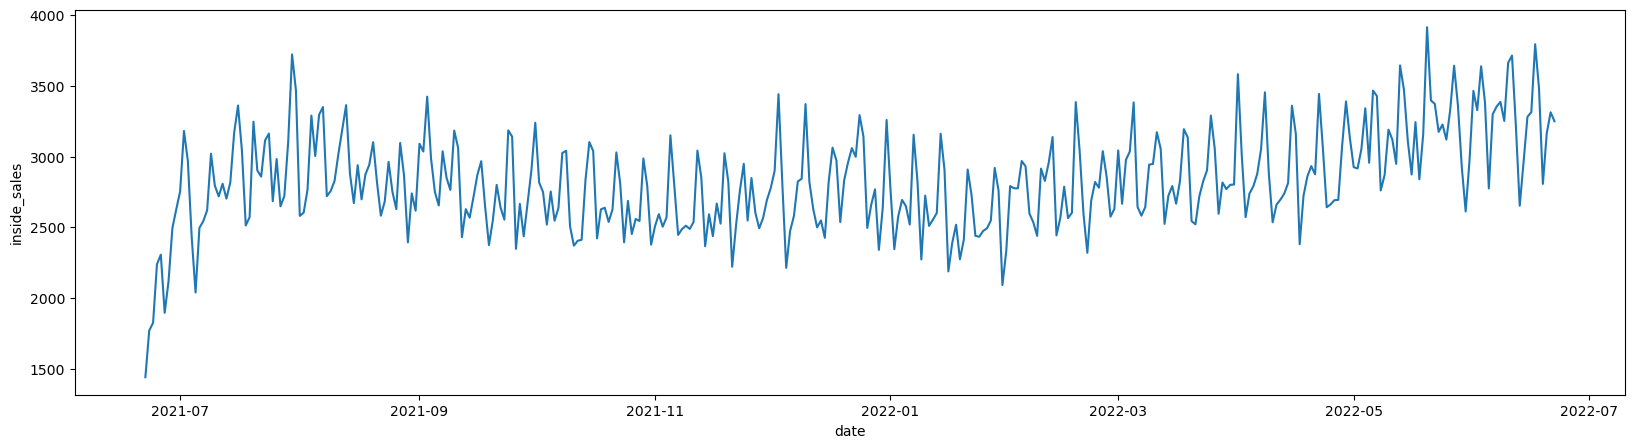

In [9]:
plt.subplots(figsize=(20, 5))
sns.lineplot(data=is_ts, 
             x= 'date', 
             y= 'inside_sales')
plt.show()

In [10]:
train = is_ts.iloc[:-30]
val = is_ts.iloc[-30:]

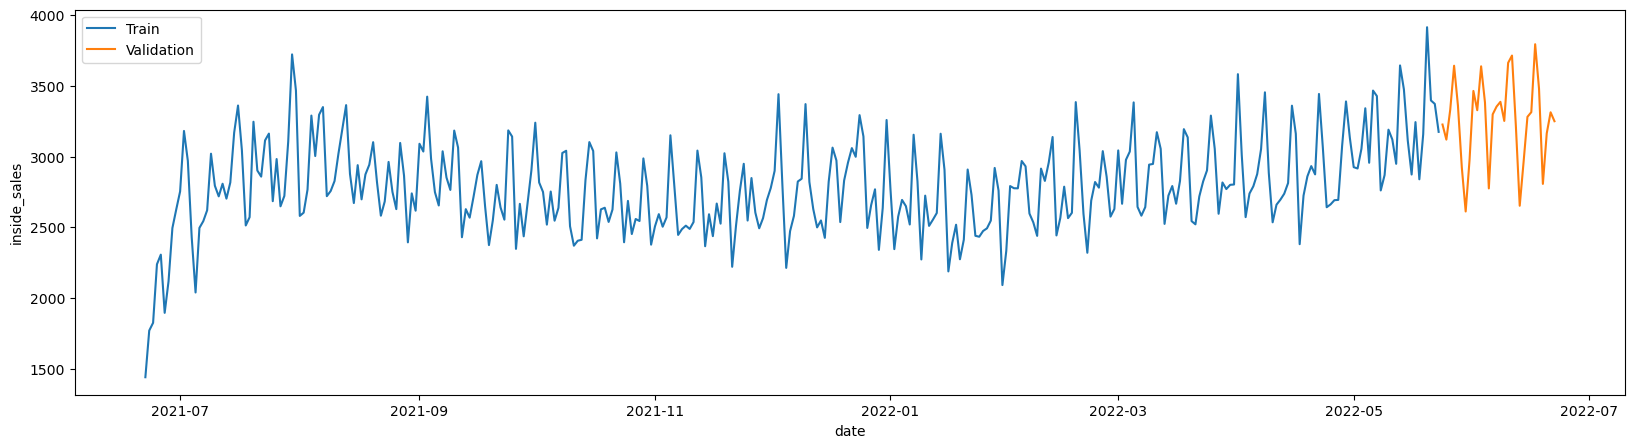

In [11]:
plt.subplots(figsize=(20, 5))
sns.lineplot(data=train, 
             x= 'date', 
             y= 'inside_sales',
             label= 'Train')
sns.lineplot(data=val, 
             x= 'date', 
             y= 'inside_sales',
             label= 'Validation')
plt.show()

In [12]:
# model=pmd.auto_arima(train,
#                      start_p=1,
#                      max_p=7,
#                      max_d=7,
#                      start_q=1,
#                      max_q=7, 
#                      max_P=5,
#                      max_D=12,
#                      max_Q=12, 
#                      m=52, 
#                      seasonal=True,
#                      error_action='warn',
#                      trace=True,
#                      supress_warnings=True,
#                      stepwise=False,
#                      random_state=1234,
#                      n_fits=10)



In [13]:
# model.summary()

In [14]:
# pred_arima = model.predict(len(val))
# print(mean_squared_error(val, pred_arima))
# print(mean_absolute_error(val, pred_arima))
# print(mean_absolute_percentage_error(val, pred_arima))
# print(pred_arima.index)

In [15]:
# pred_arima = model.predict(len(val)).to_frame()
# pred_arima.index.name = 'date'
# pred_arima = pred_arima.rename({0:'inside_sales'}, axis='columns')

In [16]:
# pred_arima.index

In [17]:
# plt.subplots(figsize=(20, 5))
# sns.lineplot(data=train, 
#              x= 'date', 
#              y= 'inside_sales',
#              label= 'Train')
# sns.lineplot(data=val, 
#              x= 'date', 
#              y= 'inside_sales',
#              label= 'Validation')
# sns.lineplot(data=pred_arima,
#              x= 'date', 
#              y= 'inside_sales',
#              label= 'Prediction')
# plt.show()


In [18]:
is_ts = store_data[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
is_ts['ds'] = pd.to_datetime(is_ts['ds'])

In [19]:
train = is_ts.iloc[:-30]
val = is_ts.iloc[-30:]

In [20]:
model = Prophet()
model.fit(train)

07:07:11 - cmdstanpy - INFO - Chain [1] start processing
07:07:11 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
pred_prophet = model.predict(val)

In [22]:
pred_prophet.head()

ds        trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2022-05-24  3141.571425  2799.317265  3290.032444  3141.571425  3141.571425   
1 2022-05-25  3145.708387  2842.335452  3327.307239  3145.708387  3145.708387   
2 2022-05-26  3149.845349  2926.627075  3375.133860  3149.830362  3149.845349   
3 2022-05-27  3153.982311  3329.877922  3796.909710  3153.731185  3154.329607   
4 2022-05-28  3158.119273  3105.408176  3591.319993  3157.513063  3158.852293   

   additive_terms  additive_terms_lower  additive_terms_upper      weekly  \
0      -90.548343            -90.548343            -90.548343  -90.548343   
1      -58.813987            -58.813987            -58.813987  -58.813987   
2       -2.786151             -2.786151             -2.786151   -2.786151   
3      409.402631            409.402631            409.402631  409.402631   
4      186.469569            186.469569            186.469569  186.469569   

   weekly_lower  weekly_upper  multiplicative_terms  \
0    -90.548343    -90.548343                   0.0   
1    -58.813987    -58.813987                   0.0   
2     -2.786151     -2.786151                   0.0   
3    409.402631    409.402631                   0.0   
4    186.469569    186.469569                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                         0.0                         0.0  3051.023081  
1                         0.0                         0.0  3086.894400  
2                         0.0                         0.0  3147.059198  
3                         0.0                         0.0  3563.384942  
4                         0.0                         0.0  3344.588842

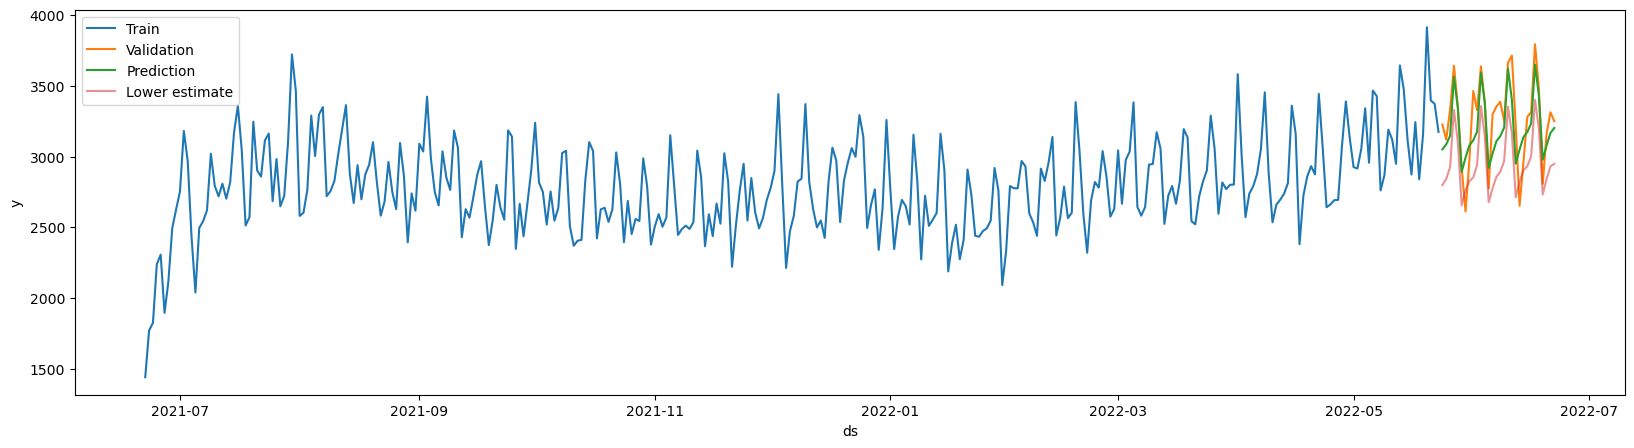

In [23]:
plt.subplots(figsize=(20, 5))
sns.lineplot(data=train, 
             x= 'ds', 
             y= 'y',
             label= 'Train')
sns.lineplot(data=val, 
             x= 'ds', 
             y= 'y',
             label= 'Validation')
sns.lineplot(data=pred_prophet,
             x= 'ds', 
             y= 'yhat',
             label= 'Prediction')
sns.lineplot(data=pred_prophet,
             x= 'ds', 
             y= 'yhat_lower',
             label= 'Lower estimate',
             alpha=0.5)
plt.show()

In [24]:
print('7 Day MSE: ', mean_squared_error(val['y'][:7], pred_prophet['yhat'][:7]))
print('7 Day MAE: ',mean_absolute_error(val['y'][:7], pred_prophet['yhat'][:7]))
print('7 Day MAPE: ',mean_absolute_percentage_error(val['y'][:7], pred_prophet['yhat'][:7]))
print()
print('14 Day MSE: ', mean_squared_error(val['y'][:14], pred_prophet['yhat'][:14]))
print('14 Day MAE: ',mean_absolute_error(val['y'][:14], pred_prophet['yhat'][:14]))
print('14 Day MAPE: ',mean_absolute_percentage_error(val['y'][:14], pred_prophet['yhat'][:14]))
print()
print('30 Day MSE: ', mean_squared_error(val['y'], pred_prophet['yhat']))
print('30 Day MAE: ',mean_absolute_error(val['y'], pred_prophet['yhat']))
print('30 Day MAPE: ',mean_absolute_percentage_error(val['y'], pred_prophet['yhat']))

7 Day MSE:  31086.92115435193
7 Day MAE:  128.4086597224569
7 Day MAPE:  0.04326296056259843

14 Day MSE:  33770.98448920599
14 Day MAE:  141.47235947473413
14 Day MAPE:  0.04541109174806553

30 Day MSE:  35123.38868845089
30 Day MAE:  151.25074878705377
30 Day MAPE:  0.04791378208672733


In [25]:
def prophet_duration(store_data, num_days_data):
    results = {}
    results['num_days_data'] = num_days_data
    # Get Inside Sales from Store Data and prep for Prophet
    is_ts = store_data[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
    is_ts['ds'] = pd.to_datetime(is_ts['ds'])
    # Split data into train and val based on num_days_data
    train = is_ts.iloc[:num_days_data]
    val = is_ts.iloc[num_days_data:num_days_data+30]
    # Fit model
    model = Prophet()
    model.fit(train)
    # Predict next 30 days
    preds = model.predict(val)
    results['RMSE_7'] = mean_squared_error(val['y'][:7], pred_prophet['yhat'][:7], squared=False)
    results['MAE_7'] = mean_absolute_error(val['y'][:7], pred_prophet['yhat'][:7])
    results['MAPE_7'] = mean_absolute_percentage_error(val['y'][:7], pred_prophet['yhat'][:7])
    results['RMSE_14'] = mean_squared_error(val['y'][:14], pred_prophet['yhat'][:14], squared=False)
    results['MAE_14'] = mean_absolute_error(val['y'][:14], pred_prophet['yhat'][:14])
    results['MAPE_14'] = mean_absolute_percentage_error(val['y'][:14], pred_prophet['yhat'][:14])
    results['RMSE_30'] = mean_squared_error(val['y'][:30], pred_prophet['yhat'][:30], squared=False)
    results['MAE_30'] = mean_absolute_error(val['y'][:30], pred_prophet['yhat'][:30])
    results['MAPE_30'] = mean_absolute_percentage_error(val['y'][:30], pred_prophet['yhat'][:30])
    
    return results

In [26]:
results=[]
for i in range(2,336):
    out = prophet_duration(store_data, i)
    results.append(out)
    

07:07:12 - cmdstanpy - INFO - Chain [1] start processing
07:07:12 - cmdstanpy - INFO - Chain [1] done processing
07:07:12 - cmdstanpy - INFO - Chain [1] start processing
07:07:12 - cmdstanpy - INFO - Chain [1] done processing
07:07:12 - cmdstanpy - INFO - Chain [1] start processing
07:07:12 - cmdstanpy - INFO - Chain [1] done processing
07:07:12 - cmdstanpy - INFO - Chain [1] start processing
07:07:12 - cmdstanpy - INFO - Chain [1] done processing
07:07:12 - cmdstanpy - INFO - Chain [1] start processing
07:07:12 - cmdstanpy - INFO - Chain [1] done processing
07:07:13 - cmdstanpy - INFO - Chain [1] start processing
07:07:13 - cmdstanpy - INFO - Chain [1] done processing
07:07:13 - cmdstanpy - INFO - Chain [1] start processing
07:07:13 - cmdstanpy - INFO - Chain [1] done processing
07:07:13 - cmdstanpy - INFO - Chain [1] start processing
07:07:13 - cmdstanpy - INFO - Chain [1] done processing
07:07:13 - cmdstanpy - INFO - Chain [1] start processing
07:07:13 - cmdstanpy - INFO - Chain [1]

07:07:29 - cmdstanpy - INFO - Chain [1] done processing
07:07:29 - cmdstanpy - INFO - Chain [1] start processing
07:07:29 - cmdstanpy - INFO - Chain [1] done processing
07:07:29 - cmdstanpy - INFO - Chain [1] start processing
07:07:29 - cmdstanpy - INFO - Chain [1] done processing
07:07:29 - cmdstanpy - INFO - Chain [1] start processing
07:07:30 - cmdstanpy - INFO - Chain [1] done processing
07:07:30 - cmdstanpy - INFO - Chain [1] start processing
07:07:30 - cmdstanpy - INFO - Chain [1] done processing
07:07:30 - cmdstanpy - INFO - Chain [1] start processing
07:07:30 - cmdstanpy - INFO - Chain [1] done processing
07:07:30 - cmdstanpy - INFO - Chain [1] start processing
07:07:31 - cmdstanpy - INFO - Chain [1] done processing
07:07:31 - cmdstanpy - INFO - Chain [1] start processing
07:07:31 - cmdstanpy - INFO - Chain [1] done processing
07:07:31 - cmdstanpy - INFO - Chain [1] start processing
07:07:31 - cmdstanpy - INFO - Chain [1] done processing
07:07:31 - cmdstanpy - INFO - Chain [1] 

07:07:44 - cmdstanpy - INFO - Chain [1] done processing
07:07:44 - cmdstanpy - INFO - Chain [1] start processing
07:07:44 - cmdstanpy - INFO - Chain [1] done processing
07:07:44 - cmdstanpy - INFO - Chain [1] start processing
07:07:44 - cmdstanpy - INFO - Chain [1] done processing
07:07:44 - cmdstanpy - INFO - Chain [1] start processing
07:07:44 - cmdstanpy - INFO - Chain [1] done processing
07:07:44 - cmdstanpy - INFO - Chain [1] start processing
07:07:44 - cmdstanpy - INFO - Chain [1] done processing
07:07:44 - cmdstanpy - INFO - Chain [1] start processing
07:07:44 - cmdstanpy - INFO - Chain [1] done processing
07:07:44 - cmdstanpy - INFO - Chain [1] start processing
07:07:45 - cmdstanpy - INFO - Chain [1] done processing
07:07:45 - cmdstanpy - INFO - Chain [1] start processing
07:07:45 - cmdstanpy - INFO - Chain [1] done processing
07:07:45 - cmdstanpy - INFO - Chain [1] start processing
07:07:45 - cmdstanpy - INFO - Chain [1] done processing
07:07:45 - cmdstanpy - INFO - Chain [1] 

07:07:55 - cmdstanpy - INFO - Chain [1] done processing
07:07:55 - cmdstanpy - INFO - Chain [1] start processing
07:07:55 - cmdstanpy - INFO - Chain [1] done processing
07:07:55 - cmdstanpy - INFO - Chain [1] start processing
07:07:55 - cmdstanpy - INFO - Chain [1] done processing
07:07:55 - cmdstanpy - INFO - Chain [1] start processing
07:07:55 - cmdstanpy - INFO - Chain [1] done processing
07:07:55 - cmdstanpy - INFO - Chain [1] start processing
07:07:55 - cmdstanpy - INFO - Chain [1] done processing
07:07:55 - cmdstanpy - INFO - Chain [1] start processing
07:07:55 - cmdstanpy - INFO - Chain [1] done processing
07:07:56 - cmdstanpy - INFO - Chain [1] start processing
07:07:56 - cmdstanpy - INFO - Chain [1] done processing
07:07:56 - cmdstanpy - INFO - Chain [1] start processing
07:07:56 - cmdstanpy - INFO - Chain [1] done processing
07:07:56 - cmdstanpy - INFO - Chain [1] start processing
07:07:56 - cmdstanpy - INFO - Chain [1] done processing
07:07:56 - cmdstanpy - INFO - Chain [1] 

07:08:06 - cmdstanpy - INFO - Chain [1] done processing
07:08:06 - cmdstanpy - INFO - Chain [1] start processing
07:08:06 - cmdstanpy - INFO - Chain [1] done processing
07:08:06 - cmdstanpy - INFO - Chain [1] start processing
07:08:07 - cmdstanpy - INFO - Chain [1] done processing
07:08:07 - cmdstanpy - INFO - Chain [1] start processing
07:08:07 - cmdstanpy - INFO - Chain [1] done processing
07:08:07 - cmdstanpy - INFO - Chain [1] start processing
07:08:07 - cmdstanpy - INFO - Chain [1] done processing
07:08:07 - cmdstanpy - INFO - Chain [1] start processing
07:08:07 - cmdstanpy - INFO - Chain [1] done processing
07:08:07 - cmdstanpy - INFO - Chain [1] start processing
07:08:07 - cmdstanpy - INFO - Chain [1] done processing
07:08:07 - cmdstanpy - INFO - Chain [1] start processing
07:08:07 - cmdstanpy - INFO - Chain [1] done processing
07:08:07 - cmdstanpy - INFO - Chain [1] start processing
07:08:08 - cmdstanpy - INFO - Chain [1] done processing
07:08:08 - cmdstanpy - INFO - Chain [1] 

In [27]:
duration_results = pd.DataFrame(results)

In [28]:
duration_results

num_days_data       RMSE_7       MAE_7    MAPE_7     RMSE_14      MAE_14  \
0                2  1033.896529  937.213311  0.452012  893.059410  753.694802   
1                3   906.664569  804.722311  0.366487  837.367160  702.080276   
2                4   821.878062  724.193840  0.320369  777.971050  658.794443   
3                5   755.601480  658.362435  0.284773  744.408403  652.667590   
4                6   596.058868  521.750435  0.210766  628.023620  549.515240   
..             ...          ...         ...       ...         ...         ...   
329            331   368.586957  286.692985  0.081923  426.619452  349.484042   
330            332   417.884409  352.972485  0.101722  475.656721  411.107889   
331            333   374.101834  329.770985  0.097360  409.363037  362.398647   
332            334   379.994402  294.639485  0.086984  377.097351  298.146668   
333            335   239.452530  193.770414  0.057853  284.781911  249.162364   

      MAPE_14     RMSE_30      MAE_30   MAPE_30  
0    0.347120  711.158074  559.665644  0.238083  
1    0.311726  663.350888  507.914266  0.211086  
2    0.285429  628.358219  513.740487  0.207249  
3    0.276534  607.877630  509.786169  0.202278  
4    0.223114  521.207345  444.677065  0.171368  
..        ...         ...         ...       ...  
329  0.108100  430.422553  357.371168  0.110519  
330  0.127329  462.707535  398.293217  0.123060  
331  0.112218  414.196215  360.134140  0.111454  
332  0.091198  392.748324  318.024653  0.096889  
333  0.077950  312.299615  265.192094  0.081568  

[334 rows x 10 columns]

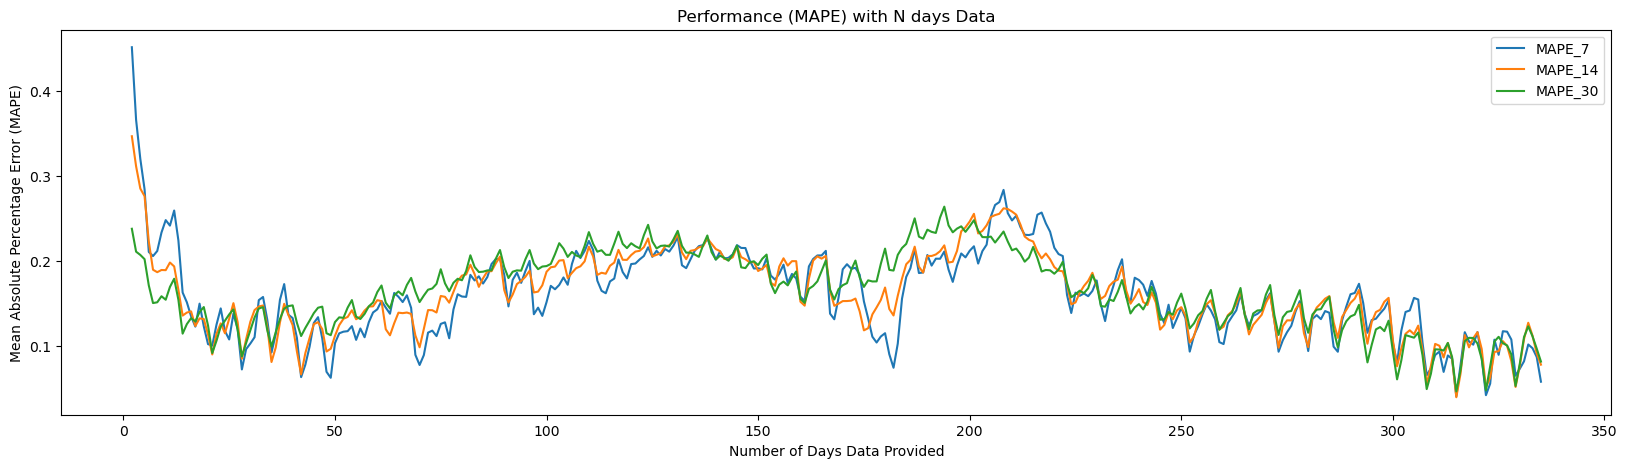

In [29]:
plt.subplots(figsize=(20, 5))
ax = sns.lineplot(data=duration_results, 
             x= 'num_days_data', 
             y= 'MAPE_7',
             label= 'MAPE_7')
ax = sns.lineplot(data=duration_results, 
             x= 'num_days_data', 
             y= 'MAPE_14',
             label= 'MAPE_14')
ax = sns.lineplot(data=duration_results, 
             x= 'num_days_data', 
             y= 'MAPE_30',
             label= 'MAPE_30')
ax.set(xlabel='Number of Days Data Provided',
       ylabel='Mean Absolute Percentage Error (MAPE)',
       title='Performance (MAPE) with N days Data')
plt.show()

<Axes: xlabel='num_days_data', ylabel='MAE_7'>

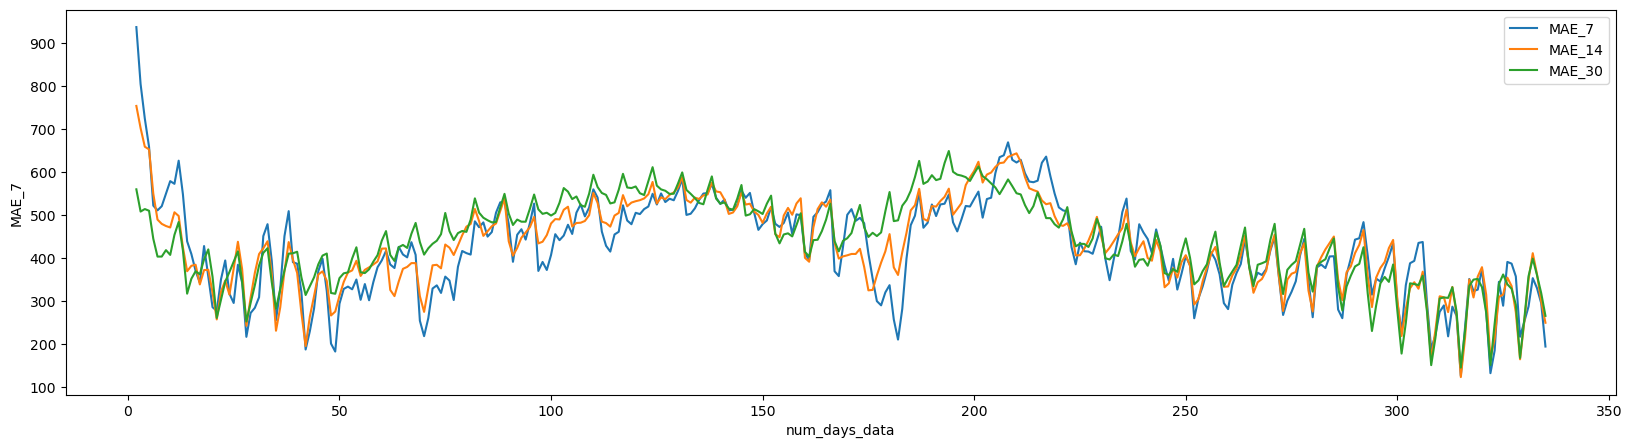

In [30]:
plt.subplots(figsize=(20, 5))
sns.lineplot(data=duration_results, 
             x= 'num_days_data', 
             y= 'MAE_7',
             label= 'MAE_7')
sns.lineplot(data=duration_results, 
             x= 'num_days_data', 
             y= 'MAE_14',
             label= 'MAE_14')
sns.lineplot(data=duration_results, 
             x= 'num_days_data', 
             y= 'MAE_30',
             label= 'MAE_30')

<Axes: xlabel='num_days_data', ylabel='RMSE_7'>

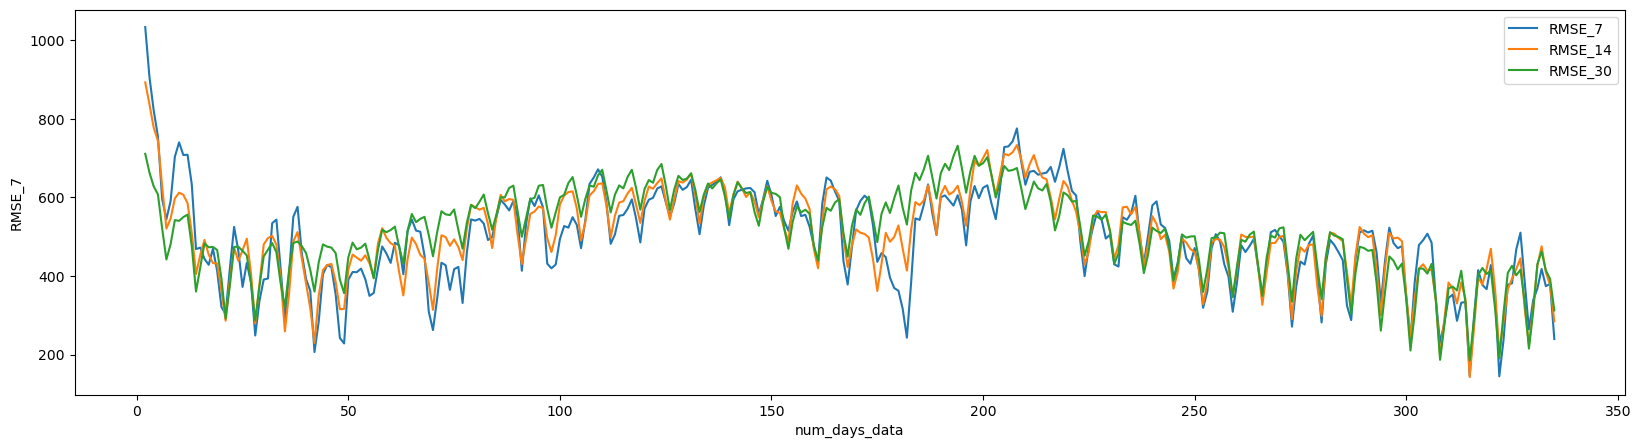

In [31]:
plt.subplots(figsize=(20, 5))
sns.lineplot(data=duration_results, 
             x= 'num_days_data', 
             y= 'RMSE_7',
             label= 'RMSE_7')
sns.lineplot(data=duration_results, 
             x= 'num_days_data', 
             y= 'RMSE_14',
             label= 'RMSE_14')
sns.lineplot(data=duration_results, 
             x= 'num_days_data', 
             y= 'RMSE_30',
             label= 'RMSE_30')

In [32]:
    is_ts = store_data[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
    is_ts['ds'] = pd.to_datetime(is_ts['ds'])
    # Split data into train and val based on num_days_data
    train = is_ts.iloc[:50]
    val = is_ts.iloc[50:]
    # Fit model
    model = Prophet()
    model.fit(train)
    # Predict rest of year
    preds = model.predict(val)

07:08:15 - cmdstanpy - INFO - Chain [1] start processing
07:08:15 - cmdstanpy - INFO - Chain [1] done processing


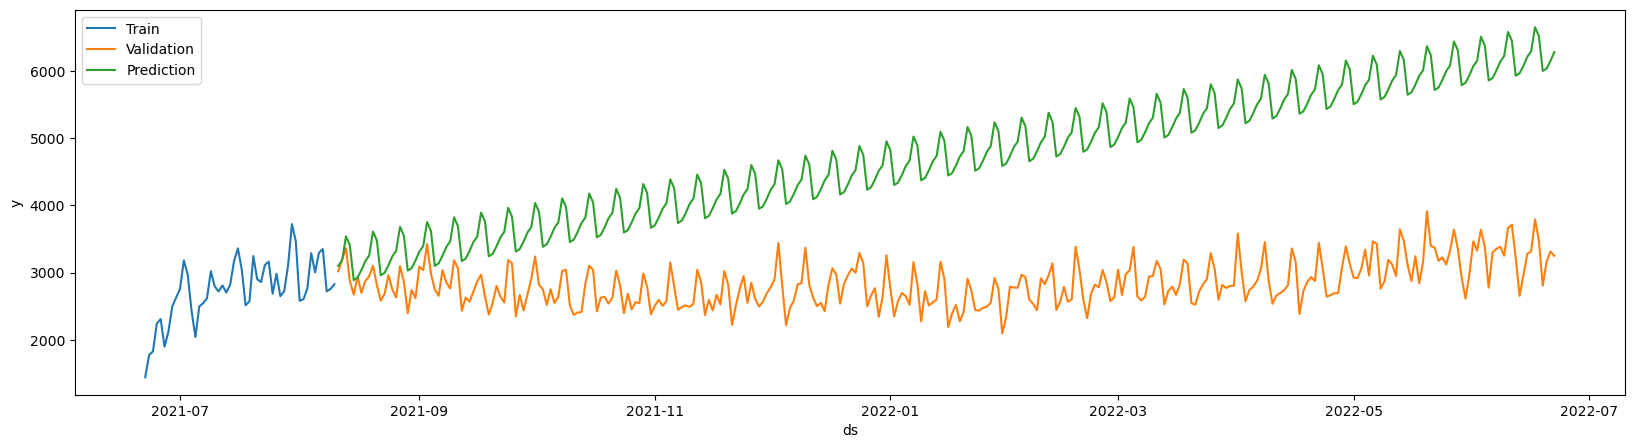

In [33]:
plt.subplots(figsize=(20, 5))
sns.lineplot(data=train, 
             x= 'ds', 
             y= 'y',
             label= 'Train')
sns.lineplot(data=val, 
             x= 'ds', 
             y= 'y',
             label= 'Validation')
sns.lineplot(data=preds,
             x= 'ds', 
             y= 'yhat',
             label= 'Prediction')
plt.show()

In [34]:
def prophet_prediction(store_data, num_days_data):
    results = {}
    results['num_days_data'] = num_days_data
    # Get Inside Sales from Store Data and prep for Prophet
    is_ts = store_data[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
    is_ts['ds'] = pd.to_datetime(is_ts['ds'])
    # Split data into train and val based on num_days_data
    train = is_ts.iloc[:num_days_data]
    val = is_ts.iloc[num_days_data:]
    # Fit model
    model = Prophet()
    model.fit(train)
    # Predict next 30 days
    preds = model.predict(val)
    
    return train, val, preds

07:08:15 - cmdstanpy - INFO - Chain [1] start processing
07:08:15 - cmdstanpy - INFO - Chain [1] done processing


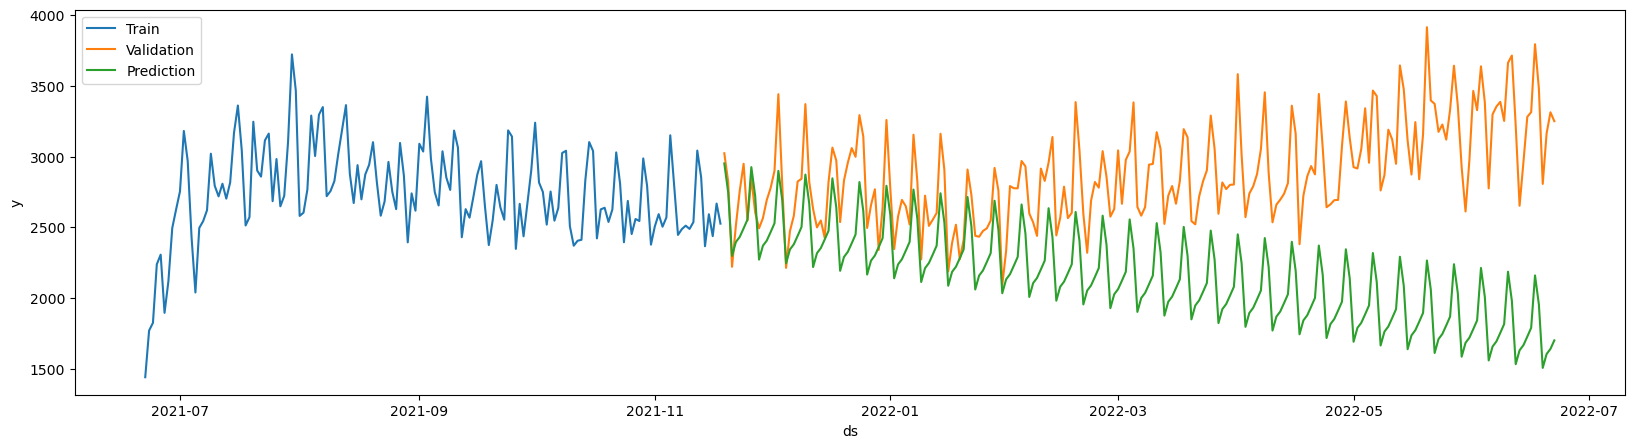

07:08:16 - cmdstanpy - INFO - Chain [1] start processing
07:08:16 - cmdstanpy - INFO - Chain [1] done processing


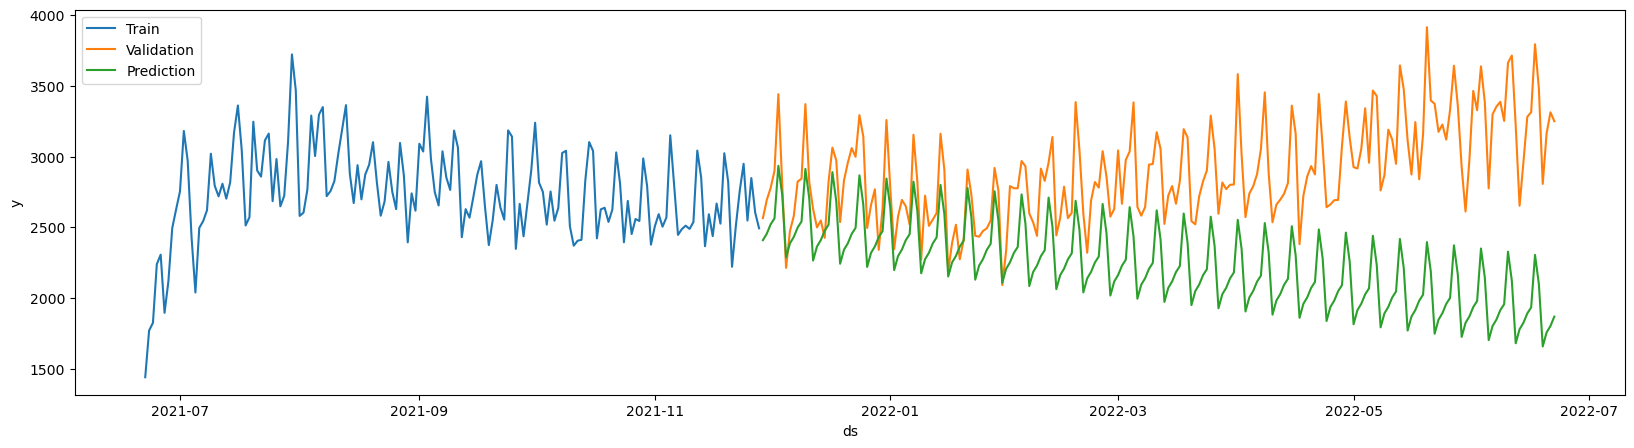

07:08:16 - cmdstanpy - INFO - Chain [1] start processing
07:08:16 - cmdstanpy - INFO - Chain [1] done processing


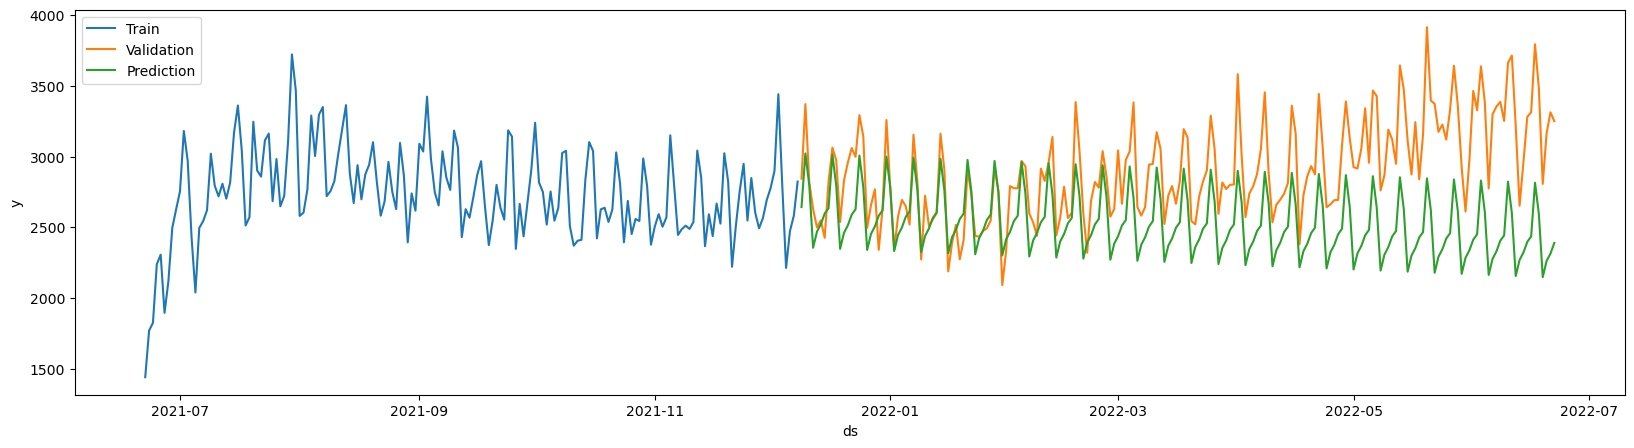

07:08:16 - cmdstanpy - INFO - Chain [1] start processing
07:08:16 - cmdstanpy - INFO - Chain [1] done processing


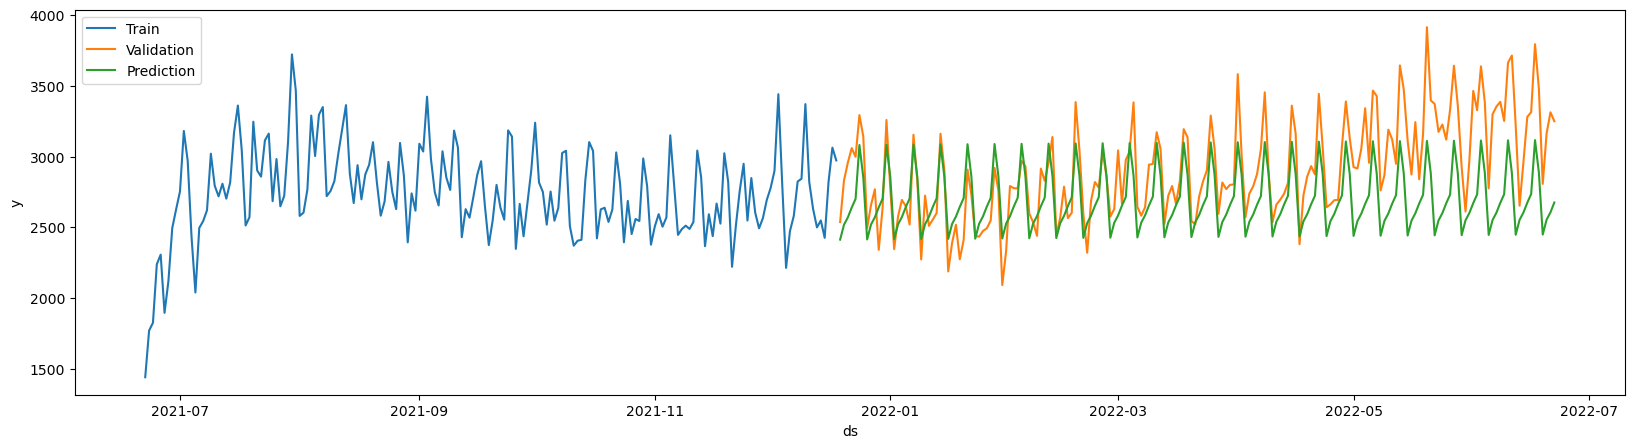

07:08:17 - cmdstanpy - INFO - Chain [1] start processing
07:08:17 - cmdstanpy - INFO - Chain [1] done processing


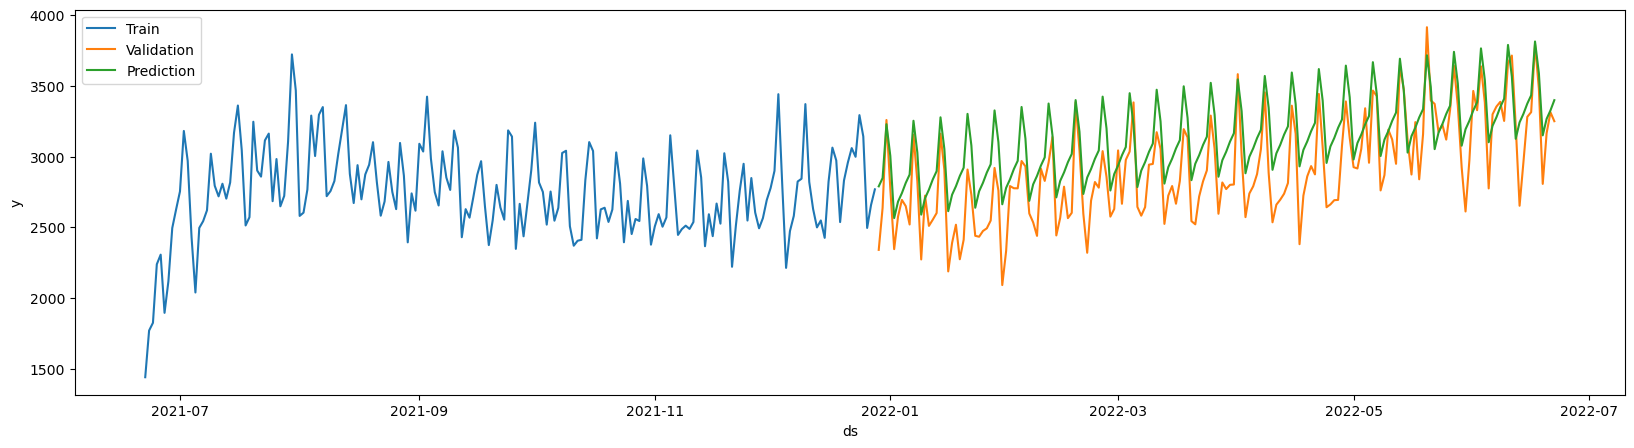

07:08:17 - cmdstanpy - INFO - Chain [1] start processing
07:08:17 - cmdstanpy - INFO - Chain [1] done processing


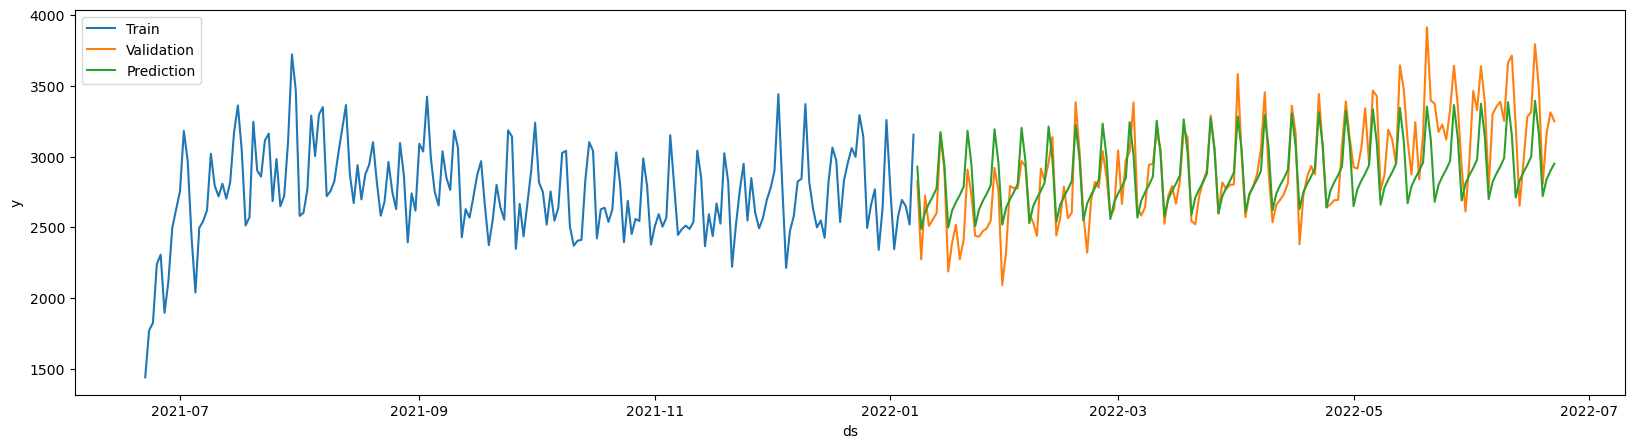

07:08:18 - cmdstanpy - INFO - Chain [1] start processing
07:08:18 - cmdstanpy - INFO - Chain [1] done processing


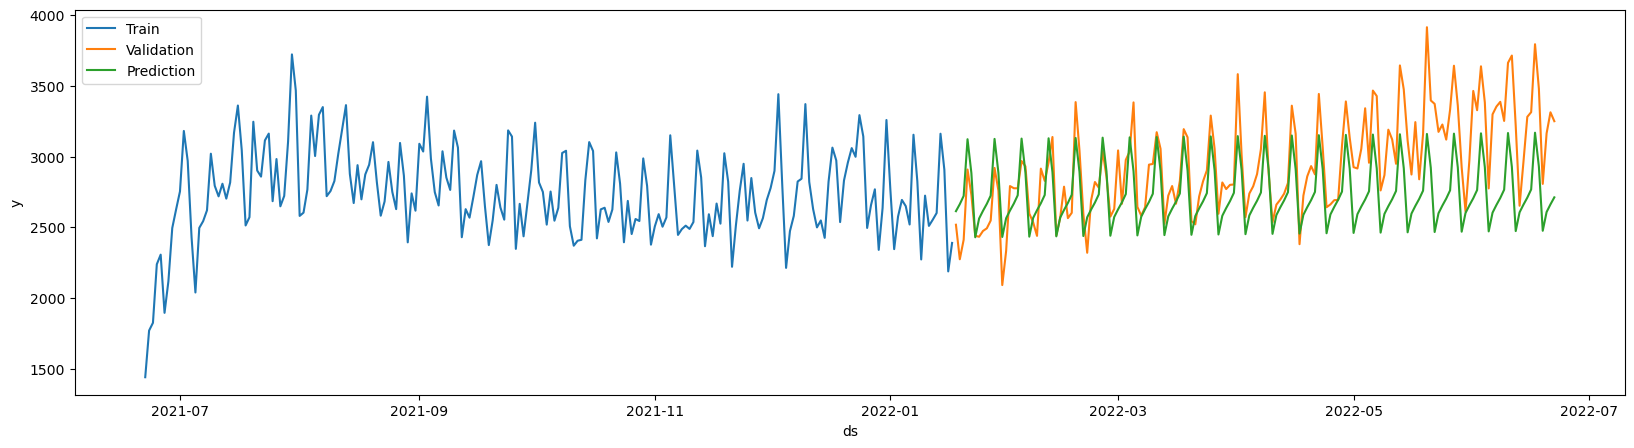

07:08:18 - cmdstanpy - INFO - Chain [1] start processing
07:08:18 - cmdstanpy - INFO - Chain [1] done processing


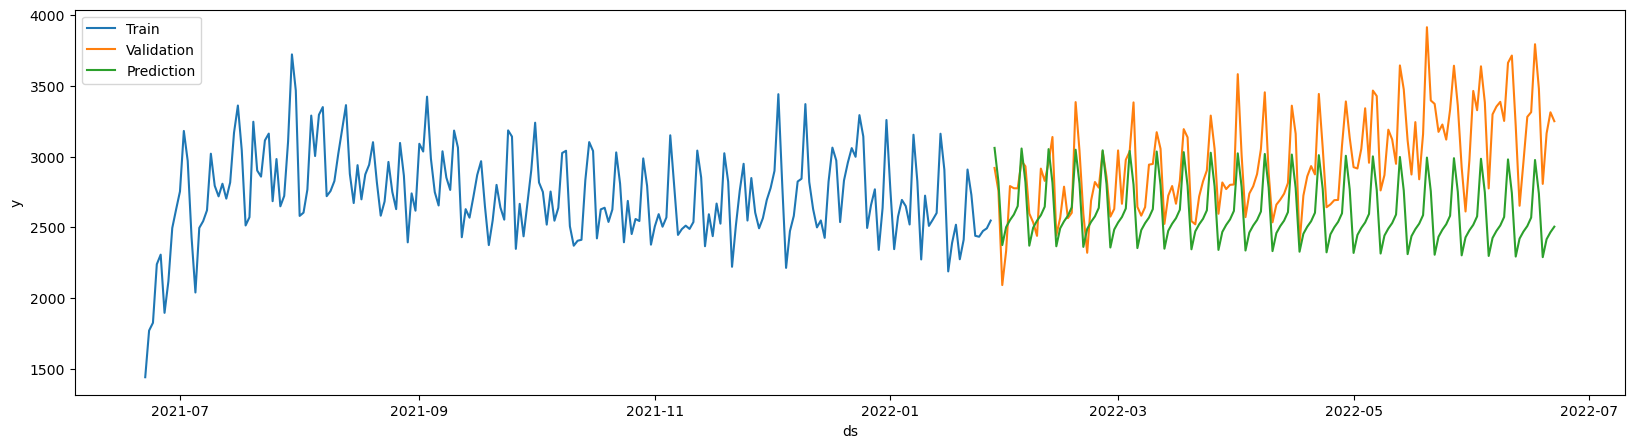

07:08:18 - cmdstanpy - INFO - Chain [1] start processing
07:08:18 - cmdstanpy - INFO - Chain [1] done processing


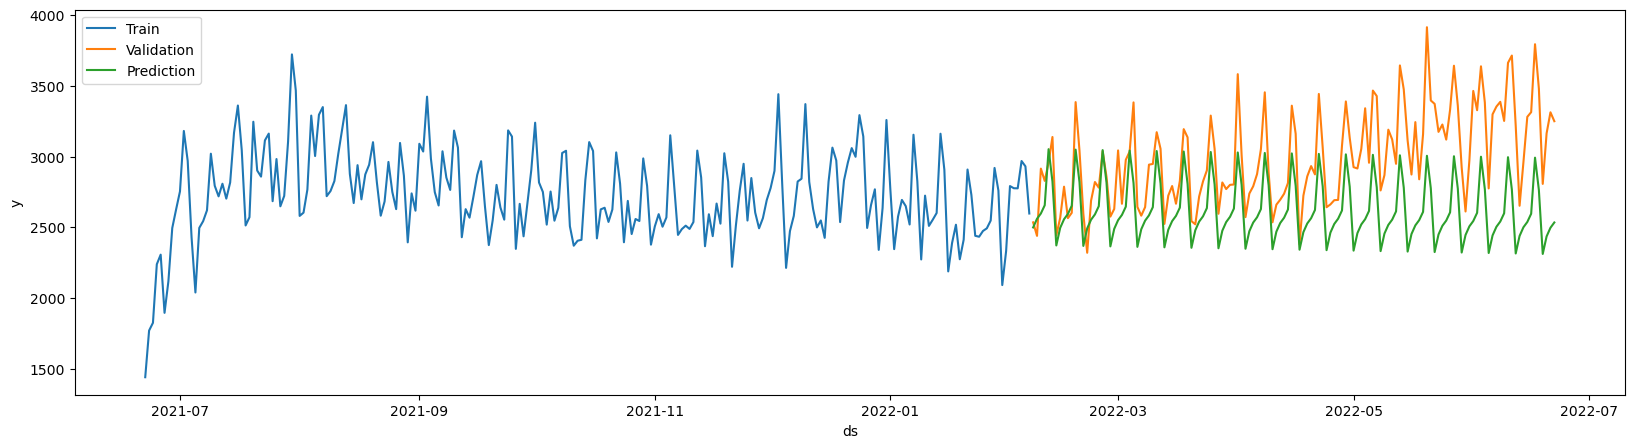

07:08:19 - cmdstanpy - INFO - Chain [1] start processing
07:08:19 - cmdstanpy - INFO - Chain [1] done processing


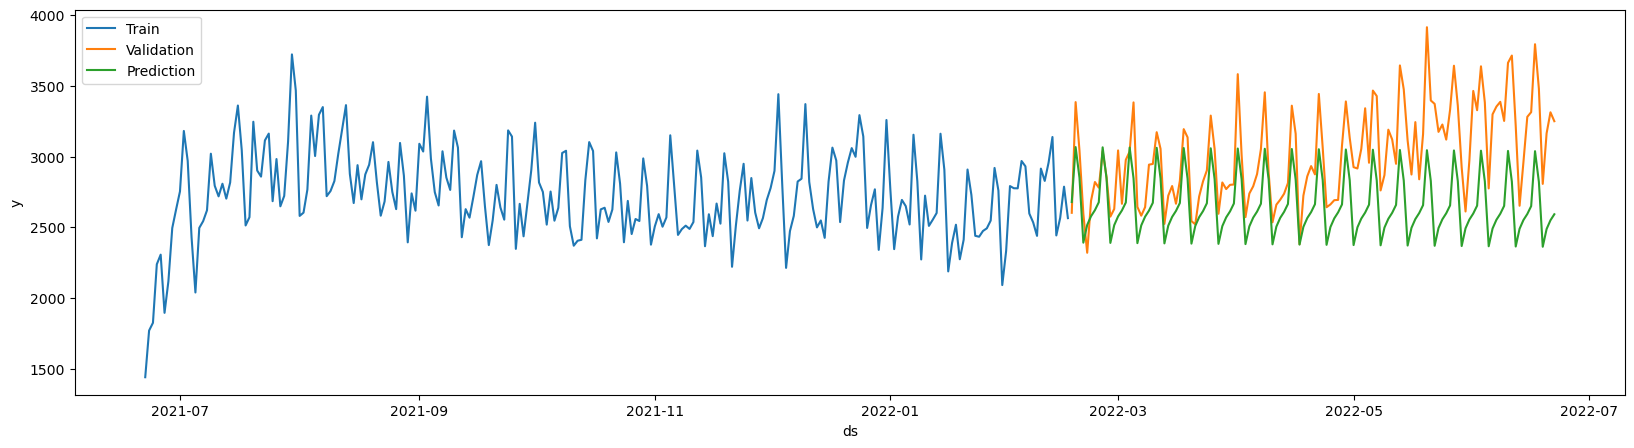

In [35]:
intervals = range(150,250,10)

for i in intervals:
        train, val, out = prophet_prediction(store_data, i)
        plt.subplots(figsize=(20, 5))
        sns.lineplot(data=train, 
                     x= 'ds', 
                     y= 'y',
                     label= 'Train')
        sns.lineplot(data=val, 
                     x= 'ds', 
                     y= 'y',
                     label= 'Validation')
        sns.lineplot(data=out,
                     x= 'ds', 
                     y= 'yhat',
                     label= 'Prediction')
        plt.show()

In [36]:
## Data Preprocessing ####

# Load your dataset
df = pd.read_csv("../Maverik_Capstone/data/merged_data.csv")  # Replace with your data file path
cat = pd.read_csv("../Maverik_Capstone/data/qualitative_data_msba_clean.csv")
clust = pd.read_csv('../Maverik_Capstone/data/clusters.csv', index_col=0) # Cluster data
df = pd.merge(df, clust, on='site_id_msba', how='left')
cat = pd.merge(cat, clust, on='site_id_msba', how='left')
np.random.seed(1234)
test_idx = list(np.random.randint(0,len(cat),5))
out_store = cat.loc[1]['site_id_msba']
test = cat.loc[test_idx]['site_id_msba']
test_clust = cat.loc[test_idx]['cluster']
df['cal.day'] = pd.DatetimeIndex(df['calendar.calendar_day_date']).day
df['cal.month'] = pd.DatetimeIndex(df['calendar.calendar_day_date']).month
df['cal.year'] = pd.DatetimeIndex(df['calendar.calendar_day_date']).year

df = df[['site_id_msba', # ID Variable
         'calendar.calendar_day_date', # Date Variable
           # Target Variables
           'inside_sales',
           'food_service',
           'diesel_x', 
           'unleaded',
           # Predictor Variables
           'cluster',
           'calendar.fiscal_week_id_for_year',
           'calendar.day_of_week',
           'x1_mile_pop', 
           'x1_mile_emp',
           'x1_mile_income', 
           'x1_2_mile_pop', 
           'x1_2_mile_emp', 
           'x1_2_mile_income',
           'x5_min_pop', 
           'x5_min_emp', 
           'x5_min_inc', 
           'x7_min_pop', 
           'x7_min_emp',
           'x7_min_inc', 
           'traditional_forecourt_fueling_positions',
           'calendar_information.holiday',
           'cal.month',
           # Other Predictor Variables
           'lottery', 
           'bonfire_grill', 
           'pizza', 
           'ethanol_free',  
           'hi_flow_lanes', 
           'hi_flow_rv_lanes', 
           'rv_lanes_fueling_positions', 
           'hi_flow_lanes_fueling_positions'
          ]]

## Get Dummy Variables

# Get Holiday Dummies
df = pd.get_dummies(df, prefix = 'holiday', columns=['calendar_information.holiday'], drop_first=False).drop(columns=['holiday_NONE'])
# Get Day of Week Dummies
df = pd.get_dummies(df, prefix = 'day', columns=['calendar.day_of_week'], drop_first=False).drop(columns=['day_Monday'])
# Get Cluster Dummies
df = pd.get_dummies(df, prefix = 'cluster', columns=['cluster'], drop_first=True)

# Convert Yes/No to 1/0
col_list=[
          'lottery',
          'bonfire_grill',
          'pizza',
          'ethanol_free',
          'hi_flow_lanes',
          'hi_flow_rv_lanes'
         ]

for col in col_list:
    df[col] = df[col].map({'Yes': 1, 'No': 0})
    
# Reshape Data for model building
data = df.drop(df[df['site_id_msba'].isin(test.values)].index) # Drop Test Stores from df
data = data.drop(data[data['site_id_msba'].isin([out_store])].index) # Drop Outlier Store from data
# Reserve unused test data
test_df = df.loc[df['site_id_msba'].isin(test.values)]

target_cols = ['site_id_msba', 'calendar.calendar_day_date', 'inside_sales', 'food_service','diesel_x', 'unleaded']
X = data.drop(columns=target_cols)
y = pd.DataFrame(data[target_cols])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1234)

In [37]:
xgb_is = pickle.load(open('./models/Cluster_Norm/inside_sales.sav', 'rb'))
xgb_fs = pickle.load(open('./models/Cluster_Norm/food_service.sav', 'rb'))
xgb_diesel = pickle.load(open('./models/Cluster_Norm/diesel.sav', 'rb'))
xgb_unleaded = pickle.load(open('./models/Cluster_Norm/unleaded.sav', 'rb'))

In [407]:
def TestStorePredict(site_id):
    teststore_df = test_df.loc[test_df['site_id_msba'] == site_id]

    target_cols = target_cols = ['site_id_msba', 'calendar.calendar_day_date', 'inside_sales', 'food_service','diesel_x', 'unleaded']
    X = teststore_df.drop(columns=target_cols)
    y = pd.DataFrame(teststore_df[target_cols])
    # Predict sales for site_id
    is_pred = xgb_is.predict(X)
    fs_pred = xgb_fs.predict(X)
    d_pred = xgb_diesel.predict(X)
    u_pred = xgb_unleaded.predict(X)
    
    # Add predictions to y
    y['inside_sales_pred'] = is_pred
    y['food_service_pred'] = fs_pred
    y['diesel_pred'] = d_pred
    y['unleaded_pred'] = u_pred
    
    # Add evaluation metrics
    y['inside_sales_error'] = y['inside_sales_pred'] - y['inside_sales']
    y['food_service_error'] = y['food_service_pred'] - y['food_service']
    y['diesel_error'] = y['diesel_pred'] - y['diesel_x']
    y['unleaded_error'] = y['unleaded_pred'] - y['unleaded']
    
    # Print Report
    print('Performance Report for Store #', site_id)
    print('Daily Performance')
    # Inside Sales
    print('Inside Sales')
    print('RMSE: ',mean_squared_error(y['inside_sales'], y['inside_sales_pred'], squared=False))
    print('MSE: ',mean_squared_error(y['inside_sales'], y['inside_sales_pred']))
    print('MAE: ',mean_absolute_error(y['inside_sales'], y['inside_sales_pred']))
    print('MAPE: ',mean_absolute_percentage_error(y['inside_sales'], y['inside_sales_pred']))
    print()
    
    # Food Service
    print('Food Service')
    print('RMSE: ',mean_squared_error(y['food_service'], y['food_service_pred'], squared=False))
    print('MSE: ',mean_squared_error(y['food_service'], y['food_service_pred']))
    print('MAE: ',mean_absolute_error(y['food_service'], y['food_service_pred']))
    print('MAPE: ',mean_absolute_percentage_error(y['food_service'], y['food_service_pred']))
    print()
    
    # Diesel
    print('Diesel')
    print('RMSE: ',mean_squared_error(y['diesel_x'], y['diesel_pred'], squared=False))
    print('MSE: ',mean_squared_error(y['diesel_x'], y['diesel_pred']))
    print('MAE: ',mean_absolute_error(y['diesel_x'], y['diesel_pred']))
    print('MAPE: ',mean_absolute_percentage_error(y['diesel_x'], y['diesel_pred']))
    print()
    
    # Unleaded
    print('Unleaded')
    print('RMSE: ',mean_squared_error(y['unleaded'], y['unleaded_pred'], squared=False))
    print('MSE: ',mean_squared_error(y['unleaded'], y['unleaded_pred']))
    print('MAE: ',mean_absolute_error(y['unleaded'], y['unleaded_pred']))
    print('MAPE: ',mean_absolute_percentage_error(y['unleaded'], y['unleaded_pred']))
    print()
    
    print('Annual Performance')
    print('Annual Cumulative Error(Inside Sales): '  , y['inside_sales_error'].sum())
    print('Annual Cumulative Error % (Inside Sales): '  , (y['inside_sales_error'].sum() / y['inside_sales'].sum()) * 100)
    print('Annual Cumulative Error(Food Service): '  , y['food_service_error'].sum())
    print('Annual Cumulative Error % (Food Service): '  , (y['food_service_error'].sum() / y['food_service'].sum()) * 100)
    print('Annual Cumulative Error(Diesel Sales): '  , y['diesel_error'].sum())
    print('Annual Cumulative Error % (Diesel Sales): '  , (y['diesel_error'].sum() / y['diesel_x'].sum()) * 100)
    print('Annual Cumulative Error(Unleaded Sales): ', y['unleaded_error'].sum())
    print('Annual Cumulative Error % (Unleaded Sales): '  , (y['unleaded_error'].sum() / y['unleaded'].sum()) * 100)
    
    
    return y

In [408]:
def plot_annual_performance(teststore_df):
    fig, axes = plt.subplots(2,2,figsize=(10, 10))
    fig.subplots_adjust(wspace=0.3)

    sns.barplot(data=teststore_df, 
                 x= 'calendar.calendar_day_date', 
                 y= teststore_df['inside_sales'].cumsum(), 
                 label= 'Actual Sales',
                 ax= axes[0,0],
                 color='blue',
                 alpha=0.5)
    sns.lineplot(data=teststore_df, 
                 x='calendar.calendar_day_date', 
                 y=(teststore_df['inside_sales_pred']).cumsum(), 
                 label='Prediction', 
                 ax= axes[0,0])
    axes[0,0].set_title('Inside Sales')
    axes[0,0].set(xlabel='Date', ylabel='Inside Sales ($M)')
    axes[0,0].xaxis.set_major_locator(plt.MaxNLocator(5))
    axes[0,0].set_title('Inside Sales')
    sns.barplot(data=teststore_df, 
                 x= 'calendar.calendar_day_date', 
                 y= (teststore_df['food_service']).cumsum(), 
                 label= 'Actual Sales',
                 ax= axes[0,1],
                 color='blue',
                 alpha=0.5)
    sns.lineplot(data=teststore_df, 
                 x='calendar.calendar_day_date', 
                 y=teststore_df['food_service_pred'].cumsum(), 
                 label='Prediction', 
                 ax= axes[0,1])
    axes[0,1].set_title('Food Service')
    axes[0,1].set(xlabel='Date', ylabel='Food Service ($)')
    axes[0,1].xaxis.set_major_locator(plt.MaxNLocator(5))
    sns.barplot(data=teststore_df, 
                 x= 'calendar.calendar_day_date', 
                 y= teststore_df['diesel_x'].cumsum(), 
                 label= 'Actual Sales',
                 ax= axes[1,0],
                 color='blue',
                 alpha=0.5)
    sns.lineplot(data=teststore_df, 
                 x='calendar.calendar_day_date', 
                 y=(teststore_df['diesel_pred']).cumsum(), 
                 label='Prediction', 
                 ax= axes[1,0])
    axes[1,0].set_title('Diesel')
    axes[1,0].set(xlabel='Date', ylabel='Diesel Sales (gallons M)')
    axes[1,0].xaxis.set_major_locator(plt.MaxNLocator(5))
    sns.barplot(data=teststore_df, 
                 x= 'calendar.calendar_day_date', 
                 y= teststore_df['unleaded'].cumsum(), 
                 label= 'Actual Sales',
                 ax= axes[1,1],
                 color='blue',
                 alpha=0.5)
    sns.lineplot(data=teststore_df, 
                 x='calendar.calendar_day_date', 
                 y=(teststore_df['unleaded_pred']).cumsum(), 
                 label='Prediction', 
                 ax= axes[1,1])
    axes[1,1].set_title('Unleaded')
    axes[1,1].set(xlabel='Date', ylabel='Gasoline Sales (gallons M)')
    axes[1,1].xaxis.set_major_locator(plt.MaxNLocator(5))
    plt.show()
    
    plt.subplots(figsize=(20, 5))
    sns.barplot(data=teststore_df, 
                x= 'calendar.calendar_day_date', 
                y= teststore_df['inside_sales_error'])
    plt.show()
    plt.subplots(figsize=(20, 5))
    sns.barplot(data=teststore_df, 
                x= 'calendar.calendar_day_date', 
                y= teststore_df['food_service_error'])
    plt.show()
    plt.subplots(figsize=(20, 5))
    sns.barplot(data=teststore_df, 
                x= 'calendar.calendar_day_date', 
                y= teststore_df['diesel_error'])
    plt.show()
    plt.subplots(figsize=(20, 5))
    sns.barplot(data=teststore_df, 
                x= 'calendar.calendar_day_date', 
                y= teststore_df['unleaded_error'])
    plt.show()

Performance Report for Store # 22925
Daily Performance
Inside Sales
RMSE:  892.4921943588847
MSE:  796542.3169915373
MAE:  822.6519324117359
MAPE:  0.28674155184764194

Food Service
RMSE:  207.9725900756826
MSE:  43252.598222787914
MAE:  189.9909709159142
MAPE:  0.317152970286744

Diesel
RMSE:  122.74137151095792
MSE:  15065.444280390993
MAE:  97.88859889847073
MAPE:  0.5146188400238028

Unleaded
RMSE:  782.5790489594382
MSE:  612429.9678702587
MAE:  704.0229475537909
MAPE:  0.42475500299532526

Annual Performance
Annual Cumulative Error(Inside Sales):  -297891.3670615234
Annual Cumulative Error % (Inside Sales):  -28.776669753119794
Annual Cumulative Error(Food Service):  -69246.2549152832
Annual Cumulative Error % (Food Service):  -32.00336992002393
Annual Cumulative Error(Diesel Sales):  -21112.621214906692
Annual Cumulative Error % (Diesel Sales):  -29.884845613660172
Annual Cumulative Error(Unleaded Sales):  217371.18996875
Annual Cumulative Error % (Unleaded Sales):  32.279577149

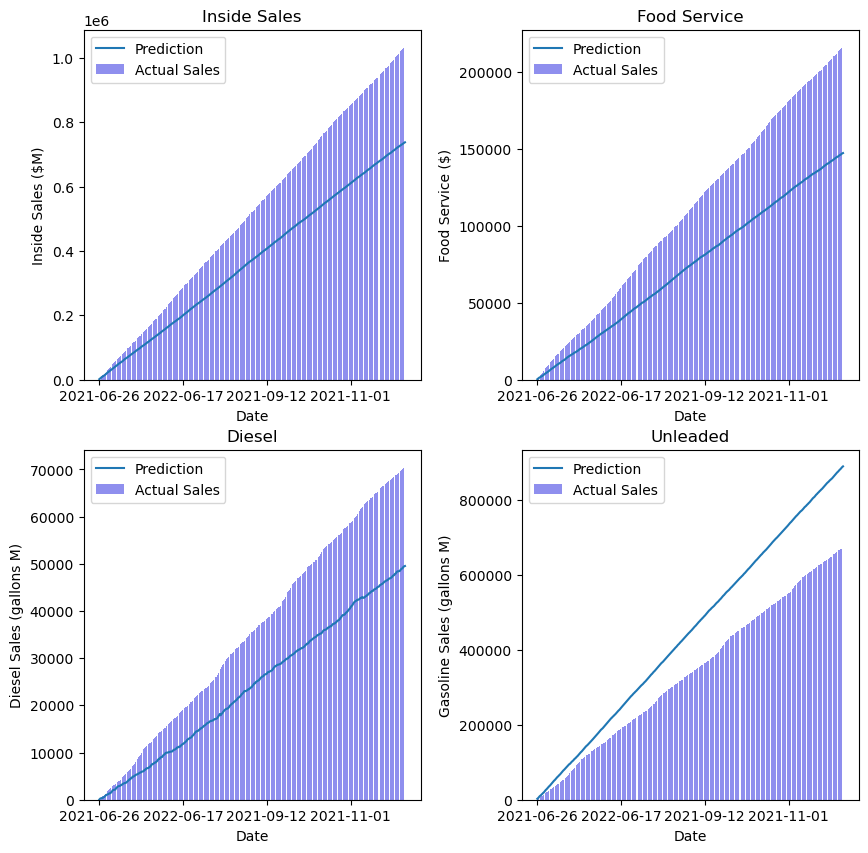

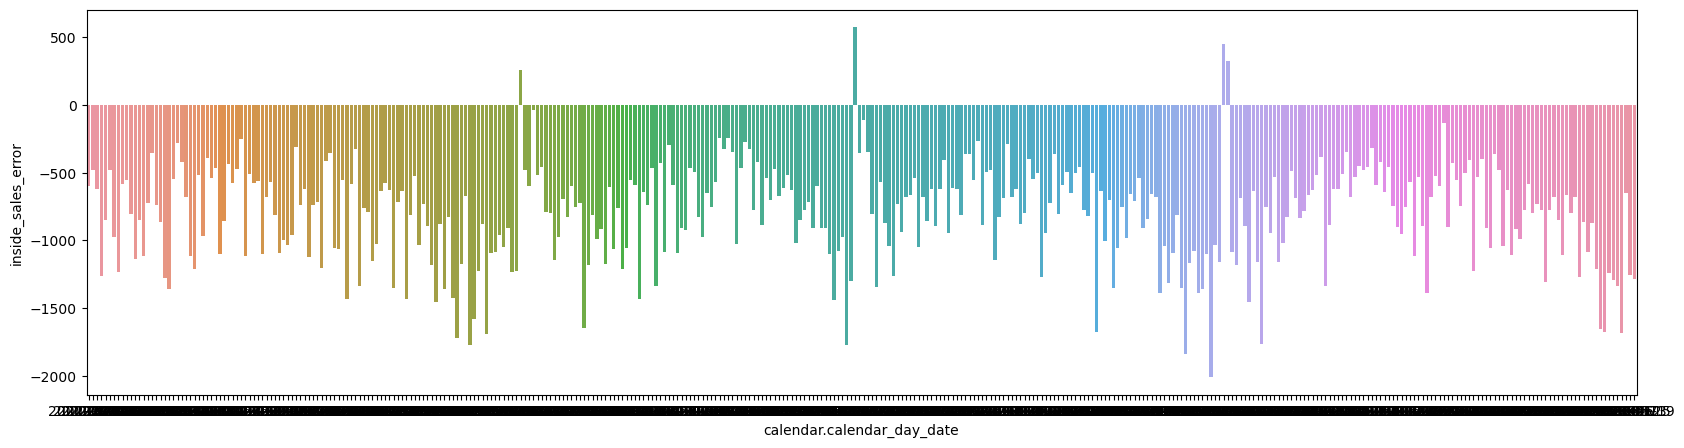

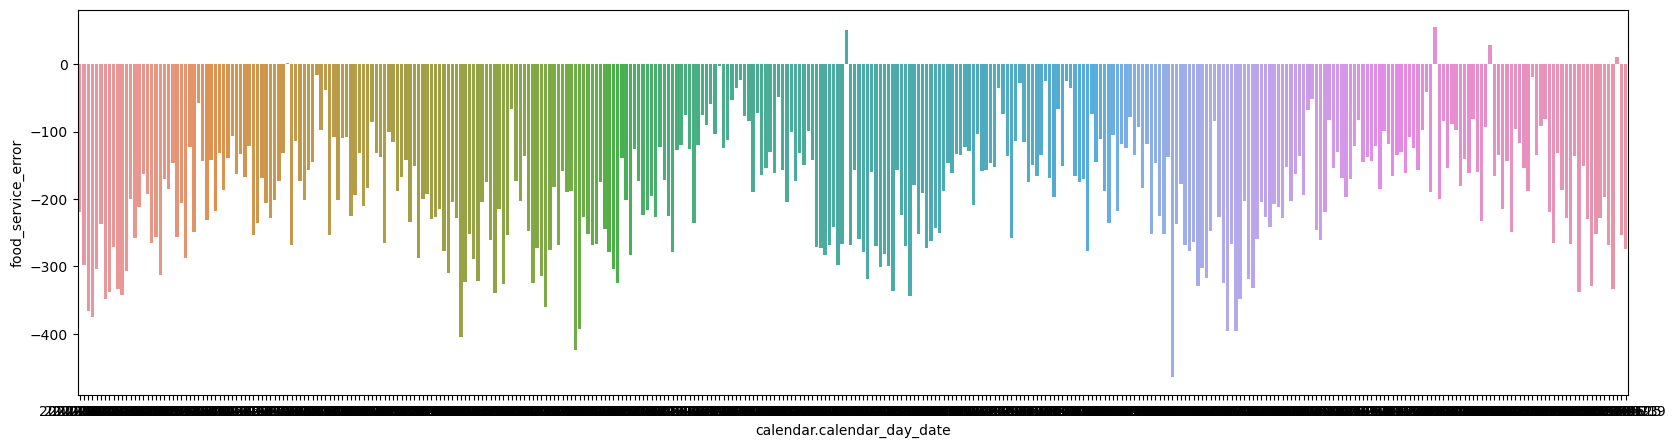

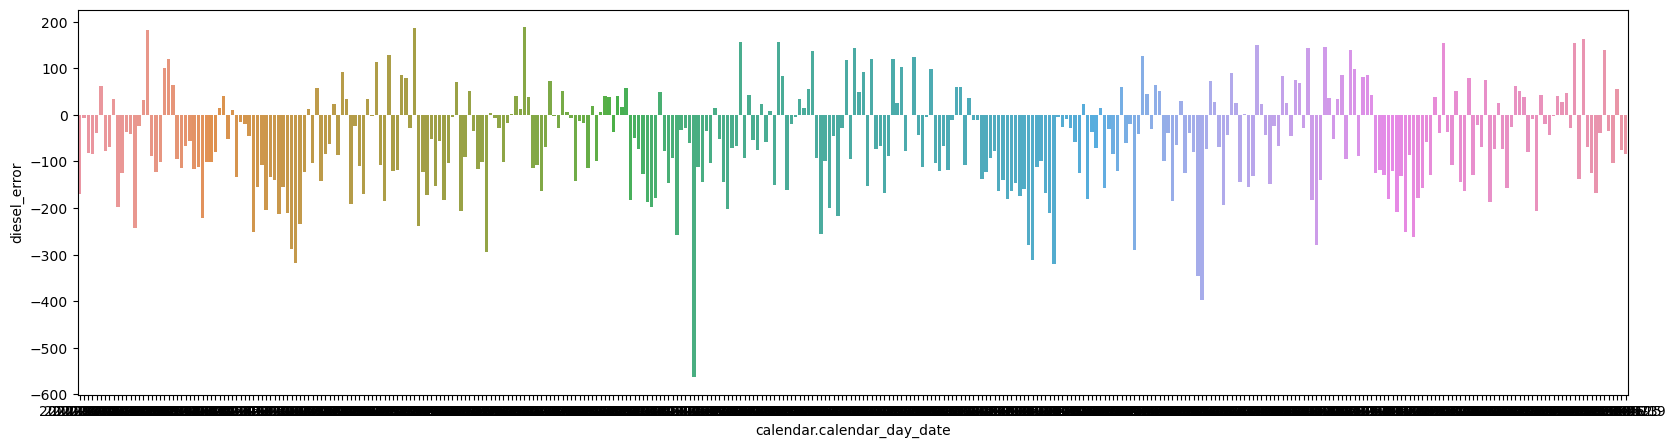

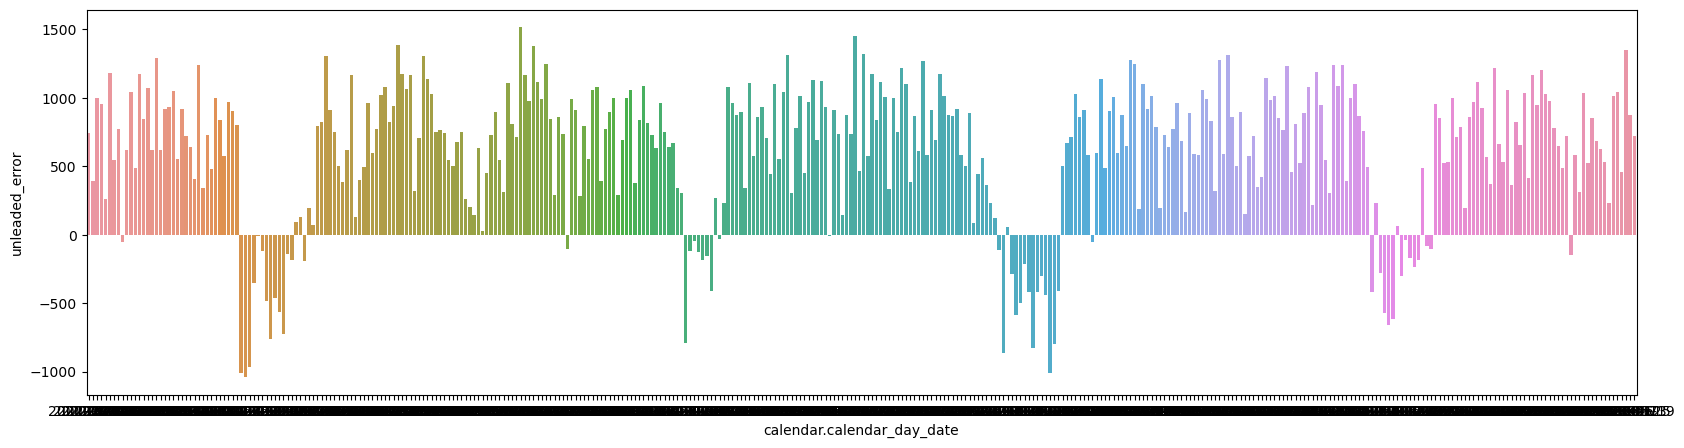

In [409]:
preds_22925 = TestStorePredict(22925)
plot_annual_performance(preds_22925)

Performance Report for Store # 22680
Daily Performance
Inside Sales
RMSE:  680.8305023237377
MSE:  463530.1728943931
MAE:  546.3827288384776
MAPE:  0.21484436551812766

Food Service
RMSE:  154.07741180730594
MSE:  23739.848829238137
MAE:  136.98486866935355
MAPE:  0.2526662567043752

Diesel
RMSE:  82.45139966912183
MSE:  6798.233307397263
MAE:  64.43283716363464
MAPE:  0.5817537854511591

Unleaded
RMSE:  1449.0761581092722
MSE:  2099821.7120007286
MAE:  1395.5433677905141
MAPE:  1.5048656710801436

Annual Performance
Annual Cumulative Error(Inside Sales):  -168704.0725029297
Annual Cumulative Error % (Inside Sales):  -19.067213744408328
Annual Cumulative Error(Food Service):  -49251.748967651365
Annual Cumulative Error % (Food Service):  -25.18151834712878
Annual Cumulative Error(Diesel Sales):  -1864.9571697125434
Annual Cumulative Error % (Diesel Sales):  -3.613313542471642
Annual Cumulative Error(Unleaded Sales):  510768.87261132814
Annual Cumulative Error % (Unleaded Sales):  144.1

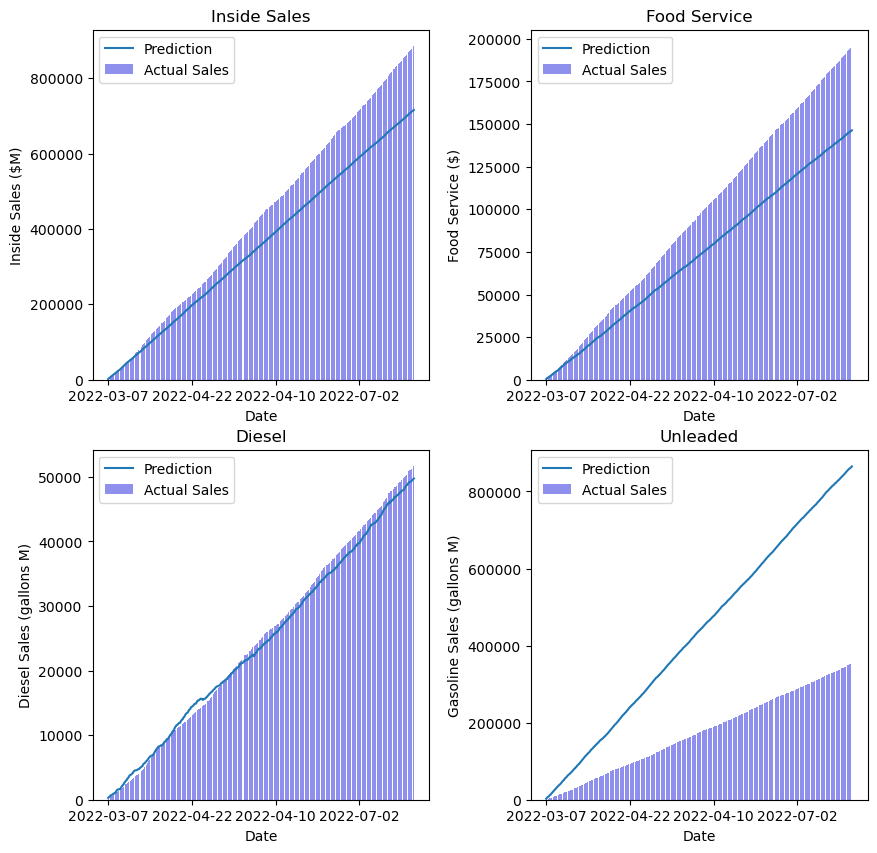

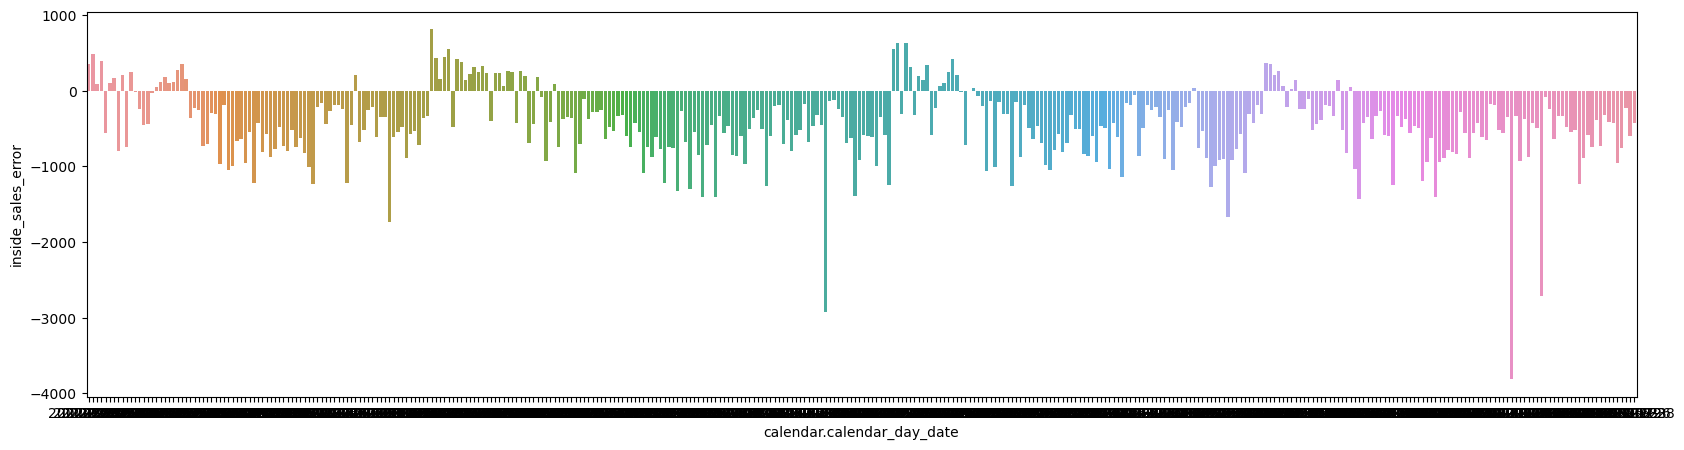

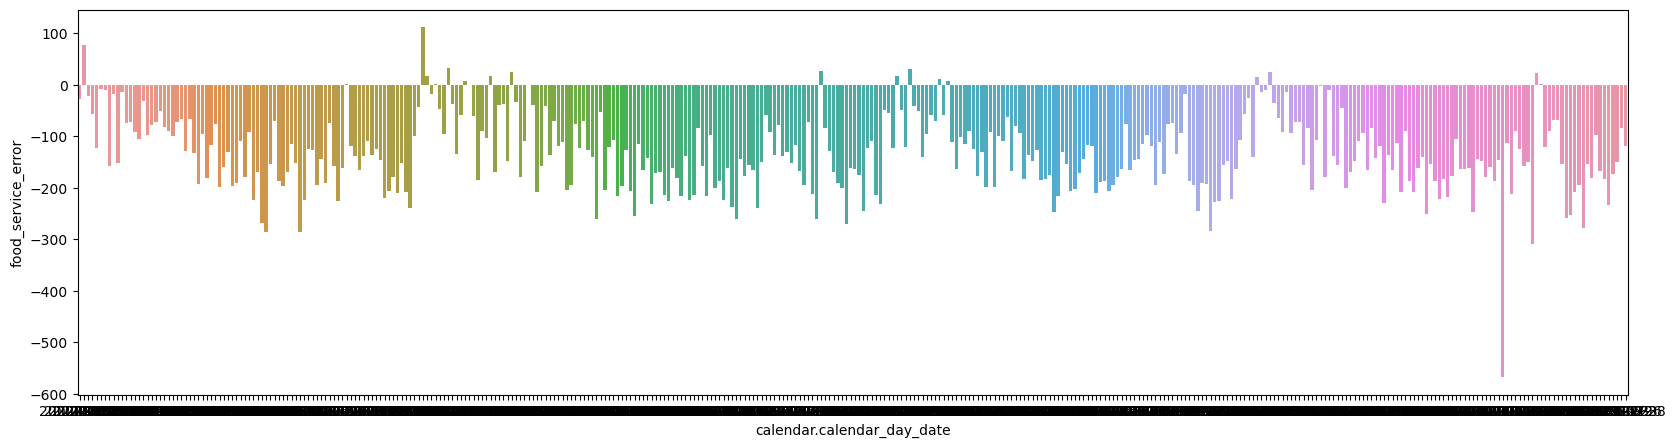

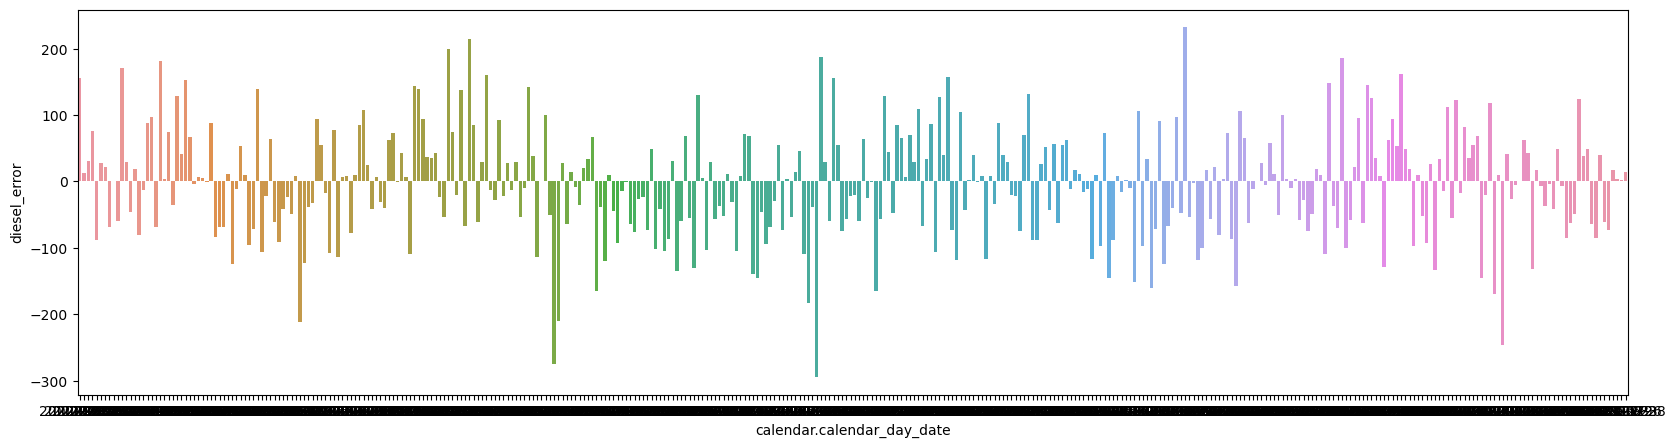

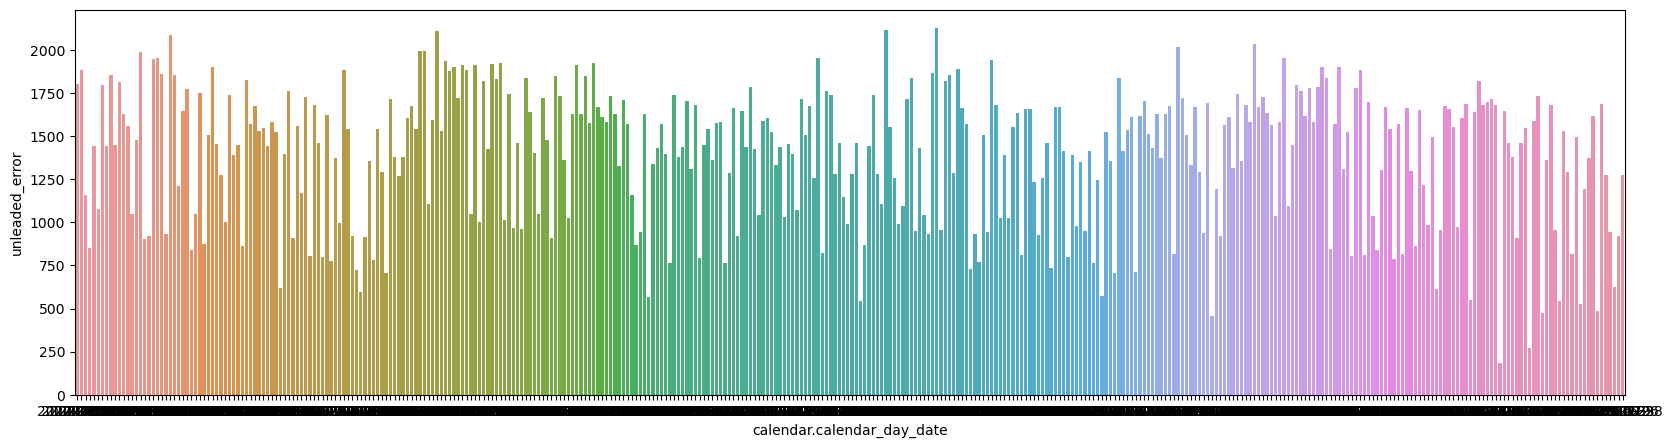

In [410]:
preds_22680 = TestStorePredict(22680)
plot_annual_performance(preds_22680)

Performance Report for Store # 23415
Daily Performance
Inside Sales
RMSE:  994.6910473788854
MSE:  989410.2797357041
MAE:  900.3205459277877
MAPE:  0.31309796278288254

Food Service
RMSE:  380.4301767096114
MSE:  144727.11935130612
MAE:  322.89297489687397
MAPE:  0.33049475772682474

Diesel
RMSE:  1262.5194332979097
MSE:  1593955.319454875
MAE:  1039.7583825583536
MAPE:  0.5855797359397479

Unleaded
RMSE:  423.6473336365914
MSE:  179477.06329739338
MAE:  342.95660250304167
MAPE:  0.28409394288232787

Annual Performance
Annual Cumulative Error(Inside Sales):  -149796.96868261715
Annual Cumulative Error % (Inside Sales):  -10.890930636569454
Annual Cumulative Error(Food Service):  -85518.05175610351
Annual Cumulative Error % (Food Service):  -19.930808699672127
Annual Cumulative Error(Diesel Sales):  369777.09163891594
Annual Cumulative Error % (Diesel Sales):  40.83188230995501
Annual Cumulative Error(Unleaded Sales):  61643.376368652345
Annual Cumulative Error % (Unleaded Sales):  9.69

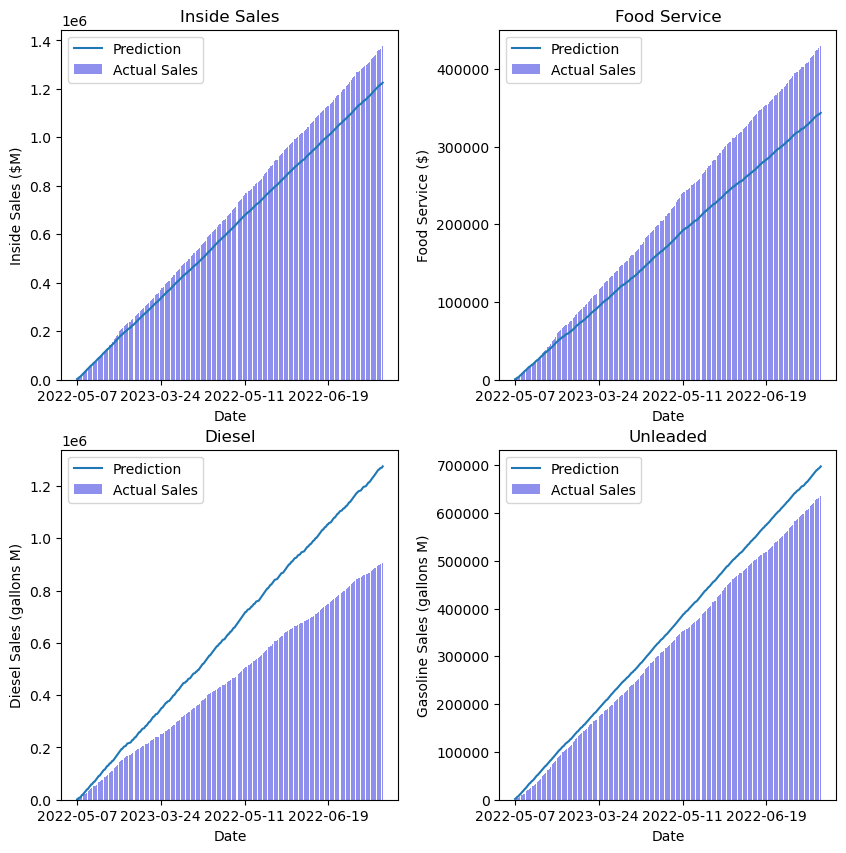

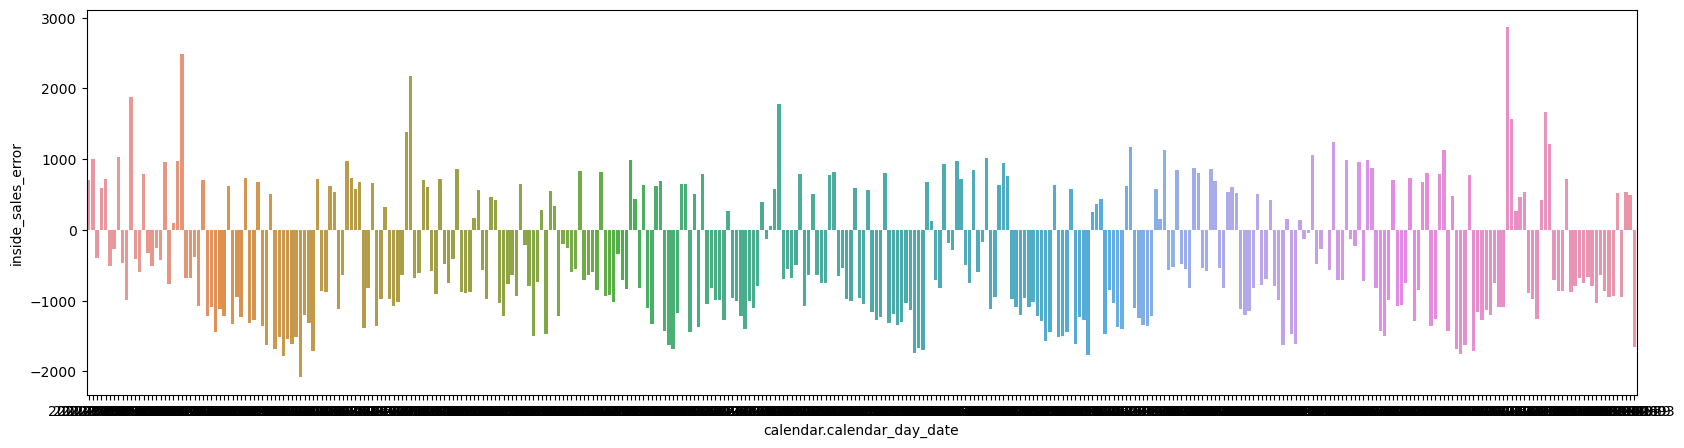

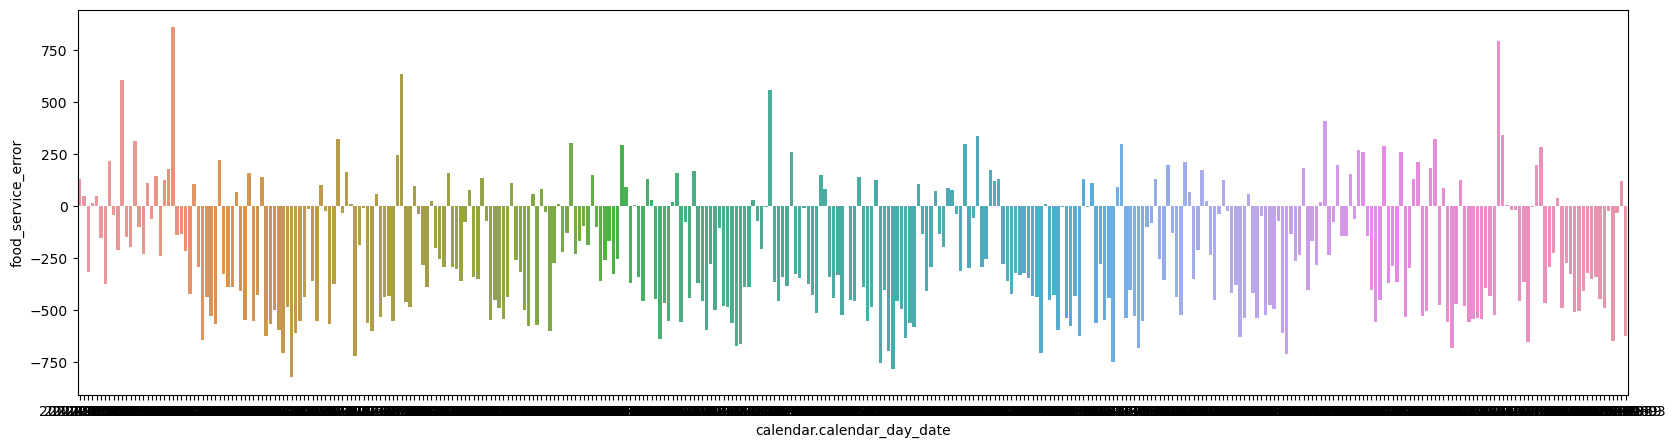

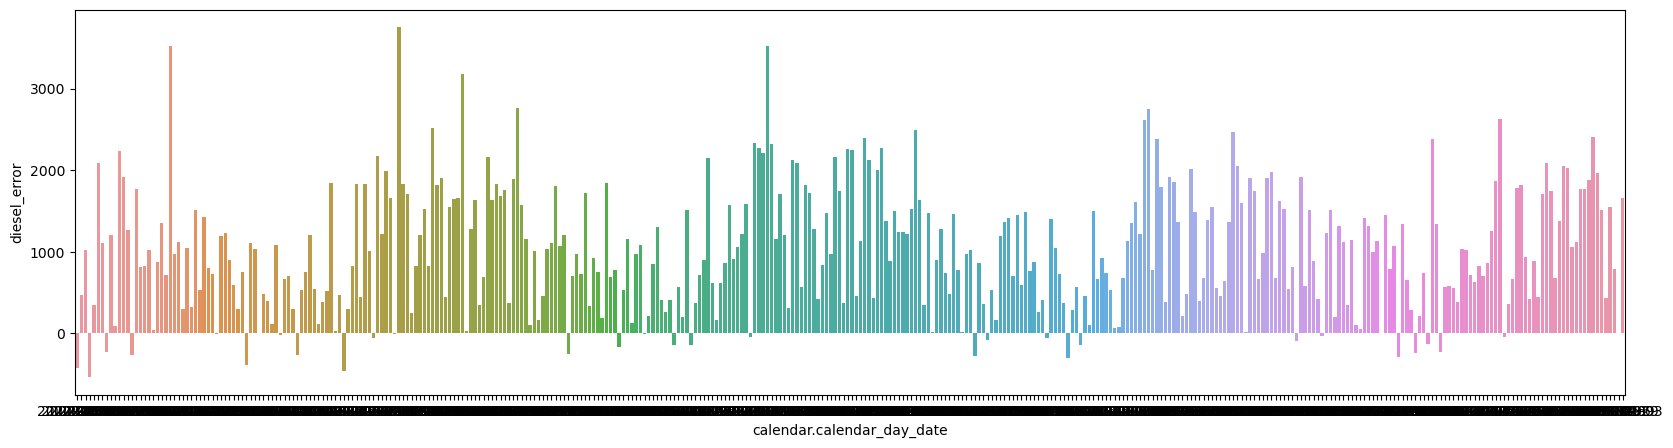

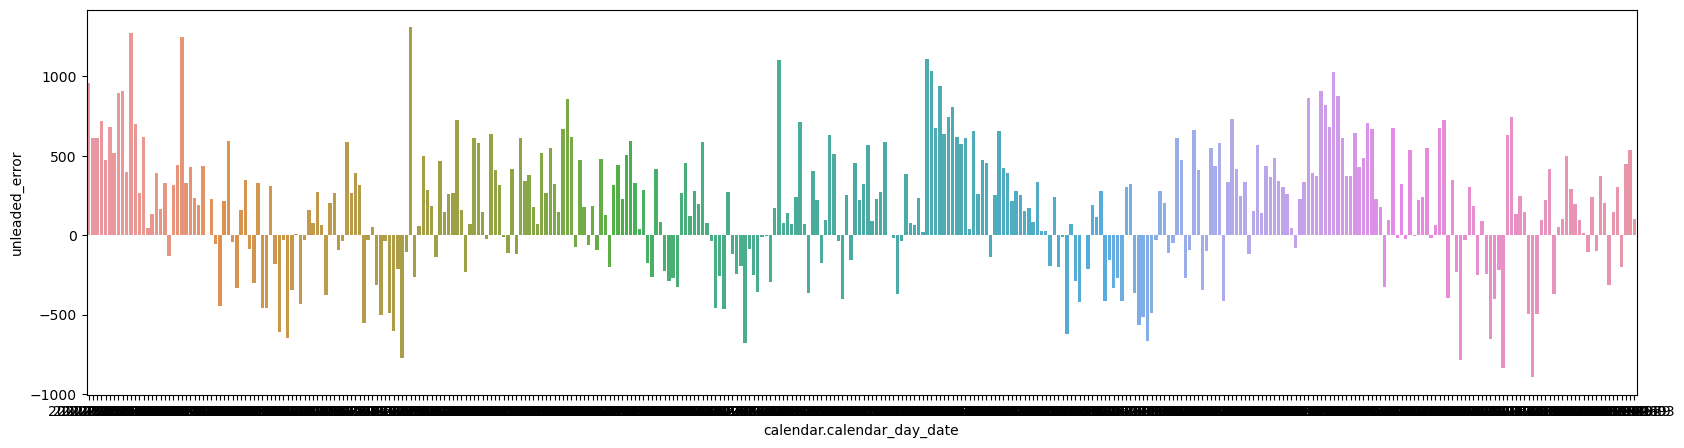

In [411]:
preds_23415 = TestStorePredict(23415)
plot_annual_performance(preds_23415)

Performance Report for Store # 22785
Daily Performance
Inside Sales
RMSE:  533.1705993125723
MSE:  284270.8879713275
MAE:  432.35276476850663
MAPE:  0.16510442776913167

Food Service
RMSE:  208.53695010002576
MSE:  43487.65955702064
MAE:  166.19742354396132
MAPE:  0.2028987917363339

Diesel
RMSE:  1545.4500163874802
MSE:  2388415.753152063
MAE:  1337.9514917979425
MAPE:  0.5382420784615374

Unleaded
RMSE:  579.3846654609007
MSE:  335686.59057123977
MAE:  493.58304037525613
MAPE:  0.23644376669105616

Annual Performance
Annual Cumulative Error(Inside Sales):  15538.835551757813
Annual Cumulative Error % (Inside Sales):  1.5402767808988564
Annual Cumulative Error(Food Service):  -48898.635000488284
Annual Cumulative Error % (Food Service):  -15.84102984978557
Annual Cumulative Error(Diesel Sales):  379027.59722460934
Annual Cumulative Error % (Diesel Sales):  38.7819783722617
Annual Cumulative Error(Unleaded Sales):  12097.370277343749
Annual Cumulative Error % (Unleaded Sales):  1.52810

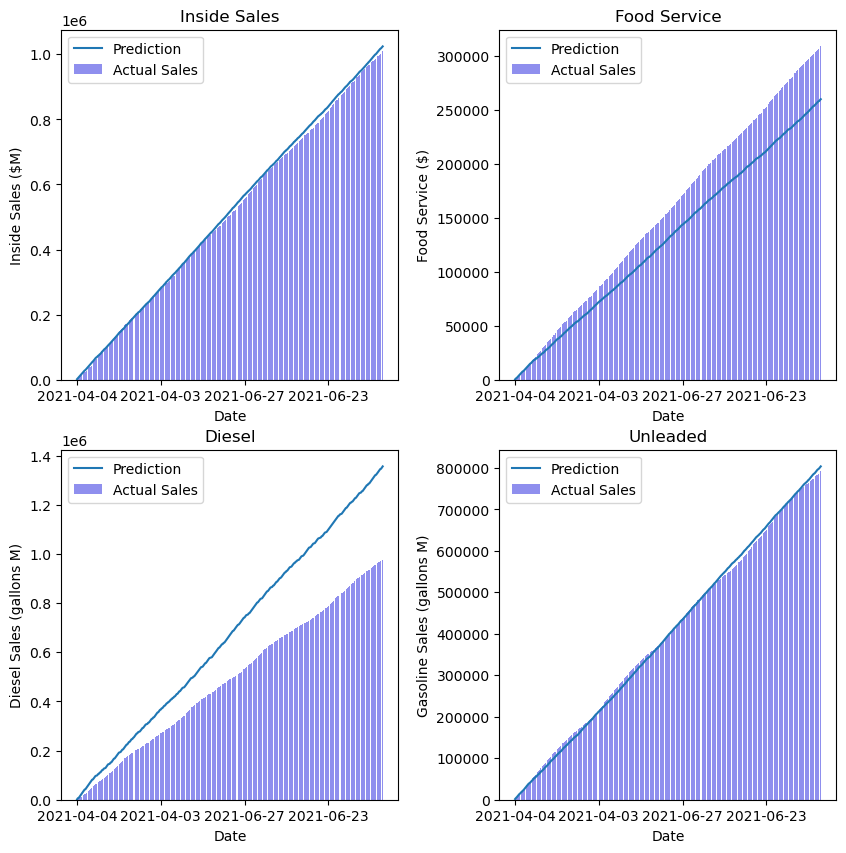

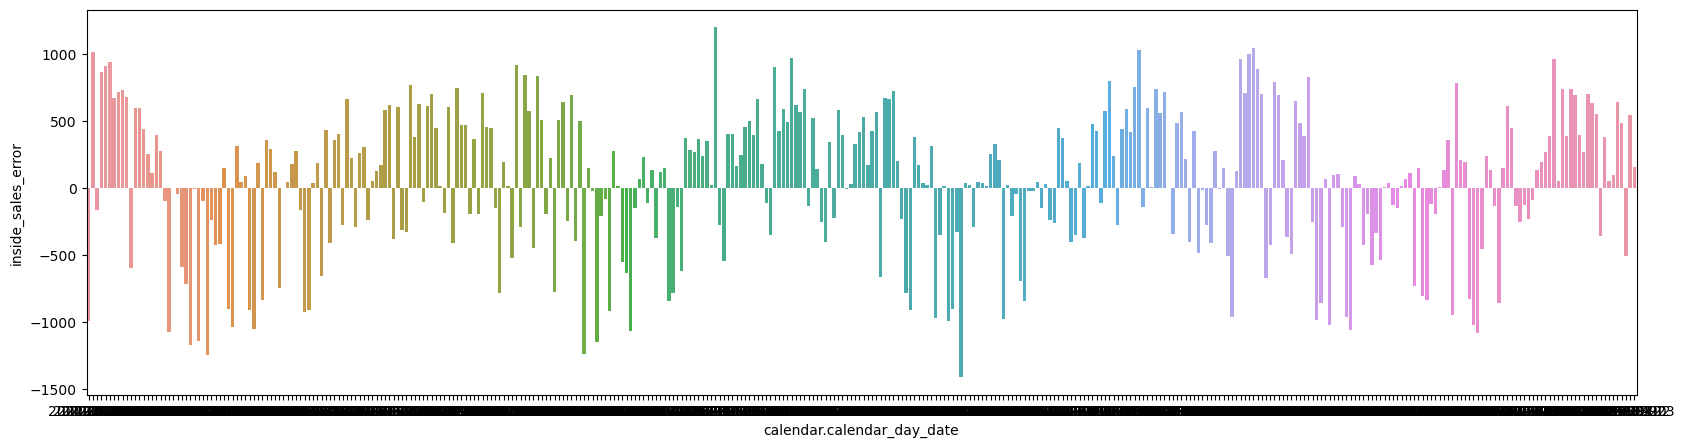

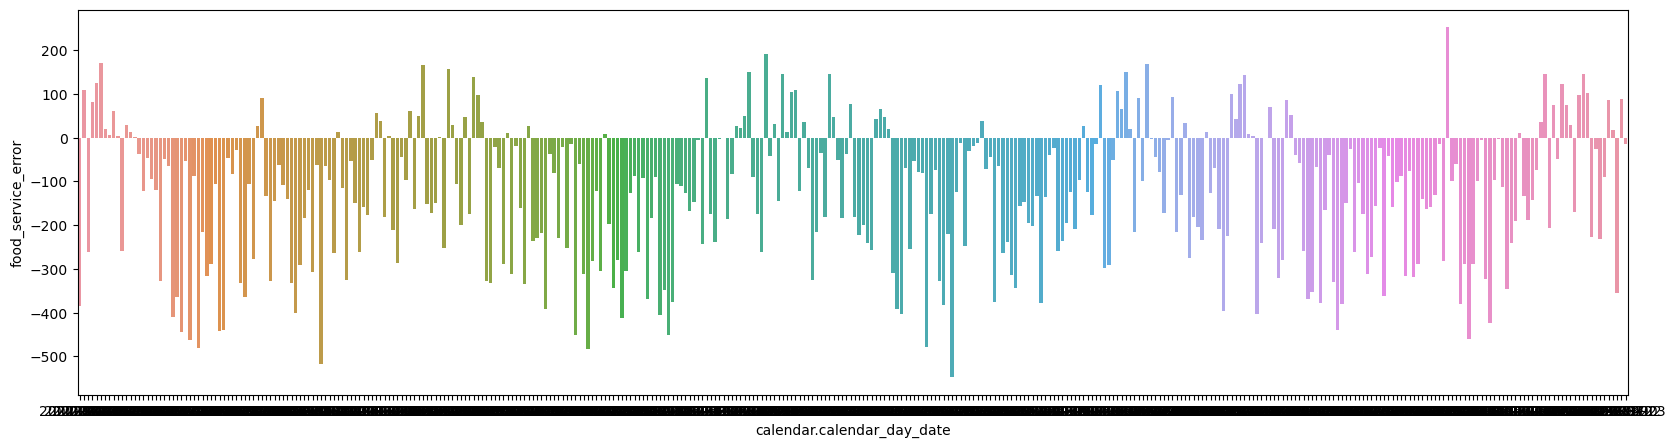

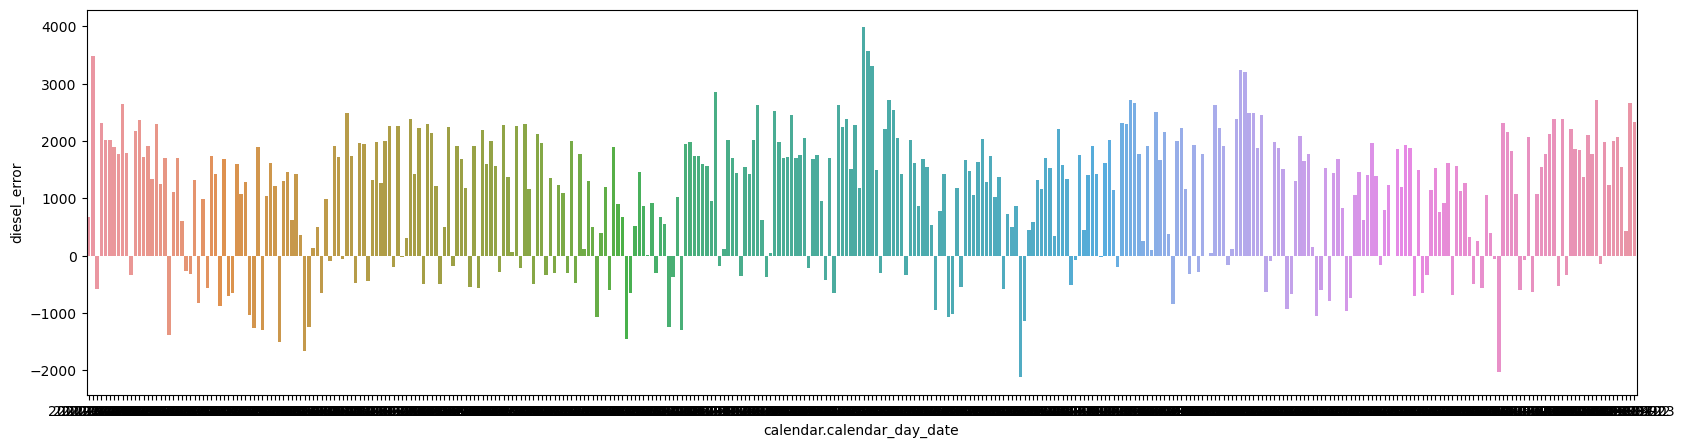

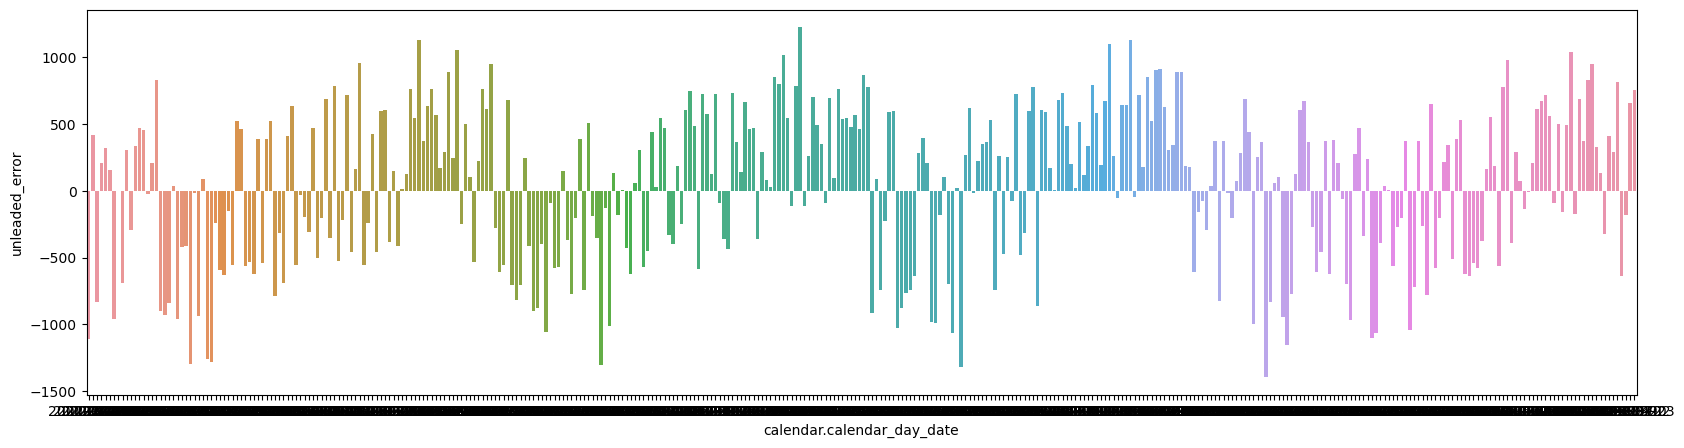

In [412]:
preds_22785 = TestStorePredict(22785)
plot_annual_performance(preds_22785)

Performance Report for Store # 23380
Daily Performance
Inside Sales
RMSE:  938.1597711204754
MSE:  880143.7561488228
MAE:  739.6520646985997
MAPE:  0.22784375742045532

Food Service
RMSE:  375.757290308831
MSE:  141193.54122023509
MAE:  298.43824785009497
MAPE:  0.29489026169396254

Diesel
RMSE:  2113.338483016606
MSE:  4466199.543798929
MAE:  1833.265889250875
MAPE:  1.0925605361637414

Unleaded
RMSE:  1101.7133555719813
MSE:  1213772.3178456752
MAE:  871.8990073749146
MAPE:  0.285784740144147

Annual Performance
Annual Cumulative Error(Inside Sales):  -101490.26294140624
Annual Cumulative Error % (Inside Sales):  -8.564450789208761
Annual Cumulative Error(Food Service):  -93251.96031762694
Annual Cumulative Error % (Food Service):  -26.12080496702196
Annual Cumulative Error(Diesel Sales):  532206.8390927734
Annual Cumulative Error % (Diesel Sales):  68.54256954450354
Annual Cumulative Error(Unleaded Sales):  -256326.4333671875
Annual Cumulative Error % (Unleaded Sales):  -24.17883424

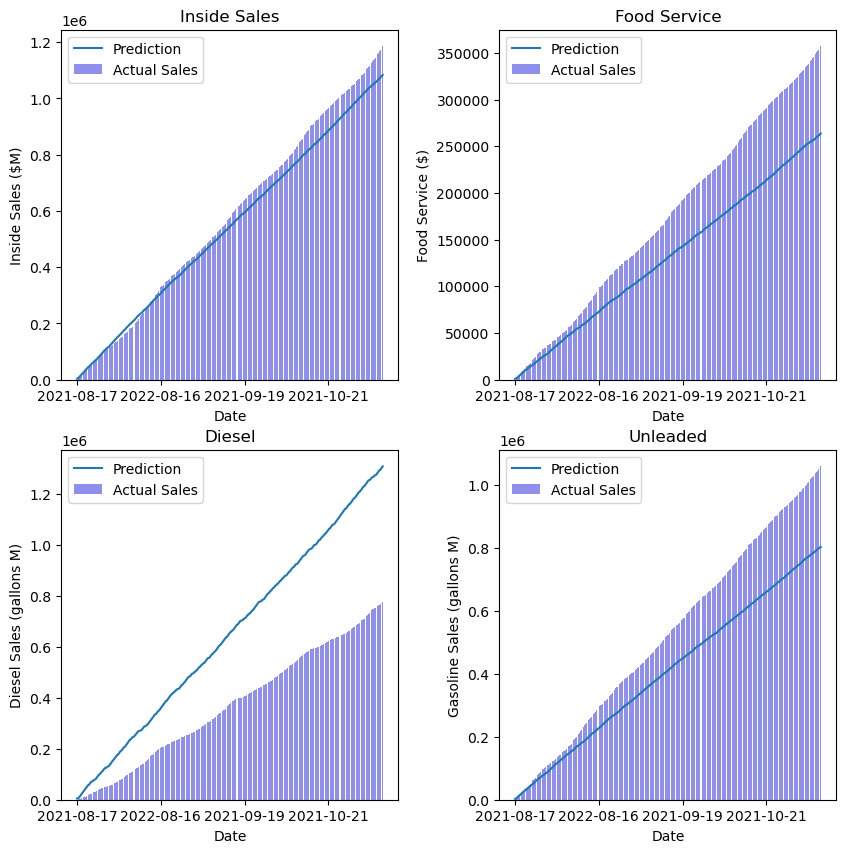

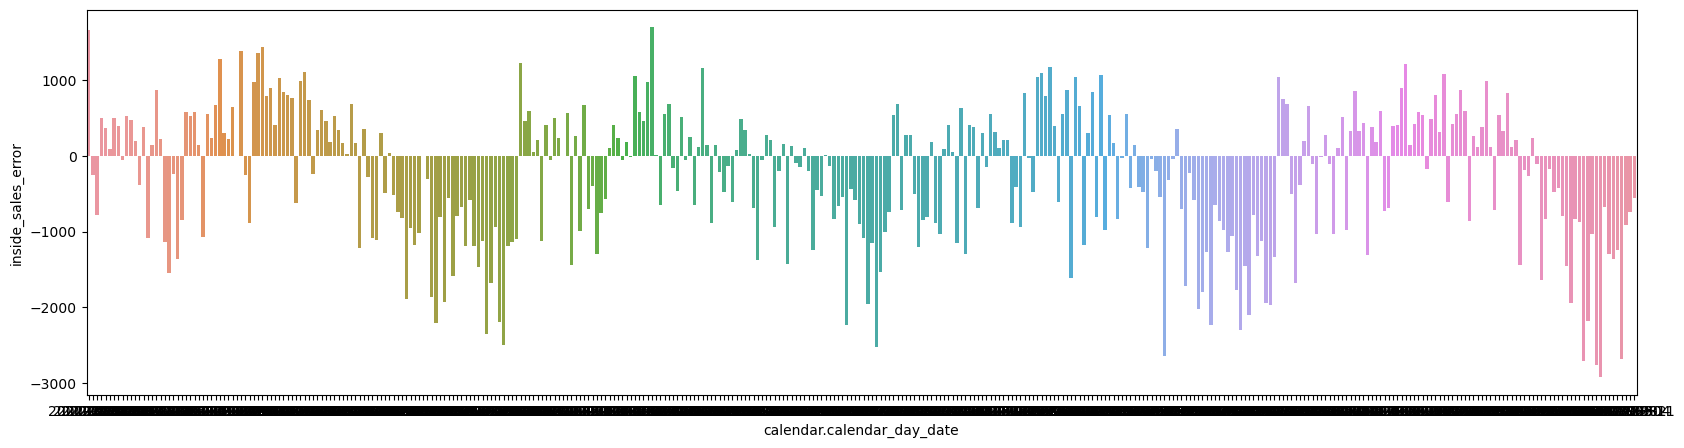

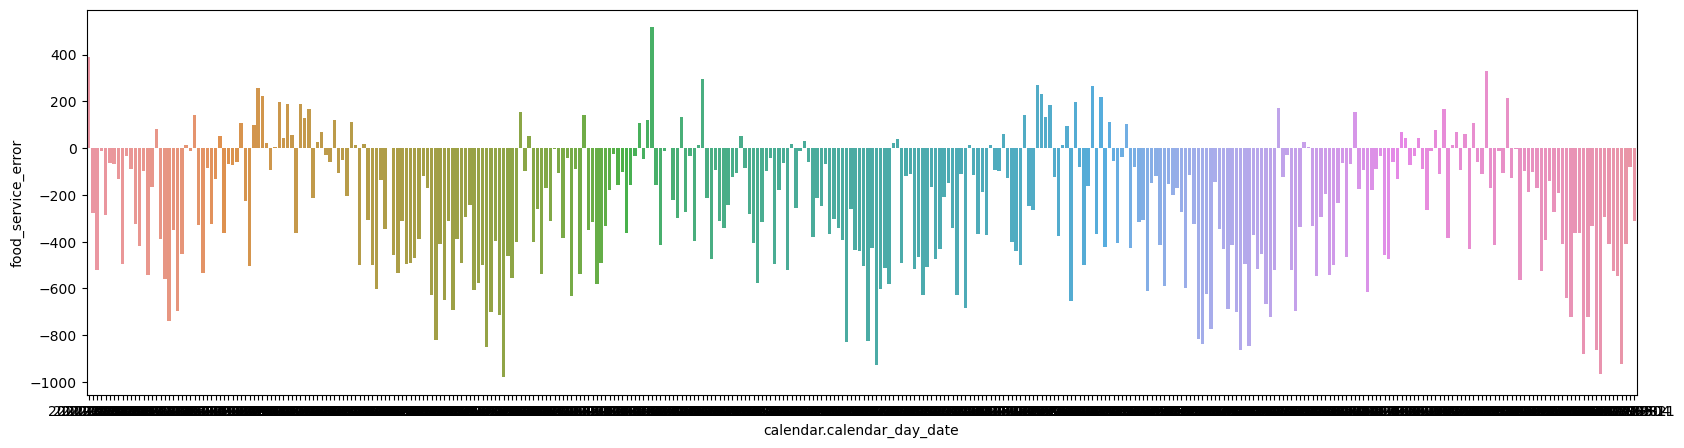

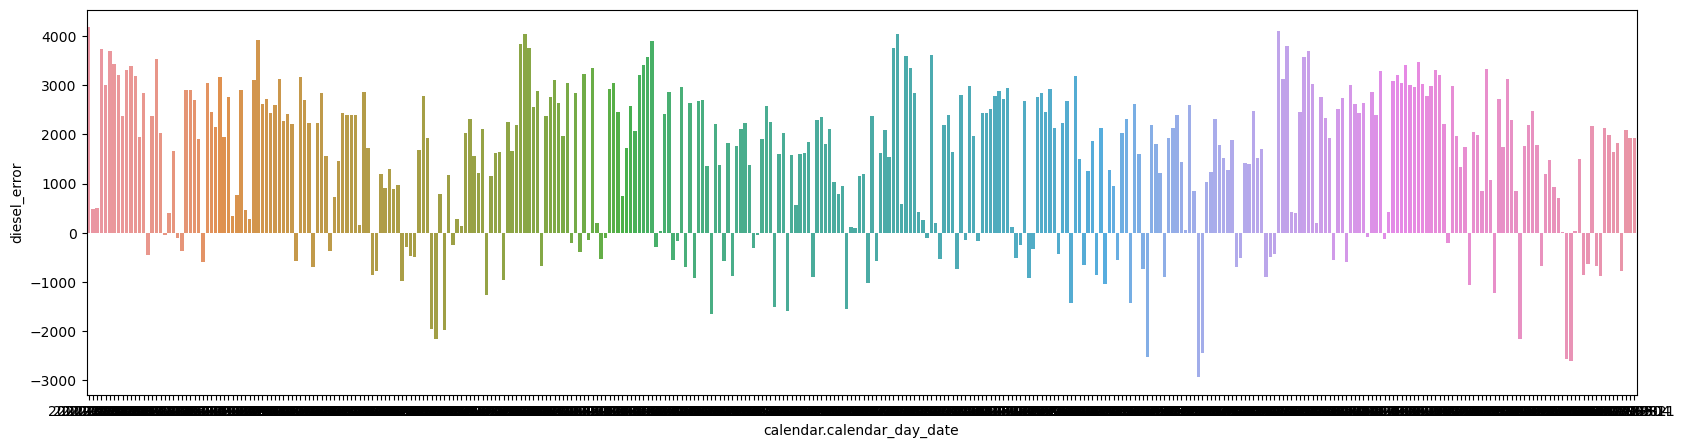

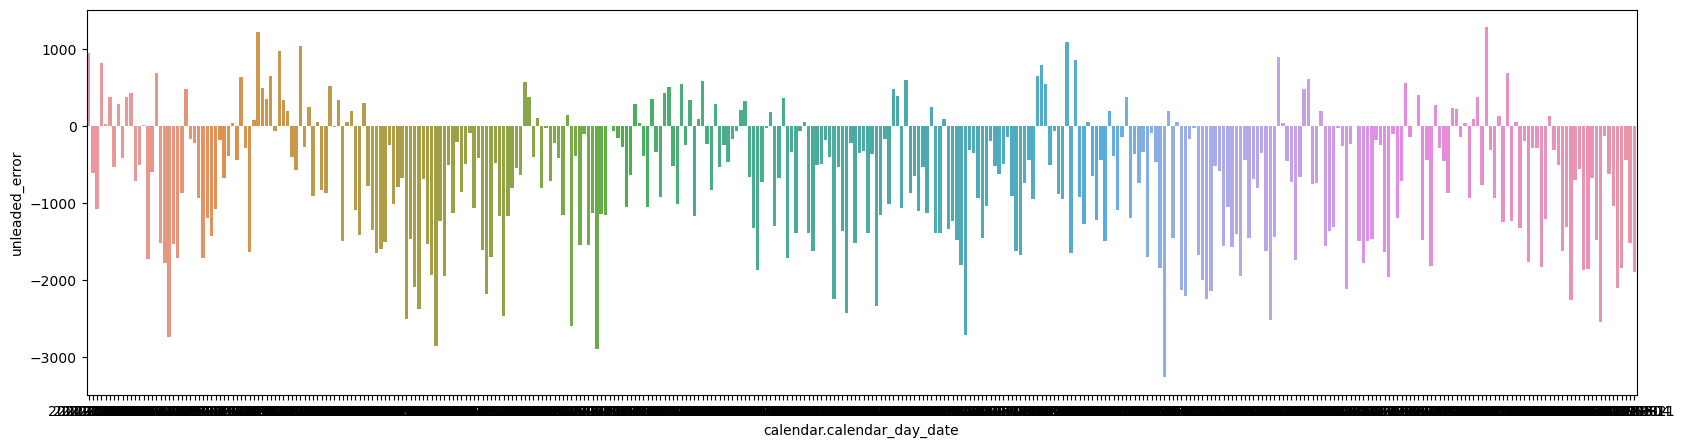

In [413]:
preds_23380 = TestStorePredict(23380)
plot_annual_performance(preds_23380)

In [415]:
preds_test = pd.concat([preds_22925, preds_22680, preds_23415, preds_22785, preds_23380], axis=0)

In [416]:
y=preds_test
print('Daily Performance')
# Inside Sales
print('Inside Sales')
print('RMSE: ',mean_squared_error(y['inside_sales'], y['inside_sales_pred'], squared=False))
print('MSE: ',mean_squared_error(y['inside_sales'], y['inside_sales_pred']))
print('MAE: ',mean_absolute_error(y['inside_sales'], y['inside_sales_pred']))
print('MAPE: ',mean_absolute_percentage_error(y['inside_sales'], y['inside_sales_pred']))
print()

# Food Service
print('Food Service')
print('RMSE: ',mean_squared_error(y['food_service'], y['food_service_pred'], squared=False))
print('MSE: ',mean_squared_error(y['food_service'], y['food_service_pred']))
print('MAE: ',mean_absolute_error(y['food_service'], y['food_service_pred']))
print('MAPE: ',mean_absolute_percentage_error(y['food_service'], y['food_service_pred']))
print()

# Diesel
print('Diesel')
print('RMSE: ',mean_squared_error(y['diesel_x'], y['diesel_pred'], squared=False))
print('MSE: ',mean_squared_error(y['diesel_x'], y['diesel_pred']))
print('MAE: ',mean_absolute_error(y['diesel_x'], y['diesel_pred']))
print('MAPE: ',mean_absolute_percentage_error(y['diesel_x'], y['diesel_pred']))
print()

# Unleaded
print('Unleaded')
print('RMSE: ',mean_squared_error(y['unleaded'], y['unleaded_pred'], squared=False))
print('MSE: ',mean_squared_error(y['unleaded'], y['unleaded_pred']))
print('MAE: ',mean_absolute_error(y['unleaded'], y['unleaded_pred']))
print('MAPE: ',mean_absolute_percentage_error(y['unleaded'], y['unleaded_pred']))
print()

print('Annual Performance')
print('Annual Cumulative Error(Inside Sales): '  , y['inside_sales_error'].sum())
print('Annual Average Store Error(Inside Sales): '  , y['inside_sales_error'].sum() / 5)
print('Annual Cumulative Error % (Inside Sales): '  , (y['inside_sales_error'].sum() / y['inside_sales'].sum()) * 100)
print('Annual Cumulative Error(Food Service): '  , y['food_service_error'].sum())
print('Annual Average Store Error(Food Service): '  , y['food_service_error'].sum() / 5)
print('Annual Cumulative Error % (Food Service): '  , (y['food_service_error'].sum() / y['food_service'].sum()) * 100)
print('Annual Cumulative Error(Diesel Sales): '  , y['diesel_error'].sum())
print('Annual Average Store Error(Diesel Sales): '  , y['diesel_error'].sum() / 5)
print('Annual Cumulative Error % (Diesel Sales): '  , (y['diesel_error'].sum() / y['diesel_x'].sum()) * 100)
print('Annual Cumulative Error(Unleaded Sales): ', y['unleaded_error'].sum())
print('Annual Average Store Error(Unleaded Sales): ', y['unleaded_error'].sum() / 5)
print('Annual Cumulative Error % (Unleaded Sales): '  , (y['unleaded_error'].sum() / y['unleaded'].sum()) * 100)

Daily Performance
Inside Sales
RMSE:  826.3047154339354
MSE:  682779.4827483569
MAE:  688.2720073290214
MAPE:  0.24152641306764783

Food Service
RMSE:  281.5673159940933
MSE:  79280.15343611759
MAE:  222.9008971752396
MAPE:  0.27962060762964813

Diesel
RMSE:  1301.5709196193388
MSE:  1694086.8587987311
MAE:  874.6594399338554
MAPE:  0.6625509952079978

Unleaded
RMSE:  942.4635432296886
MSE:  888237.5303170593
MAE:  761.6009931195035
MAPE:  0.5471886247586

Annual Performance
Annual Cumulative Error(Inside Sales):  -702343.8356367187
Annual Average Store Error(Inside Sales):  -140468.76712734374
Annual Cumulative Error % (Inside Sales):  -12.794895962405011
Annual Cumulative Error(Food Service):  -346166.6509571533
Annual Average Store Error(Food Service):  -69233.33019143066
Annual Cumulative Error % (Food Service):  -22.97485877519781
Annual Cumulative Error(Diesel Sales):  1258033.9495716798
Annual Average Store Error(Diesel Sales):  251606.78991433597
Annual Cumulative Error % (Dies

[Text(0, 0, 'Inside Sales'),
 Text(1, 0, 'Food Service'),
 Text(2, 0, 'Diesel'),
 Text(3, 0, 'Unleaded')]

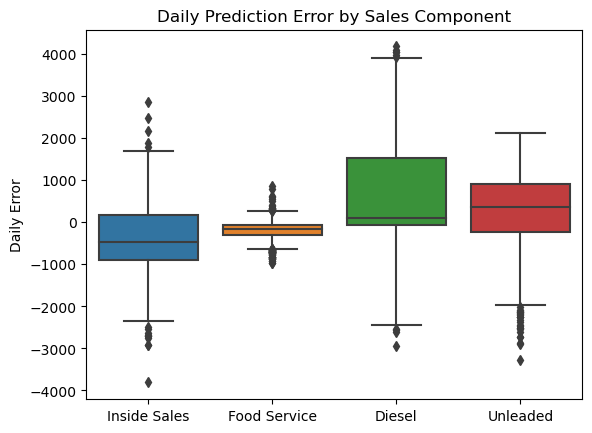

In [272]:
ax = sns.boxplot(data = preds_test[['inside_sales_error', 'food_service_error','diesel_error','unleaded_error']])
ax.set(ylabel = 'Daily Error',
       title = 'Daily Prediction Error by Sales Component'
)

ax.set_xticklabels(['Inside Sales', 'Food Service', 'Diesel', 'Unleaded'])

In [254]:
type(inside_sales_error)

pandas.core.series.Series

In [46]:
amalgam = pd.concat([preds_23380.inside_sales[:30], preds_23380.inside_sales_pred[30:180], preds_23380.inside_sales[180:]], axis=0)
amalgam = pd.concat([preds_23380['calendar.calendar_day_date'], amalgam], axis=1)

In [47]:
train = amalgam[:180]
val = amalgam[180:]

In [48]:
train.dtypes

calendar.calendar_day_date     object
0                             float64
dtype: object

In [49]:
is_ts

ds          y
6403 2021-06-22  1442.9975
6324 2021-06-23  1772.3475
6490 2021-06-24  1827.1750
6491 2021-06-25  2240.4130
6222 2021-06-26  2308.2325
...         ...        ...
6401 2022-06-18  3479.9030
6587 2022-06-19  2807.7070
6489 2022-06-20  3164.6405
6402 2022-06-21  3313.1175
6323 2022-06-22  3250.2785

[366 rows x 2 columns]

In [205]:
def prophet_duration2(seed, num_days, num_days_data):
    results = {}
    results['num_days_actual'] = num_days
    results['tot_num_days_data'] = num_days_data
    # Split data into train and val based on num_days_data
    train = seed.iloc[:num_days_data]
    val = seed.iloc[num_days_data:]
    # Fit model
    model = Prophet()
    model.fit(train)
    # Predict next 30 days
    preds = model.predict(val)
    results['RMSE_7'] = mean_squared_error(val['y'][:7], preds['yhat'][:7], squared=False)
    results['MAE_7'] = mean_absolute_error(val['y'][:7], preds['yhat'][:7])
    results['MAPE_7'] = mean_absolute_percentage_error(val['y'][:7], preds['yhat'][:7])
    results['RMSE_14'] = mean_squared_error(val['y'][:14], preds['yhat'][:14], squared=False)
    results['MAE_14'] = mean_absolute_error(val['y'][:14], preds['yhat'][:14])
    results['MAPE_14'] = mean_absolute_percentage_error(val['y'][:14], preds['yhat'][:14])
    results['RMSE_30'] = mean_squared_error(val['y'][:30], preds['yhat'][:30], squared=False)
    results['MAE_30'] = mean_absolute_error(val['y'][:30], preds['yhat'][:30])
    results['MAPE_30'] = mean_absolute_percentage_error(val['y'][:30], preds['yhat'][:30])
    results['RMSE_YE'] = mean_squared_error(val['y'], preds['yhat'], squared=False)
    results['MAE_YE'] = mean_absolute_error(val['y'], preds['yhat'])
    results['MAPE_YE'] = mean_absolute_percentage_error(val['y'], preds['yhat'])
        
    return results

In [279]:
def forecastOnPreds(pred_df, num_days, end_preds=170):
    '''
    Inputs:
    pred_df = dataframe containing predicted sales data from the xgboost model from TestStorePredict()
    num_days = number of days of actual sales data to use in time series modelling
    end_preds = number of days to end use of predicted values in time series modelling
    
    Intermediates:
    *_ts = actual sales data converted into time series format
    
    seed_* = a mixture of actual sales data for the first num_days, 
            then predicted data for num_days+1:end_preds,
            then validation data from end_preds to the end of the dataset
    '''
    # Inside Sales
    is_ts = pred_df[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
    is_ts['ds'] = pd.to_datetime(is_ts['ds']) # Convert ds to datetime format
    y = pd.concat([is_ts.y[:num_days], # Days of actual data
                   pred_df.inside_sales_pred[num_days:end_preds], # Days of predicted data
                   is_ts.y[end_preds:]], # Validation Data
                   axis=0).reset_index(drop=True)
    ds = pred_df['calendar.calendar_day_date'].sort_values().reset_index(drop=True)
    seed_is = pd.concat([ds,y], axis=1).rename(columns={'calendar.calendar_day_date':'ds', 0:'y'})
    
    # Food Service
    fs_ts = pred_df[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
    fs_ts['ds'] = pd.to_datetime(fs_ts['ds']) # Convert ds to datetime format
    y = pd.concat([fs_ts.y[:num_days], # Days of actual data
                   pred_df.food_service_pred[num_days:end_preds], # Days of predicted data
                   fs_ts.y[end_preds:]], # Validation Data
                   axis=0).reset_index(drop=True)
    ds = pred_df['calendar.calendar_day_date'].sort_values().reset_index(drop=True)
    seed_fs = pd.concat([ds,y], axis=1).rename(columns={'calendar.calendar_day_date':'ds', 0:'y'})

    # Diesel
    d_ts = pred_df[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
    d_ts['ds'] = pd.to_datetime(d_ts['ds']) # Convert ds to datetime format
    y = pd.concat([d_ts.y[:num_days], # Days of actual data
                   pred_df.diesel_pred[num_days:end_preds], # Days of predicted data
                   d_ts.y[end_preds:]], # Validation Data
                   axis=0).reset_index(drop=True)
    ds = pred_df['calendar.calendar_day_date'].sort_values().reset_index(drop=True)
    seed_d = pd.concat([ds,y], axis=1).rename(columns={'calendar.calendar_day_date':'ds', 0:'y'})
    
    # Unleaded
    u_ts = pred_df[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
    u_ts['ds'] = pd.to_datetime(u_ts['ds']) # Convert ds to datetime format
    y = pd.concat([u_ts.y[:num_days], # Days of actual data
                   pred_df.unleaded_pred[num_days:end_preds], # Days of predicted data
                   u_ts.y[end_preds:]], # Validation Data
                   axis=0).reset_index(drop=True)
    ds = pred_df['calendar.calendar_day_date'].sort_values().reset_index(drop=True)
    seed_u = pd.concat([ds,y], axis=1).rename(columns={'calendar.calendar_day_date':'ds', 0:'y'})
    
    time_series = [seed_is, seed_fs, seed_d, seed_u]
    
    out_is = prophet_duration2(seed_is, num_days, end_preds)
    out_fs = prophet_duration2(seed_fs, num_days, end_preds)
    out_d = prophet_duration2(seed_d, num_days, end_preds)
    out_u = prophet_duration2(seed_u, num_days, end_preds)
    
    return out_is, out_fs, out_d, out_u

In [207]:
inside, fs, d, u = forecastOnPreds(preds_22925, 10,180)

09:11:22 - cmdstanpy - INFO - Chain [1] start processing
09:11:22 - cmdstanpy - INFO - Chain [1] done processing
09:11:22 - cmdstanpy - INFO - Chain [1] start processing
09:11:22 - cmdstanpy - INFO - Chain [1] done processing
09:11:22 - cmdstanpy - INFO - Chain [1] start processing
09:11:22 - cmdstanpy - INFO - Chain [1] done processing
09:11:22 - cmdstanpy - INFO - Chain [1] start processing
09:11:22 - cmdstanpy - INFO - Chain [1] done processing


In [211]:
results_is=[]
results_fs=[]
results_d=[]
results_u=[]

for i in range(20,170,5):
    inside, fs, d, u = forecastOnPreds(preds_22925, i , 180)
    results_is.append(inside)
    results_fs.append(fs)
    results_d.append(d)
    results_u.append(u)

09:17:31 - cmdstanpy - INFO - Chain [1] start processing
09:17:31 - cmdstanpy - INFO - Chain [1] done processing
09:17:31 - cmdstanpy - INFO - Chain [1] start processing
09:17:31 - cmdstanpy - INFO - Chain [1] done processing
09:17:31 - cmdstanpy - INFO - Chain [1] start processing
09:17:31 - cmdstanpy - INFO - Chain [1] done processing
09:17:32 - cmdstanpy - INFO - Chain [1] start processing
09:17:32 - cmdstanpy - INFO - Chain [1] done processing
09:17:32 - cmdstanpy - INFO - Chain [1] start processing
09:17:32 - cmdstanpy - INFO - Chain [1] done processing
09:17:32 - cmdstanpy - INFO - Chain [1] start processing
09:17:32 - cmdstanpy - INFO - Chain [1] done processing
09:17:32 - cmdstanpy - INFO - Chain [1] start processing
09:17:32 - cmdstanpy - INFO - Chain [1] done processing
09:17:32 - cmdstanpy - INFO - Chain [1] start processing
09:17:32 - cmdstanpy - INFO - Chain [1] done processing
09:17:32 - cmdstanpy - INFO - Chain [1] start processing
09:17:33 - cmdstanpy - INFO - Chain [1]

09:17:45 - cmdstanpy - INFO - Chain [1] done processing
09:17:45 - cmdstanpy - INFO - Chain [1] start processing
09:17:45 - cmdstanpy - INFO - Chain [1] done processing
09:17:45 - cmdstanpy - INFO - Chain [1] start processing
09:17:45 - cmdstanpy - INFO - Chain [1] done processing
09:17:45 - cmdstanpy - INFO - Chain [1] start processing
09:17:45 - cmdstanpy - INFO - Chain [1] done processing
09:17:45 - cmdstanpy - INFO - Chain [1] start processing
09:17:45 - cmdstanpy - INFO - Chain [1] done processing
09:17:45 - cmdstanpy - INFO - Chain [1] start processing
09:17:45 - cmdstanpy - INFO - Chain [1] done processing
09:17:46 - cmdstanpy - INFO - Chain [1] start processing
09:17:46 - cmdstanpy - INFO - Chain [1] done processing
09:17:46 - cmdstanpy - INFO - Chain [1] start processing
09:17:46 - cmdstanpy - INFO - Chain [1] done processing
09:17:46 - cmdstanpy - INFO - Chain [1] start processing
09:17:46 - cmdstanpy - INFO - Chain [1] done processing
09:17:46 - cmdstanpy - INFO - Chain [1] 

In [212]:
results_is = pd.DataFrame(results_is)
results_is = results_is[0].apply(pd.Series)
results_fs = pd.DataFrame(results_fs)
results_fs = results_fs[0].apply(pd.Series)
results_d = pd.DataFrame(results_d)
results_d = results_d[0].apply(pd.Series)
results_u = pd.DataFrame(results_u)
results_u = results_u[0].apply(pd.Series)

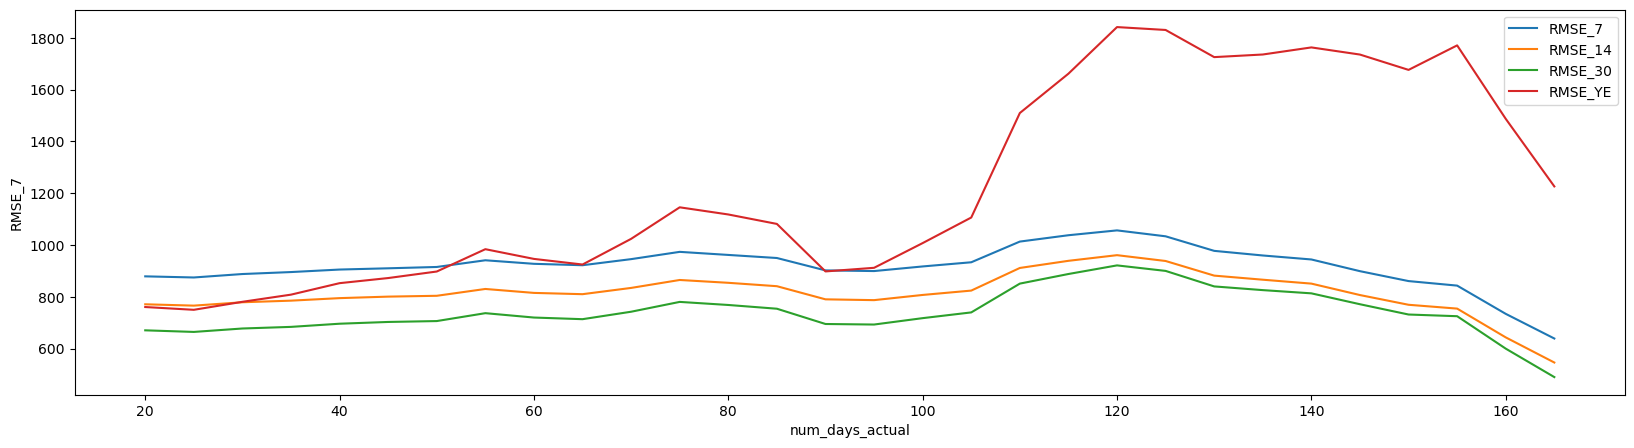

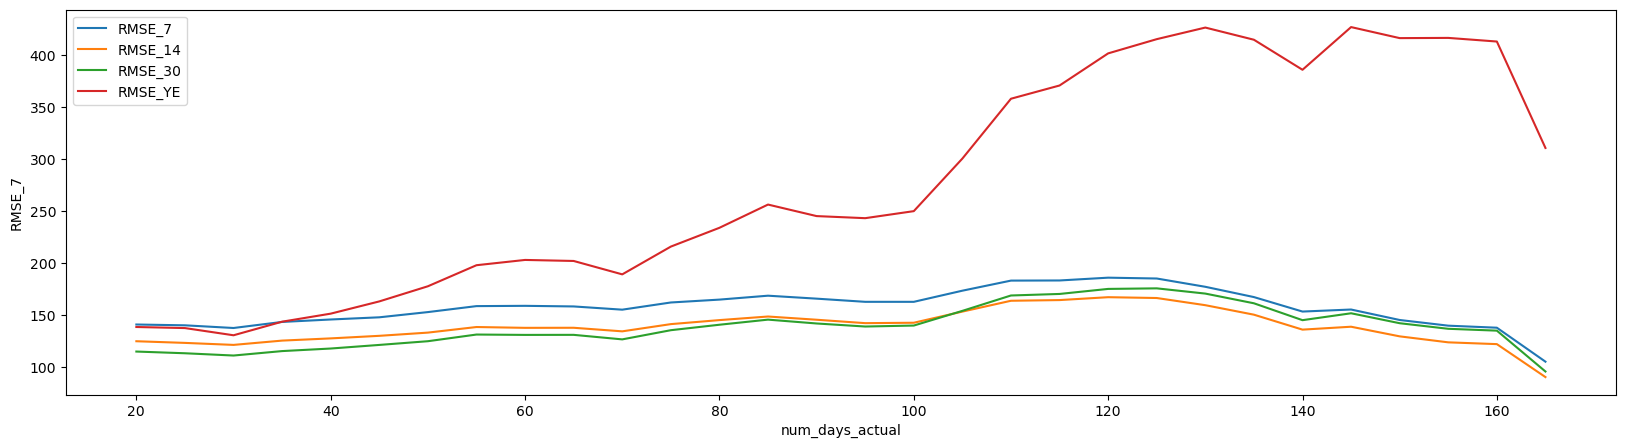

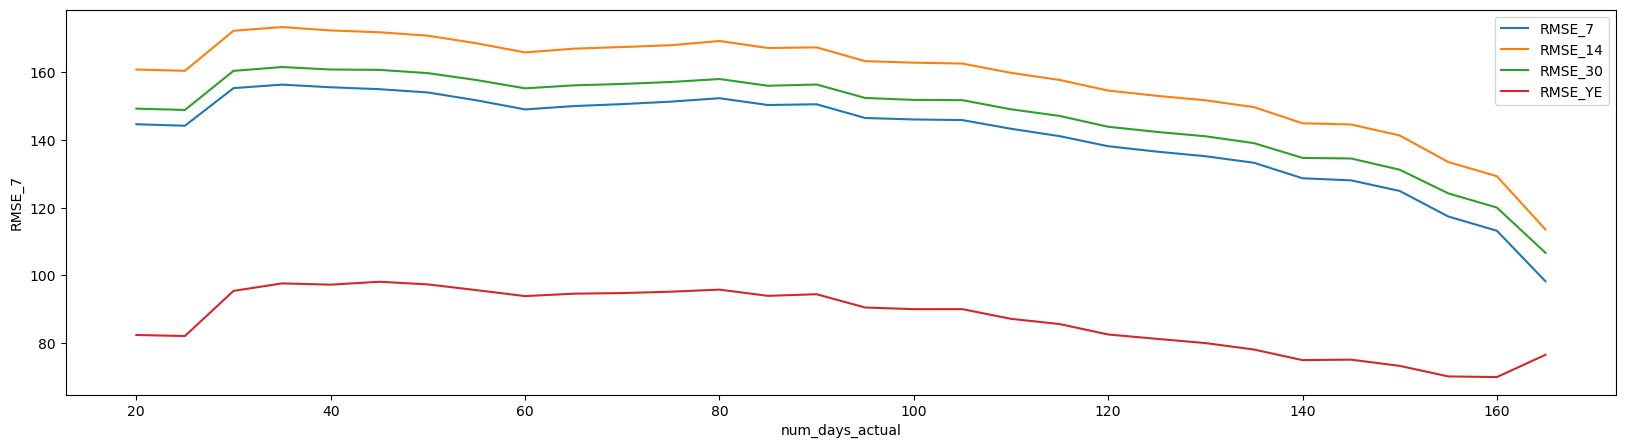

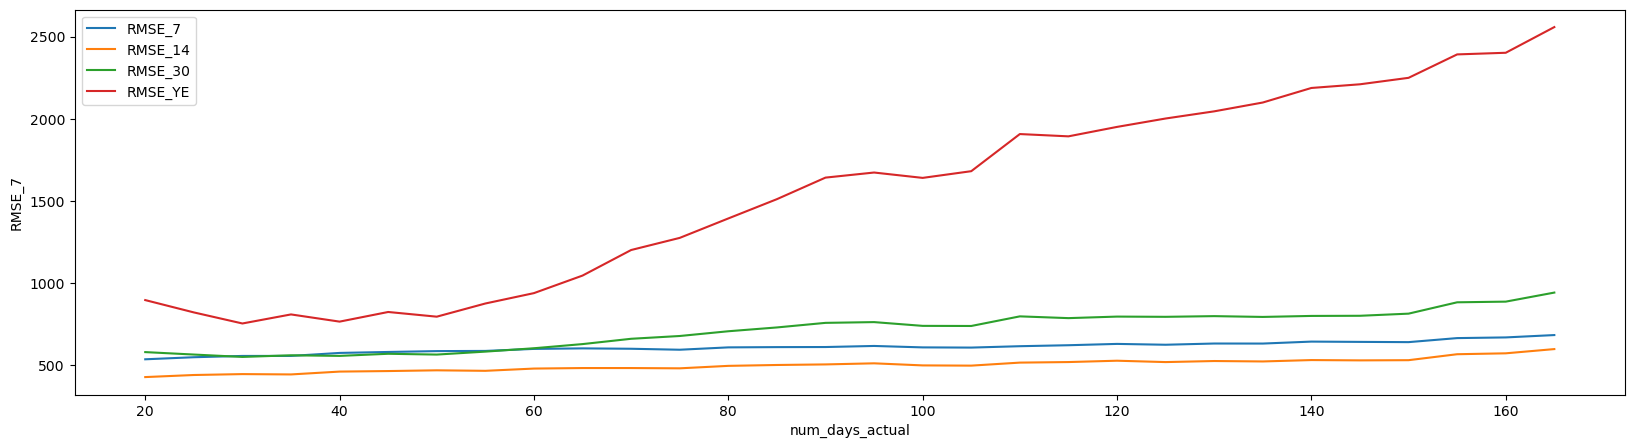

In [213]:
results = [results_is, results_fs, results_d, results_u]

for res in results:
    plt.subplots(figsize=(20, 5))
    sns.lineplot(data=res, 
                 x= 'num_days_actual', 
                 y= 'RMSE_7',
                 label= 'RMSE_7')
    sns.lineplot(data=res, 
                 x= 'num_days_actual', 
                 y= 'RMSE_14',
                 label= 'RMSE_14')
    sns.lineplot(data=res, 
                 x= 'num_days_actual', 
                 y= 'RMSE_30',
                 label= 'RMSE_30')
    sns.lineplot(data=res, 
                 x= 'num_days_actual', 
                 y= 'RMSE_YE',
                 label= 'RMSE_YE')
    
    plt.show()


In [367]:
pred_dict = {'22925':preds_22925, '22680':preds_22680, '23415':preds_23415, '22785':preds_22785, '23380':preds_23380}

for store, p in pred_dict.items():
    results_is=[]
    results_fs=[]
    results_d=[]
    results_u=[]

    for i in range(1,351,10):
        inside, fs, d, u = forecastOnPreds(p, i)
        results_is.append(inside)
        results_fs.append(fs)
        results_d.append(d)
        results_u.append(u)

    results_is = pd.DataFrame(results_is)
    results_is = results_is[0].apply(pd.Series)
    results_fs = pd.DataFrame(results_fs)
    results_fs = results_fs[0].apply(pd.Series)
    results_d = pd.DataFrame(results_d)
    results_d = results_d[0].apply(pd.Series)
    results_u = pd.DataFrame(results_u)
    results_u = results_u[0].apply(pd.Series)

    results = {'Inside Sales':results_is, 'Food Service':results_fs, 'Diesel':results_d, 'Unleaded':results_u}

    for key, res in results.items():
        plt.subplots(figsize=(20, 5))
        ax = sns.lineplot(data=res, 
                     x= 'num_days_actual', 
                     y= 'MAE_7',
                     label= 'MAE_7')
        ax = sns.lineplot(data=res, 
                     x= 'num_days_actual', 
                     y= 'MAE_14',
                     label= 'MAE_14')
        ax = sns.lineplot(data=res, 
                     x= 'num_days_actual', 
                     y= 'MAE_30',
                     label= 'MAE_30')
        ax = sns.lineplot(data=res, 
             x= 'num_days_actual', 
             y= 'MAE_YE',
             label= 'MAE_YE')
        ax.set(xlabel='Number of Days Actual Sales Data Provided',
        ylabel='Mean Absolute Error (MAE)',
        title= key + ' Performance (MAE) with N days Data (' + store + ')')
        plt.show()
        
        plt.subplots(figsize=(20, 5))
        ax = sns.lineplot(data=res, 
                     x= 'num_days_actual', 
                     y= 'MAPE_7',
                     label= 'MAPE_7')
        ax = sns.lineplot(data=res, 
                     x= 'num_days_actual', 
                     y= 'MAPE_14',
                     label= 'MAPE_14')
        ax = sns.lineplot(data=res, 
                     x= 'num_days_actual', 
                     y= 'MAPE_30',
                     label= 'MAPE_30')
        ax = sns.lineplot(data=res, 
                     x= 'num_days_actual', 
                     y= 'MAPE_YE',
                     label= 'MAPE_YE')
        ax.set(xlabel='Number of Days Actual Sales Data Provided',
               ylabel='Mean Absolute Percentage Error (MAPE)',
               title= key + ' Performance (MAPE) with N days Data (' + store + ')')
        plt.show()

        plt.subplots(figsize=(20, 5))
        ax = sns.lineplot(data=res, 
                     x= 'num_days_actual', 
                     y= 'RMSE_7',
                     label= 'RMSE_7')
        ax = sns.lineplot(data=res, 
                     x= 'num_days_actual', 
                     y= 'RMSE_14',
                     label= 'RMSE_14')
        ax = sns.lineplot(data=res, 
                     x= 'num_days_actual', 
                     y= 'RMSE_30',
                     label= 'RMSE_30')
        ax = sns.lineplot(data=res, 
                     x= 'num_days_actual', 
                     y= 'RMSE_YE',
                     label= 'RMSE_YE')
        ax.set(xlabel='Number of Days Actual Sales Data Provided',
        ylabel='Root Mean Squared Error (RMSE)',
        title= key + ' Performance (RMSE) with N days Data (' + store + ')')
        plt.show()

ValueError: Found NaN in column ds.

In [ ]:
pred_dict = {'22925':preds_22925, '22680':preds_22680, '23415':preds_23415, '22785':preds_22785, '23380':preds_23380}

for store, p in pred_dict.items():
    results_is=[]
    results_fs=[]
    results_d=[]
    results_u=[]

    for i in range(50,365,5):
        inside, fs, d, u = forecastOnPreds(p, 40 , i)
        results_is.append(inside)
        results_fs.append(fs)
        results_d.append(d)
        results_u.append(u)

    results_is = pd.DataFrame(results_is)
    results_is = results_is[0].apply(pd.Series)
    results_fs = pd.DataFrame(results_fs)
    results_fs = results_fs[0].apply(pd.Series)
    results_d = pd.DataFrame(results_d)
    results_d = results_d[0].apply(pd.Series)
    results_u = pd.DataFrame(results_u)
    results_u = results_u[0].apply(pd.Series)

    results = {'Inside Sales':results_is, 'Food Service':results_fs, 'Diesel':results_d, 'Unleaded':results_u}

    for key, res in results.items():
        plt.subplots(figsize=(20, 5))
        ax = sns.lineplot(data=res, 
                     x= 'tot_num_days_data', 
                     y= 'MAE_7',
                     label= 'MAE_7')
        ax = sns.lineplot(data=res, 
                     x= 'tot_num_days_data', 
                     y= 'MAE_14',
                     label= 'MAE_14')
        ax = sns.lineplot(data=res, 
                     x= 'tot_num_days_data', 
                     y= 'MAE_30',
                     label= 'MAE_30')
        ax = sns.lineplot(data=res, 
             x= 'tot_num_days_data', 
             y= 'MAE_YE',
             label= 'MAE_YE')
        ax.axvline(x = 170, ymin = 0, ymax = 1e16) 
        ax.set(xlabel='Total Days Mixed Sales Data Provided',
        ylabel='Mean Absolute Error (MAE)',
        title= key + ' Performance (MAE) with N days Mixed Data (' + store + ')')
        plt.show()
        
        plt.subplots(figsize=(20, 5))
        ax = sns.lineplot(data=res, 
                     x= 'tot_num_days_data', 
                     y= 'MAPE_7',
                     label= 'MAPE_7')
        ax = sns.lineplot(data=res, 
                     x= 'tot_num_days_data', 
                     y= 'MAPE_14',
                     label= 'MAPE_14')
        ax = sns.lineplot(data=res, 
                     x= 'tot_num_days_data', 
                     y= 'MAPE_30',
                     label= 'MAPE_30')
        ax = sns.lineplot(data=res, 
                     x= 'tot_num_days_data', 
                     y= 'MAPE_YE',
                     label= 'MAPE_YE')
        ax.axvline(x = 170, ymin = 0, ymax = 1e16) 
        ax.set(xlabel='Total Days Mixed Sales Data Provided',
               ylabel='Mean Absolute Percentage Error (MAPE)',
               title= key + ' Performance (MAPE) with N days Mixed Data (' + store + ')')
        plt.show()

        plt.subplots(figsize=(20, 5))
        ax = sns.lineplot(data=res, 
                     x= 'tot_num_days_data', 
                     y= 'RMSE_7',
                     label= 'RMSE_7')
        ax = sns.lineplot(data=res, 
                     x= 'tot_num_days_data', 
                     y= 'RMSE_14',
                     label= 'RMSE_14')
        ax = sns.lineplot(data=res, 
                     x= 'tot_num_days_data', 
                     y= 'RMSE_30',
                     label= 'RMSE_30')
        ax = sns.lineplot(data=res, 
                     x= 'tot_num_days_data', 
                     y= 'RMSE_YE',
                     label= 'RMSE_YE')
        ax.axvline(x = 170, ymin = 0, ymax = 1e16) 
        ax.set(xlabel='Total Days Mixed Sales Data Provided',
        ylabel='Root Mean Squared Error (RMSE)',
        title= key + ' Performance (RMSE) with N days Mixed Data (' + store + ')')
        plt.show()

In [382]:
def prophet_duration3(seed, num_days, num_days_data):
    results = {}
    results['num_days_actual'] = num_days
    results['tot_num_days_data'] = num_days_data
    
    if num_days >= num_days_data:
        # Split data into train and val based on num_days
        train = seed.iloc[:num_days]
        val = seed.iloc[num_days:365]
    else:
        # Split data into train and val based on num_days_data
        train = seed.iloc[:num_days_data]
        val = seed.iloc[num_days_data:365]
    
    # Fit model
    model = Prophet()
    model.fit(train)
    # Predict next 30 days
    preds = model.predict(val)
    results['RMSE_7'] = mean_squared_error(val['y'][:7], preds['yhat'][:7], squared=False)
    results['MAE_7'] = mean_absolute_error(val['y'][:7], preds['yhat'][:7])
    results['MAPE_7'] = mean_absolute_percentage_error(val['y'][:7], preds['yhat'][:7])
    results['RMSE_14'] = mean_squared_error(val['y'][:14], preds['yhat'][:14], squared=False)
    results['MAE_14'] = mean_absolute_error(val['y'][:14], preds['yhat'][:14])
    results['MAPE_14'] = mean_absolute_percentage_error(val['y'][:14], preds['yhat'][:14])
    results['RMSE_30'] = mean_squared_error(val['y'][:30], preds['yhat'][:30], squared=False)
    results['MAE_30'] = mean_absolute_error(val['y'][:30], preds['yhat'][:30])
    results['MAPE_30'] = mean_absolute_percentage_error(val['y'][:30], preds['yhat'][:30])
    results['RMSE_YE'] = mean_squared_error(val['y'], preds['yhat'], squared=False)
    results['MAE_YE'] = mean_absolute_error(val['y'], preds['yhat'])
    results['MAPE_YE'] = mean_absolute_percentage_error(val['y'], preds['yhat'])
        
    return results, preds

In [381]:
def forecastOnPreds2(pred_df, num_days, end_preds=170):
    '''
    Inputs:
    pred_df = dataframe containing predicted sales data from the xgboost model from TestStorePredict()
    num_days = number of days of actual sales data to use in time series modelling
    end_preds = number of days to end use of predicted values in time series modelling
    
    Intermediates:
    *_ts = actual sales data converted into time series format
    
    seed_* = a mixture of actual sales data for the first num_days, 
            then predicted data for num_days+1:end_preds,
            then validation data from end_preds to the end of the dataset
    '''
    
    if num_days < end_preds:
        # Inside Sales
        is_ts = pred_df[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
        is_ts['ds'] = pd.to_datetime(is_ts['ds']) # Convert ds to datetime format
        y = pd.concat([is_ts.y[:num_days], # Days of actual data
                       pred_df.inside_sales_pred[num_days:end_preds], # Days of predicted data
                       is_ts.y[end_preds:]], # Validation Data
                       axis=0).reset_index(drop=True)
        ds = pred_df['calendar.calendar_day_date'].sort_values().reset_index(drop=True)
        seed_is = pd.concat([ds,y], axis=1).rename(columns={'calendar.calendar_day_date':'ds', 0:'y'})

        # Food Service
        fs_ts = pred_df[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
        fs_ts['ds'] = pd.to_datetime(fs_ts['ds']) # Convert ds to datetime format
        y = pd.concat([fs_ts.y[:num_days], # Days of actual data
                       pred_df.food_service_pred[num_days:end_preds], # Days of predicted data
                       fs_ts.y[end_preds:]], # Validation Data
                       axis=0).reset_index(drop=True)
        ds = pred_df['calendar.calendar_day_date'].sort_values().reset_index(drop=True)
        seed_fs = pd.concat([ds,y], axis=1).rename(columns={'calendar.calendar_day_date':'ds', 0:'y'})

        # Diesel
        d_ts = pred_df[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
        d_ts['ds'] = pd.to_datetime(d_ts['ds']) # Convert ds to datetime format
        y = pd.concat([d_ts.y[:num_days], # Days of actual data
                       pred_df.diesel_pred[num_days:end_preds], # Days of predicted data
                       d_ts.y[end_preds:]], # Validation Data
                       axis=0).reset_index(drop=True)
        ds = pred_df['calendar.calendar_day_date'].sort_values().reset_index(drop=True)
        seed_d = pd.concat([ds,y], axis=1).rename(columns={'calendar.calendar_day_date':'ds', 0:'y'})

        # Unleaded
        u_ts = pred_df[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
        u_ts['ds'] = pd.to_datetime(u_ts['ds']) # Convert ds to datetime format
        y = pd.concat([u_ts.y[:num_days], # Days of actual data
                       pred_df.unleaded_pred[num_days:end_preds], # Days of predicted data
                       u_ts.y[end_preds:]], # Validation Data
                       axis=0).reset_index(drop=True)
        ds = pred_df['calendar.calendar_day_date'].sort_values().reset_index(drop=True)
        seed_u = pd.concat([ds,y], axis=1).rename(columns={'calendar.calendar_day_date':'ds', 0:'y'})
    else:
        # Inside Sales
        is_ts = pred_df[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
        is_ts['ds'] = pd.to_datetime(is_ts['ds']) # Convert ds to datetime format
        y = pd.concat([is_ts.y[:num_days], # Days of actual data
                       is_ts.y[num_days:]], # Validation Data
                       axis=0).reset_index(drop=True)
        ds = pred_df['calendar.calendar_day_date'].sort_values().reset_index(drop=True)
        seed_is = pd.concat([ds,y], axis=1).rename(columns={'calendar.calendar_day_date':'ds', 0:'y'})

        # Food Service
        fs_ts = pred_df[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
        fs_ts['ds'] = pd.to_datetime(fs_ts['ds']) # Convert ds to datetime format
        y = pd.concat([fs_ts.y[:num_days], # Days of actual data
                       fs_ts.y[num_days:]], # Validation Data
                       axis=0).reset_index(drop=True)
        ds = pred_df['calendar.calendar_day_date'].sort_values().reset_index(drop=True)
        seed_fs = pd.concat([ds,y], axis=1).rename(columns={'calendar.calendar_day_date':'ds', 0:'y'})

        # Diesel
        d_ts = pred_df[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
        d_ts['ds'] = pd.to_datetime(d_ts['ds']) # Convert ds to datetime format
        y = pd.concat([d_ts.y[:num_days], # Days of actual data
                       d_ts.y[num_days:]], # Validation Data
                       axis=0).reset_index(drop=True)
        ds = pred_df['calendar.calendar_day_date'].sort_values().reset_index(drop=True)
        seed_d = pd.concat([ds,y], axis=1).rename(columns={'calendar.calendar_day_date':'ds', 0:'y'})

        # Unleaded
        u_ts = pred_df[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
        u_ts['ds'] = pd.to_datetime(u_ts['ds']) # Convert ds to datetime format
        y = pd.concat([u_ts.y[:num_days], # Days of actual data
                       u_ts.y[num_days:]], # Validation Data
                       axis=0).reset_index(drop=True)
        ds = pred_df['calendar.calendar_day_date'].sort_values().reset_index(drop=True)
        seed_u = pd.concat([ds,y], axis=1).rename(columns={'calendar.calendar_day_date':'ds', 0:'y'})

    out_is, is_preds = prophet_duration3(seed_is, num_days, end_preds)
    out_fs, fs_preds = prophet_duration3(seed_fs, num_days, end_preds)
    out_d, d_preds = prophet_duration3(seed_d, num_days, end_preds)
    out_u, u_preds = prophet_duration3(seed_u, num_days, end_preds)
    
    return out_is, out_fs, out_d, out_u, is_preds, fs_preds, d_preds, u_preds

In [353]:
results_is=[]
results_fs=[]
results_d=[]
results_u=[]

for i in range(1,351,2):
    inside, fs, d, u = forecastOnPreds2(preds_22925, i)
    results_is.append(inside)
    results_fs.append(fs)
    results_d.append(d)
    results_u.append(u)

In [354]:
results_is_22925 = pd.DataFrame(results_is)
# results_is = results_is[0].apply(pd.Series)
results_fs_22925 = pd.DataFrame(results_fs)
# results_fs = results_fs[0].apply(pd.Series)
results_d_22925 = pd.DataFrame(results_d)
# results_d = results_d[0].apply(pd.Series)
results_u_22925 = pd.DataFrame(results_u)
# results_u = results_u[0].apply(pd.Series)

In [355]:
results_is=[]
results_fs=[]
results_d=[]
results_u=[]

for i in range(1,351,2):
    inside, fs, d, u = forecastOnPreds2(preds_22680, i)
    results_is.append(inside)
    results_fs.append(fs)
    results_d.append(d)
    results_u.append(u)
results_is_22680 = pd.DataFrame(results_is)
results_fs_22680 = pd.DataFrame(results_fs)
results_d_22680 = pd.DataFrame(results_d)
results_u_22680 = pd.DataFrame(results_u)

In [356]:
results_is=[]
results_fs=[]
results_d=[]
results_u=[]

for i in range(1,351,2):
    inside, fs, d, u = forecastOnPreds2(preds_23415, i)
    results_is.append(inside)
    results_fs.append(fs)
    results_d.append(d)
    results_u.append(u)
results_is_23415 = pd.DataFrame(results_is)
results_fs_23415 = pd.DataFrame(results_fs)
results_d_23415 = pd.DataFrame(results_d)
results_u_23415 = pd.DataFrame(results_u)

In [357]:
results_is=[]
results_fs=[]
results_d=[]
results_u=[]

for i in range(1,351,2):
    inside, fs, d, u = forecastOnPreds2(preds_22785, i)
    results_is.append(inside)
    results_fs.append(fs)
    results_d.append(d)
    results_u.append(u)
results_is_22785 = pd.DataFrame(results_is)
results_fs_22785 = pd.DataFrame(results_fs)
results_d_22785 = pd.DataFrame(results_d)
results_u_22785 = pd.DataFrame(results_u)

In [358]:
results_is=[]
results_fs=[]
results_d=[]
results_u=[]

for i in range(1,351,2):
    inside, fs, d, u = forecastOnPreds2(preds_23380, i)
    results_is.append(inside)
    results_fs.append(fs)
    results_d.append(d)
    results_u.append(u)
results_is_23380 = pd.DataFrame(results_is)
results_fs_23380 = pd.DataFrame(results_fs)
results_d_23380 = pd.DataFrame(results_d)
results_u_23380 = pd.DataFrame(results_u)

In [359]:
is_results = pd.concat([results_is_22925,results_is_22680,results_is_23415,results_is_22785,results_is_23380], axis=0).reset_index(drop=True)
fs_results = pd.concat([results_fs_22925,results_fs_22680,results_fs_23415,results_fs_22785,results_fs_23380], axis=0).reset_index(drop=True)
d_results = pd.concat([results_d_22925,results_d_22680,results_d_23415,results_d_22785,results_d_23380], axis=0).reset_index(drop=True)
u_results = pd.concat([results_u_22925,results_u_22680,results_u_23415,results_u_22785,results_u_23380], axis=0).reset_index(drop=True)

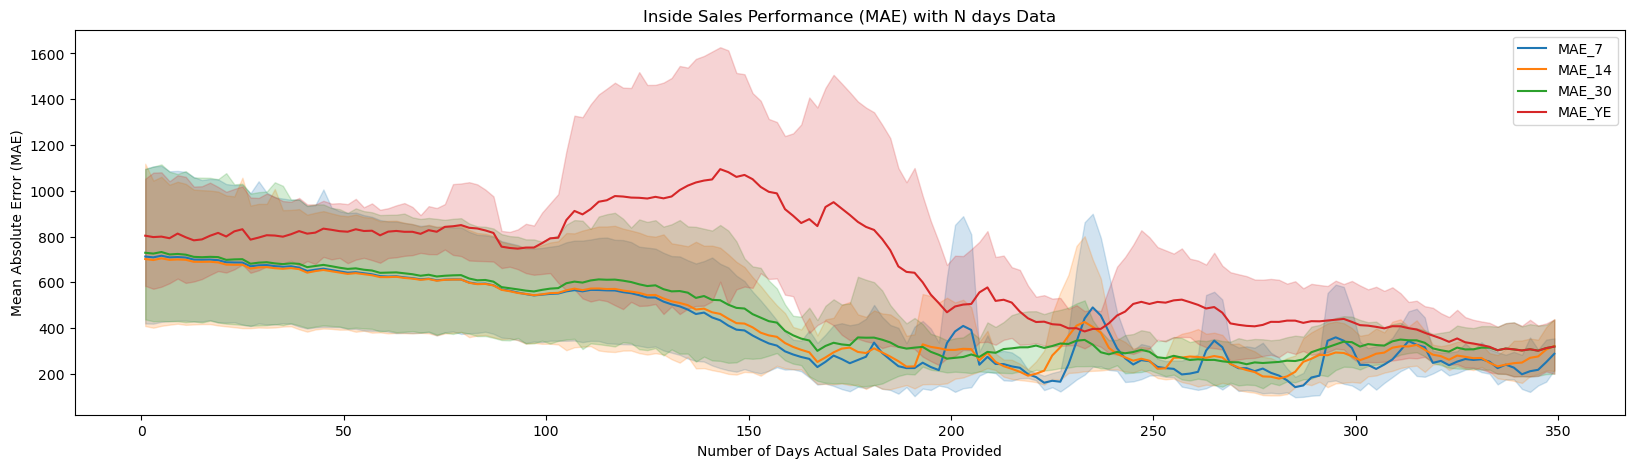

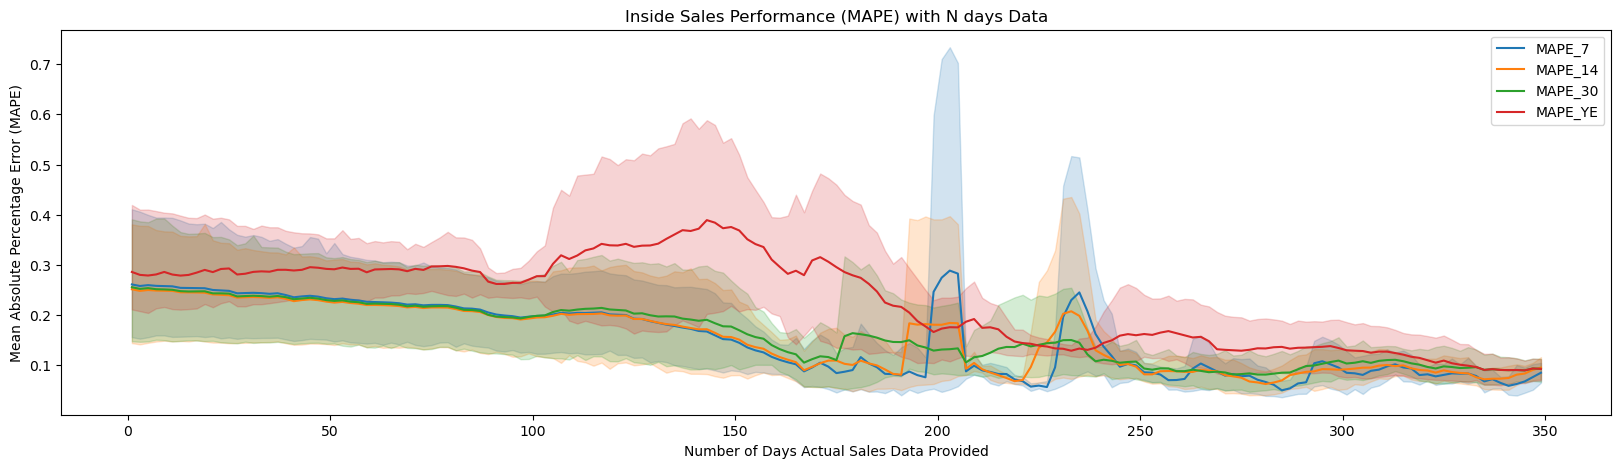

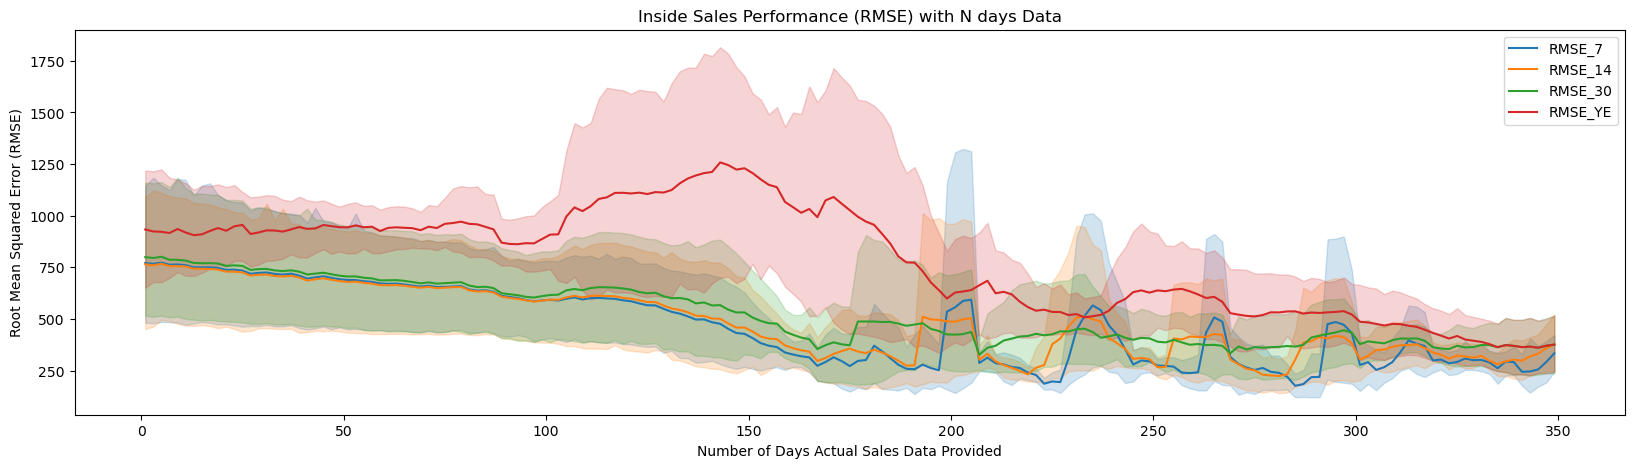

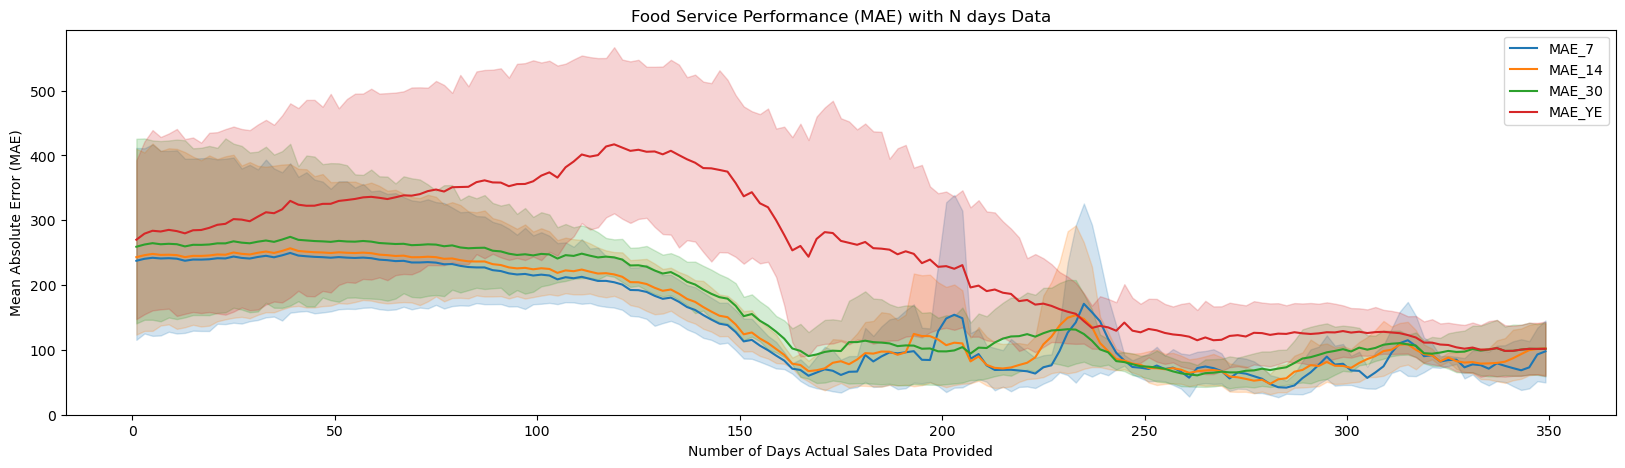

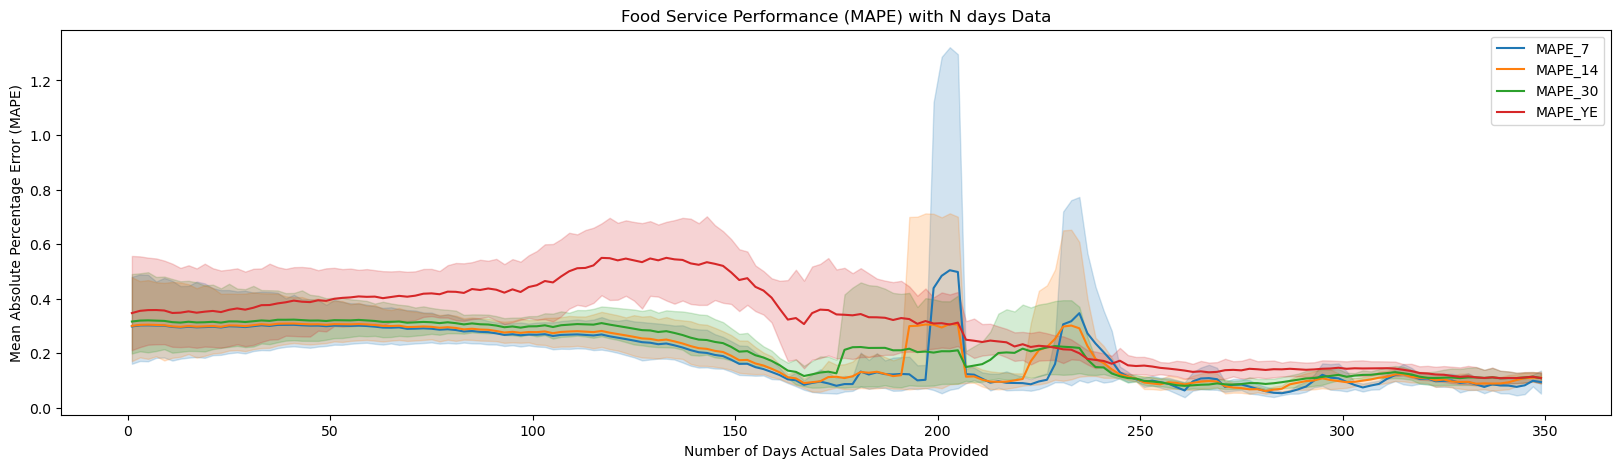

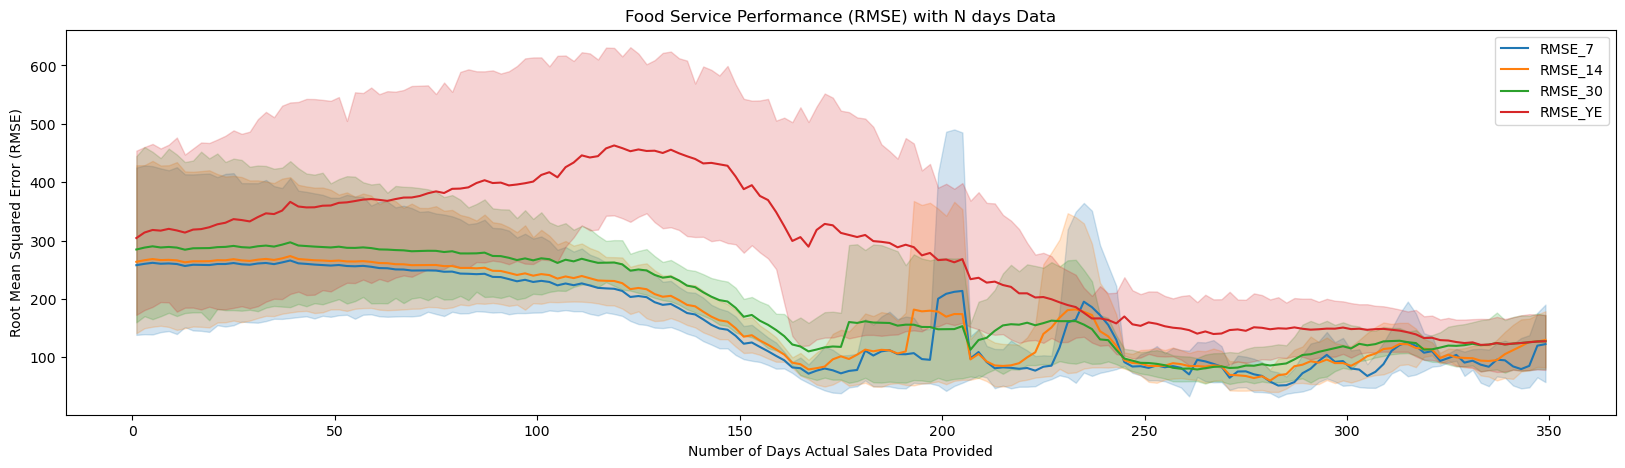

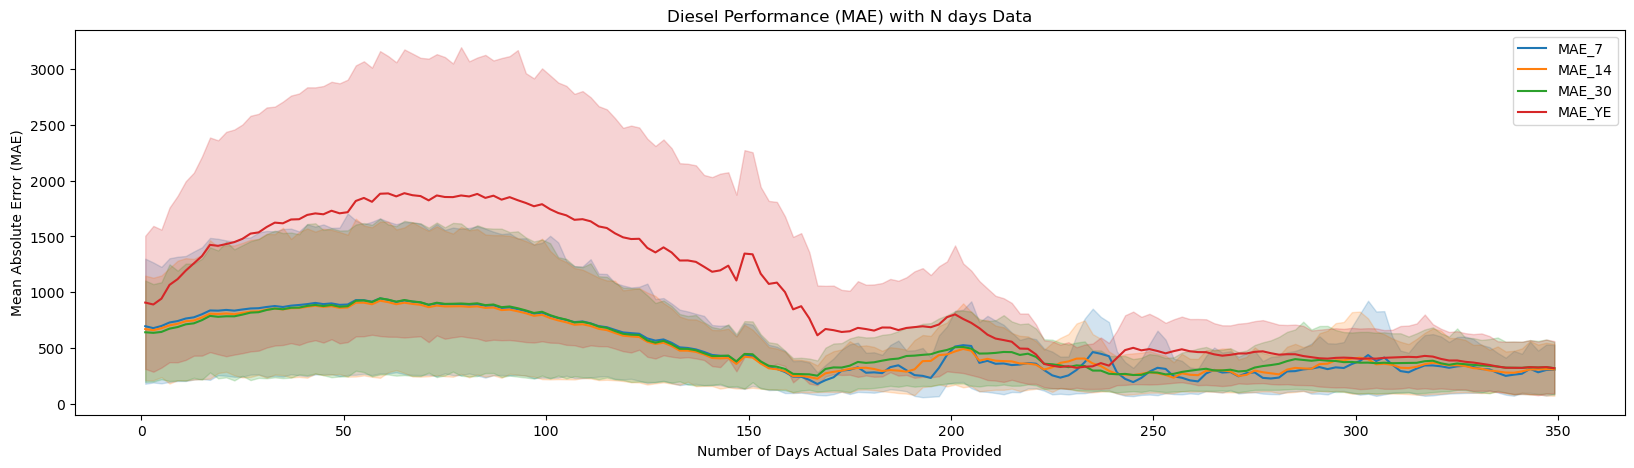

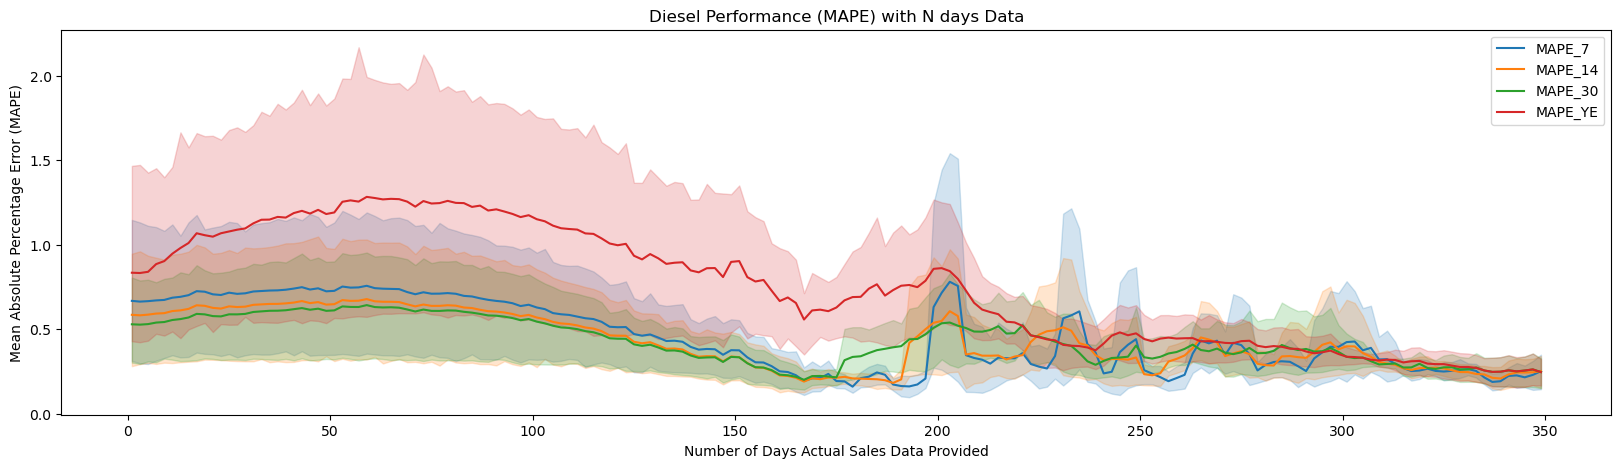

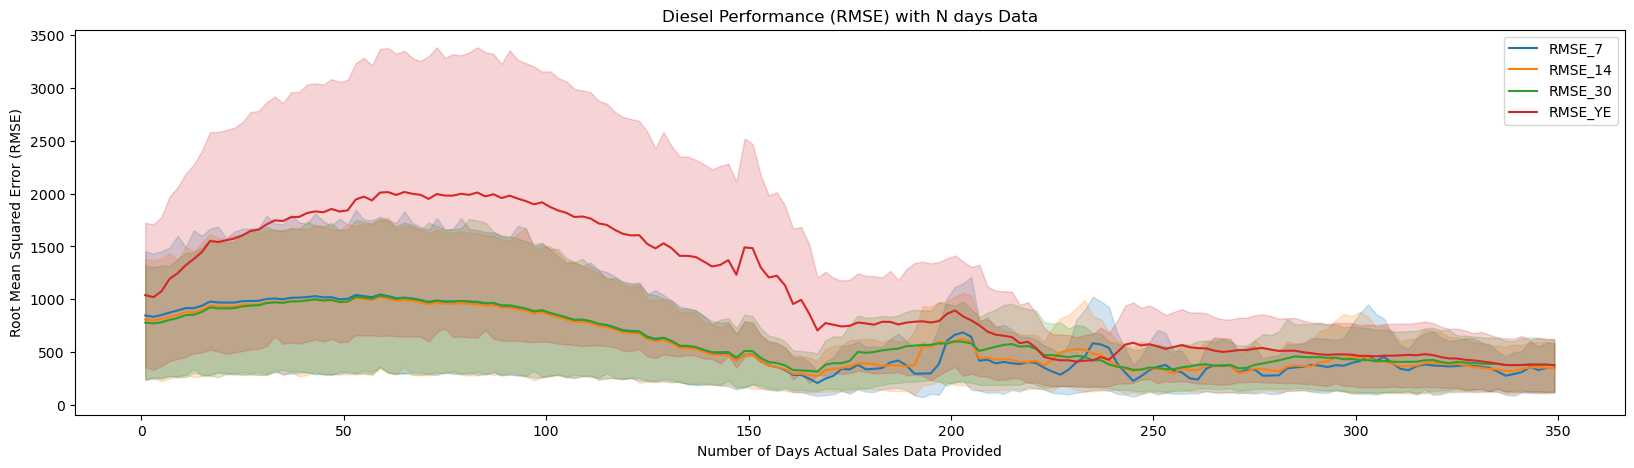

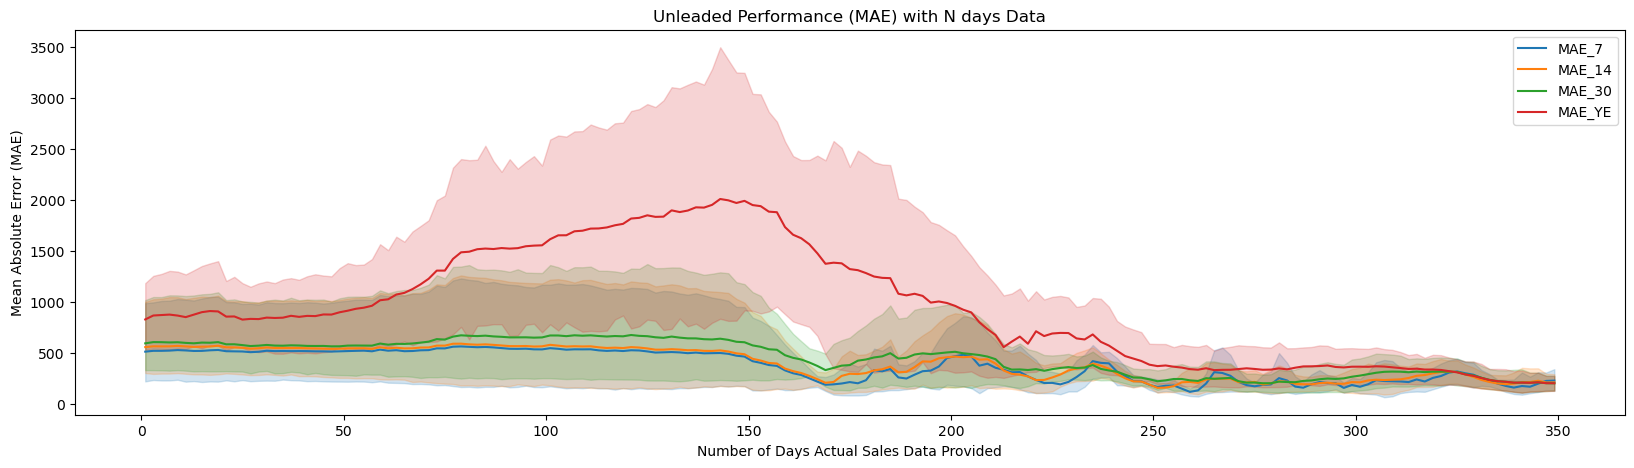

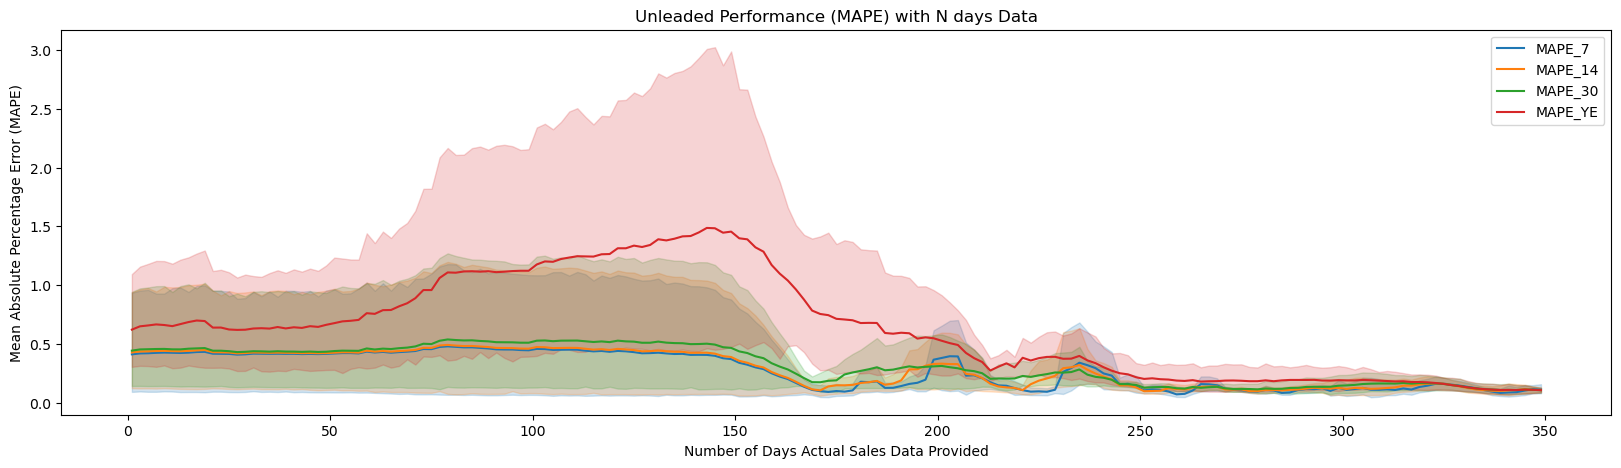

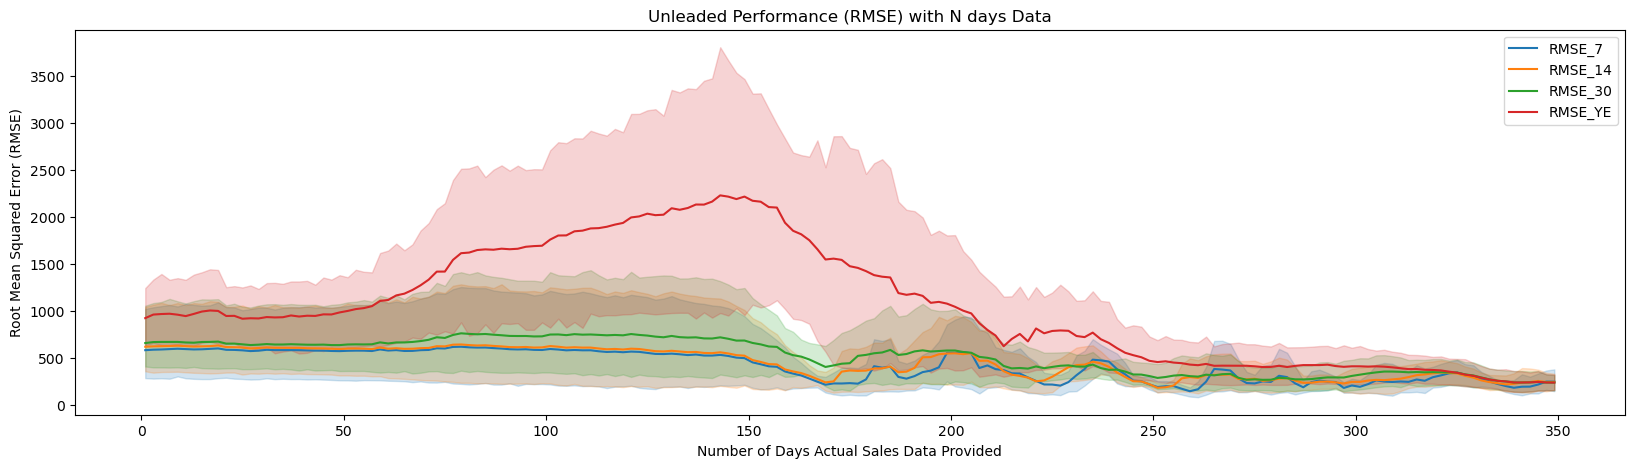

In [366]:
results = {'Inside Sales':is_results, 'Food Service':fs_results, 'Diesel':d_results, 'Unleaded':u_results}
img_num = 1
for key, res in results.items():
#     img_path = 'img_'+str(img_num)+'.jpg'
    plt.subplots(figsize=(20, 5))
    ax = sns.lineplot(data=res, 
                 x= 'num_days_actual', 
                 y= 'MAE_7',
                 label= 'MAE_7')
    ax = sns.lineplot(data=res, 
                 x= 'num_days_actual', 
                 y= 'MAE_14',
                 label= 'MAE_14')
    ax = sns.lineplot(data=res, 
                 x= 'num_days_actual', 
                 y= 'MAE_30',
                 label= 'MAE_30')
    ax = sns.lineplot(data=res, 
         x= 'num_days_actual', 
         y= 'MAE_YE',
         label= 'MAE_YE')
    ax.set(xlabel='Number of Days Actual Sales Data Provided',
    ylabel='Mean Absolute Error (MAE)',
    title= key + ' Performance (MAE) with N days Data')
#     plt.savefig('./images/'+img_path)
#     img_num += 1
#     img_path = 'img_'+img_num+'.jpg'
    plt.show()

    plt.subplots(figsize=(20, 5))
    ax = sns.lineplot(data=res, 
                 x= 'num_days_actual', 
                 y= 'MAPE_7',
                 label= 'MAPE_7')
    ax = sns.lineplot(data=res, 
                 x= 'num_days_actual', 
                 y= 'MAPE_14',
                 label= 'MAPE_14')
    ax = sns.lineplot(data=res, 
                 x= 'num_days_actual', 
                 y= 'MAPE_30',
                 label= 'MAPE_30')
    ax = sns.lineplot(data=res, 
                 x= 'num_days_actual', 
                 y= 'MAPE_YE',
                 label= 'MAPE_YE')
    ax.set(xlabel='Number of Days Actual Sales Data Provided',
           ylabel='Mean Absolute Percentage Error (MAPE)',
           title= key + ' Performance (MAPE) with N days Data')
#     plt.savefig('./images/'+img_path)
#     img_num += 1
#     img_path = 'img_'+str(img_num)+'.jpg'
    plt.show()

    plt.subplots(figsize=(20, 5))
    ax = sns.lineplot(data=res, 
                 x= 'num_days_actual', 
                 y= 'RMSE_7',
                 label= 'RMSE_7')
    ax = sns.lineplot(data=res, 
                 x= 'num_days_actual', 
                 y= 'RMSE_14',
                 label= 'RMSE_14')
    ax = sns.lineplot(data=res, 
                 x= 'num_days_actual', 
                 y= 'RMSE_30',
                 label= 'RMSE_30')
    ax = sns.lineplot(data=res, 
                 x= 'num_days_actual', 
                 y= 'RMSE_YE',
                 label= 'RMSE_YE')
    ax.set(xlabel='Number of Days Actual Sales Data Provided',
    ylabel='Root Mean Squared Error (RMSE)',
    title= key + ' Performance (RMSE) with N days Data')
#     plt.savefig('./images/'+img_path)
#     img_num += 1
#     img_path = 'img_'+str(img_num)+'.jpg'
    plt.show()

In [393]:
preds_22925

site_id_msba calendar.calendar_day_date  inside_sales  food_service  \
6222         22925                 2021-06-26     2308.2325      550.5430   
6223         22925                 2021-07-01     2754.6120      755.2055   
6224         22925                 2021-07-02     3181.4125      807.4360   
6225         22925                 2021-07-03     2970.2505      706.6045   
6226         22925                 2021-07-04     2431.3310      509.4565   
...            ...                        ...           ...           ...   
6583         22925                 2022-06-07     3353.4095      727.0305   
6584         22925                 2022-06-12     3218.0295      571.2980   
6585         22925                 2022-06-13     2653.3815      422.6565   
6586         22925                 2022-06-15     3281.0015      723.9750   
6587         22925                 2022-06-19     2807.7070      503.2405   

      diesel_x   unleaded  inside_sales_pred  food_service_pred  diesel_pred  \
6222  186.6900  1783.3270        1706.447876         331.647888    17.139141   
6223  212.5515  1602.7375        2276.914551         456.958038   206.706726   
6224  166.8905  1867.0925        2561.719971         441.510376    85.571373   
6225  101.6960  1572.9665        1706.447876         331.647888    17.139141   
6226   64.1760  1246.2275        1581.648560         204.842346    24.413803   
...        ...        ...                ...                ...          ...   
6583  209.8250  1404.8160        2015.515747         458.819366   175.329803   
6584  172.7005  1525.9090        1538.348145         237.378540    69.690193   
6585  227.0800  1321.8800        2005.193359         432.480713   282.439850   
6586  215.5650  1738.7825        2028.402832         470.025726   140.887024   
6587  161.4795  1135.3055        1524.692505         229.678177    78.239548   

      unleaded_pred  inside_sales_error  food_service_error  diesel_error  \
6222    2524.693115         -601.784624         -218.895112   -169.550859   
6223    1996.314209         -477.697449         -298.247462     -5.844774   
6224    2863.911621         -619.692529         -365.925624    -81.319127   
6225    2524.693115        -1263.802624         -374.956612    -84.556859   
6226    1504.987793         -849.682440         -304.614154    -39.762197   
...             ...                 ...                 ...           ...   
6583    2443.644775        -1337.893753         -268.211134    -34.495197   
6584    1986.087280        -1679.681355         -333.919460   -103.010307   
6585    2668.435303         -648.188141            9.824213     55.359850   
6586    2609.823242        -1252.598668         -253.949274    -74.677976   
6587    1855.388916        -1283.014495         -273.562323    -83.239952   

      unleaded_error  
6222      741.366115  
6223      393.576709  
6224      996.819121  
6225      951.726615  
6226      258.760293  
...              ...  
6583     1038.828775  
6584      460.178280  
6585     1346.555303  
6586      871.040742  
6587      720.083416  

[366 rows x 14 columns]

In [405]:
XGB_MSE_is = mean_squared_error(preds_22925['inside_sales'], preds_22925['inside_sales_pred'])
XGB_MSE_fs = mean_squared_error(preds_22925['food_service'], preds_22925['food_service_pred'])
XGB_MSE_d = mean_squared_error(preds_22925['diesel_x'], preds_22925['diesel_pred'])
XGB_MSE_u = mean_squared_error(preds_22925['unleaded'], preds_22925['unleaded_pred'])

In [406]:
# Zero Day MSE 22925
print(XGB_MSE_is)
print(XGB_MSE_fs)
print(XGB_MSE_d)
print(XGB_MSE_u)

796542.3169915373
43252.598222787914
15065.444280390993
612429.9678702587


In [383]:
inside, fs, d, u, is_preds, fs_preds, d_preds, u_preds = forecastOnPreds2(preds_22925, 14)

In [446]:
inside

{'num_days_actual': 14,
 'tot_num_days_data': 170,
 'RMSE_7': 702.1421907000416,
 'MAE_7': 633.2026248126222,
 'MAPE_7': 0.22338434302222931,
 'RMSE_14': 753.710287219335,
 'MAE_14': 708.6909698727422,
 'MAPE_14': 0.24607856415928536,
 'RMSE_30': 734.5260423293023,
 'MAE_30': 673.7969959471826,
 'MAPE_30': 0.233825541772346,
 'RMSE_YE': 780.8124566203147,
 'MAE_YE': 711.9747661423953,
 'MAPE_YE': 0.23604643417705656}

In [392]:
is_preds[['ds', 'yhat']].sort_values('ds')

ds         yhat
0   2021-12-09  2217.765727
1   2021-12-10  2090.442396
2   2021-12-11  2070.687477
3   2021-12-12  2062.986785
4   2021-12-13  2010.407761
..         ...          ...
190 2022-06-17  2274.077762
191 2022-06-18  2254.322844
192 2022-06-19  2246.622151
193 2022-06-20  2194.043128
194 2022-06-21  2240.292746

[195 rows x 2 columns]

In [389]:
is_ts = preds_22925[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
is_ts['ds'] = pd.to_datetime(is_ts['ds']) # Convert ds to datetime format
y = pd.concat([is_ts.y[:14], # Days of actual data
               is_ts.y[14:]], # Validation Data
               axis=0).reset_index(drop=True)
ds = preds_22925['calendar.calendar_day_date'].sort_values().reset_index(drop=True)
seed_is = pd.concat([ds,y], axis=1).rename(columns={'calendar.calendar_day_date':'ds', 0:'y'})

In [390]:
seed_is

ds          y
0    2021-06-22  1442.9975
1    2021-06-23  1772.3475
2    2021-06-24  1827.1750
3    2021-06-25  2240.4130
4    2021-06-26  2308.2325
..          ...        ...
361  2022-06-18  3479.9030
362  2022-06-19  2807.7070
363  2022-06-20  3164.6405
364  2022-06-21  3313.1175
365  2022-06-22  3250.2785

[366 rows x 2 columns]

In [450]:
preds_22925

site_id_msba calendar.calendar_day_date  inside_sales  food_service  \
6222         22925                 2021-06-26     2308.2325      550.5430   
6223         22925                 2021-07-01     2754.6120      755.2055   
6224         22925                 2021-07-02     3181.4125      807.4360   
6225         22925                 2021-07-03     2970.2505      706.6045   
6226         22925                 2021-07-04     2431.3310      509.4565   
...            ...                        ...           ...           ...   
6583         22925                 2022-06-07     3353.4095      727.0305   
6584         22925                 2022-06-12     3218.0295      571.2980   
6585         22925                 2022-06-13     2653.3815      422.6565   
6586         22925                 2022-06-15     3281.0015      723.9750   
6587         22925                 2022-06-19     2807.7070      503.2405   

      diesel_x   unleaded  inside_sales_pred  food_service_pred  diesel_pred  \
6222  186.6900  1783.3270        1706.447876         331.647888    17.139141   
6223  212.5515  1602.7375        2276.914551         456.958038   206.706726   
6224  166.8905  1867.0925        2561.719971         441.510376    85.571373   
6225  101.6960  1572.9665        1706.447876         331.647888    17.139141   
6226   64.1760  1246.2275        1581.648560         204.842346    24.413803   
...        ...        ...                ...                ...          ...   
6583  209.8250  1404.8160        2015.515747         458.819366   175.329803   
6584  172.7005  1525.9090        1538.348145         237.378540    69.690193   
6585  227.0800  1321.8800        2005.193359         432.480713   282.439850   
6586  215.5650  1738.7825        2028.402832         470.025726   140.887024   
6587  161.4795  1135.3055        1524.692505         229.678177    78.239548   

      unleaded_pred  inside_sales_error  food_service_error  diesel_error  \
6222    2524.693115         -601.784624         -218.895112   -169.550859   
6223    1996.314209         -477.697449         -298.247462     -5.844774   
6224    2863.911621         -619.692529         -365.925624    -81.319127   
6225    2524.693115        -1263.802624         -374.956612    -84.556859   
6226    1504.987793         -849.682440         -304.614154    -39.762197   
...             ...                 ...                 ...           ...   
6583    2443.644775        -1337.893753         -268.211134    -34.495197   
6584    1986.087280        -1679.681355         -333.919460   -103.010307   
6585    2668.435303         -648.188141            9.824213     55.359850   
6586    2609.823242        -1252.598668         -253.949274    -74.677976   
6587    1855.388916        -1283.014495         -273.562323    -83.239952   

      unleaded_error  
6222      741.366115  
6223      393.576709  
6224      996.819121  
6225      951.726615  
6226      258.760293  
...              ...  
6583     1038.828775  
6584      460.178280  
6585     1346.555303  
6586      871.040742  
6587      720.083416  

[366 rows x 14 columns]

In [564]:
actual = preds_22925[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
actual = actual[:14]
actual

ds          y
6403  2021-06-22  1442.9975
6324  2021-06-23  1772.3475
6490  2021-06-24  1827.1750
6491  2021-06-25  2240.4130
6222  2021-06-26  2308.2325
6404  2021-06-27  1897.3710
6405  2021-06-28  2120.2580
6325  2021-06-29  2496.0775
6326  2021-06-30  2627.8560
6223  2021-07-01  2754.6120
6224  2021-07-02  3181.4125
6225  2021-07-03  2970.2505
6226  2021-07-04  2431.3310
6327  2021-07-05  2041.1440

In [565]:
pred_170 = preds_22925[['calendar.calendar_day_date', 'inside_sales_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales_pred':'y'})
pred_170 = pred_170[14:170]
pred_170

ds            y
6227  2021-07-06  2015.515747
6328  2021-07-07  2028.402832
6406  2021-07-08  2276.914551
6329  2021-07-09  2561.719971
6492  2021-07-10  1706.447876
...          ...          ...
6263  2021-12-04  1706.447876
6264  2021-12-05  1538.348145
6364  2021-12-06  2005.193359
6534  2021-12-07  2015.515747
6443  2021-12-08  2028.402832

[156 rows x 2 columns]

In [566]:
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
seed

ds            y
0    2021-06-22  1442.997500
1    2021-06-23  1772.347500
2    2021-06-24  1827.175000
3    2021-06-25  2240.413000
4    2021-06-26  2308.232500
..          ...          ...
165  2021-12-04  1706.447876
166  2021-12-05  1538.348145
167  2021-12-06  2005.193359
168  2021-12-07  2015.515747
169  2021-12-08  2028.402832

[170 rows x 2 columns]

In [567]:
val = preds_22925[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
val = val[170:]
val

ds          y
6265  2021-12-09  2844.0790
6266  2021-12-10  3370.9620
6535  2021-12-11  2821.2450
6267  2021-12-12  2630.4565
6365  2021-12-13  2500.6730
...          ...        ...
6401  2022-06-18  3479.9030
6587  2022-06-19  2807.7070
6489  2022-06-20  3164.6405
6402  2022-06-21  3313.1175
6323  2022-06-22  3250.2785

[196 rows x 2 columns]

In [568]:
model = Prophet()
model.fit(seed)
preds = model.predict(val)

In [569]:
preds


ds        trend   yhat_lower   yhat_upper  trend_lower  \
0   2021-12-09  2001.675437  2007.106998  2438.131053  2001.675437   
1   2021-12-10  2001.512724  2329.207017  2748.409299  2001.487272   
2   2021-12-11  2001.350011  1542.343244  1961.843858  2001.258334   
3   2021-12-12  2001.187299  1347.121593  1764.554422  2001.014484   
4   2021-12-13  2001.024586  1751.922514  2171.847433  2000.756848   
..         ...          ...          ...          ...          ...   
191 2022-06-18  1970.597334  1491.094330  1952.900015  1879.069586   
192 2022-06-19  1970.434621  1307.947286  1752.044792  1878.378891   
193 2022-06-20  1970.271908  1725.580236  2165.607452  1877.531667   
194 2022-06-21  1970.109196  1705.983466  2177.389881  1876.519935   
195 2022-06-22  1969.946483  1759.809926  2198.519516  1875.745357   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    2001.675437      224.486447            224.486447            224.486447   
1    2001.537976      536.460231            536.460231            536.460231   
2    2001.422573     -252.686284           -252.686284           -252.686284   
3    2001.333594     -447.325251           -447.325251           -447.325251   
4    2001.289707      -38.573870            -38.573870            -38.573870   
..           ...             ...                   ...                   ...   
191  2071.093822     -252.686284           -252.686284           -252.686284   
192  2071.801045     -447.325251           -447.325251           -447.325251   
193  2072.438503      -38.573870            -38.573870            -38.573870   
194  2073.197827      -26.726960            -26.726960            -26.726960   
195  2073.789359        4.365687              4.365687              4.365687   

         weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0    224.486447    224.486447    224.486447                   0.0   
1    536.460231    536.460231    536.460231                   0.0   
2   -252.686284   -252.686284   -252.686284                   0.0   
3   -447.325251   -447.325251   -447.325251                   0.0   
4    -38.573870    -38.573870    -38.573870                   0.0   
..          ...           ...           ...                   ...   
191 -252.686284   -252.686284   -252.686284                   0.0   
192 -447.325251   -447.325251   -447.325251                   0.0   
193  -38.573870    -38.573870    -38.573870                   0.0   
194  -26.726960    -26.726960    -26.726960                   0.0   
195    4.365687      4.365687      4.365687                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                           0.0                         0.0  2226.161884  
1                           0.0                         0.0  2537.972955  
2                           0.0                         0.0  1748.663728  
3                           0.0                         0.0  1553.862048  
4                           0.0                         0.0  1962.450716  
..                          ...                         ...          ...  
191                         0.0                         0.0  1717.911050  
192                         0.0                         0.0  1523.109370  
193                         0.0                         0.0  1931.698038  
194                         0.0                         0.0  1943.382235  
195                         0.0                         0.0  1974.312170  

[196 rows x 16 columns]

In [570]:
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})

In [571]:
p

ds            y
0   2021-12-09  2226.161884
1   2021-12-10  2537.972955
2   2021-12-11  1748.663728
3   2021-12-12  1553.862048
4   2021-12-13  1962.450716
..         ...          ...
191 2022-06-18  1717.911050
192 2022-06-19  1523.109370
193 2022-06-20  1931.698038
194 2022-06-21  1943.382235
195 2022-06-22  1974.312170

[196 rows x 2 columns]

In [572]:
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
year_pred

ds            y
0             2021-06-22  1442.997500
1             2021-06-23  1772.347500
2             2021-06-24  1827.175000
3             2021-06-25  2240.413000
4             2021-06-26  2308.232500
..                   ...          ...
361  2022-06-18 00:00:00  1717.911050
362  2022-06-19 00:00:00  1523.109370
363  2022-06-20 00:00:00  1931.698038
364  2022-06-21 00:00:00  1943.382235
365  2022-06-22 00:00:00  1974.312170

[366 rows x 2 columns]

In [573]:
y_true = preds_22925[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
y_true

ds          y
6403  2021-06-22  1442.9975
6324  2021-06-23  1772.3475
6490  2021-06-24  1827.1750
6491  2021-06-25  2240.4130
6222  2021-06-26  2308.2325
...          ...        ...
6401  2022-06-18  3479.9030
6587  2022-06-19  2807.7070
6489  2022-06-20  3164.6405
6402  2022-06-21  3313.1175
6323  2022-06-22  3250.2785

[366 rows x 2 columns]

In [574]:
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 806101.572267989
RMSE 897.8315946033471


In [575]:
actual = preds_22925[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
actual = actual[:21]
pred_170 = preds_22925[['calendar.calendar_day_date', 'inside_sales_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales_pred':'y'})
pred_170 = pred_170[21:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_22925[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_22925[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 811341.3328316568
RMSE 900.7448766613423


In [576]:
actual = preds_22925[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
actual = actual[:14]
pred_170 = preds_22925[['calendar.calendar_day_date', 'food_service_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service_pred':'y'})
pred_170 = pred_170[14:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_22925[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_22925[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 43458.87676675876
RMSE 208.46792742951794


In [577]:
actual = preds_22925[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
actual = actual[:21]
pred_170 = preds_22925[['calendar.calendar_day_date', 'food_service_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service_pred':'y'})
pred_170 = pred_170[21:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_22925[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_22925[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 41907.47667762838
RMSE 204.71315707015117


In [578]:
actual = preds_22925[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
actual = actual[:14]
pred_170 = preds_22925[['calendar.calendar_day_date', 'diesel_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_pred':'y'})
pred_170 = pred_170[14:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_22925[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_22925[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 12795.153626832282
RMSE 113.11566481629448


In [579]:
actual = preds_22925[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
actual = actual[:21]
pred_170 = preds_22925[['calendar.calendar_day_date', 'diesel_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_pred':'y'})
pred_170 = pred_170[21:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_22925[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_22925[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 12181.691754177753
RMSE 110.37070152072856


In [580]:
actual = preds_22925[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
actual = actual[:14]
pred_170 = preds_22925[['calendar.calendar_day_date', 'unleaded_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded_pred':'y'})
pred_170 = pred_170[14:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_22925[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_22925[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 543249.1245754656
RMSE 737.0543565948617


In [581]:
actual = preds_22925[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
actual = actual[:21]
pred_170 = preds_22925[['calendar.calendar_day_date', 'unleaded_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded_pred':'y'})
pred_170 = pred_170[21:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_22925[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_22925[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 518397.8784888628
RMSE 719.9985267268696


In [582]:
actual = preds_22680[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
actual = actual[:14]
pred_170 = preds_22680[['calendar.calendar_day_date', 'inside_sales_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales_pred':'y'})
pred_170 = pred_170[14:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_22680[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_22680[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 453141.6324508037
RMSE 673.1579550527526


In [583]:
actual = preds_22680[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
actual = actual[:21]
pred_170 = preds_22680[['calendar.calendar_day_date', 'inside_sales_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales_pred':'y'})
pred_170 = pred_170[21:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_22680[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_22680[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 444996.2511088125
RMSE 667.080393287655


In [584]:
actual = preds_22680[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
actual = actual[:14]
pred_170 = preds_22680[['calendar.calendar_day_date', 'food_service_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service_pred':'y'})
pred_170 = pred_170[14:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_22680[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_22680[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 22049.60466048525
RMSE 148.4910928658189


In [585]:
actual = preds_22680[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
actual = actual[:21]
pred_170 = preds_22680[['calendar.calendar_day_date', 'food_service_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service_pred':'y'})
pred_170 = pred_170[21:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_22680[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_22680[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 21555.51110442307
RMSE 146.81795225524388


In [586]:
actual = preds_22680[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
actual = actual[:14]
pred_170 = preds_22680[['calendar.calendar_day_date', 'diesel_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_pred':'y'})
pred_170 = pred_170[14:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_22680[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_22680[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 5522.03042144328
RMSE 74.31036550470789


In [587]:
actual = preds_22680[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
actual = actual[:21]
pred_170 = preds_22680[['calendar.calendar_day_date', 'diesel_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_pred':'y'})
pred_170 = pred_170[21:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_22680[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_22680[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 5316.141891251785
RMSE 72.911877573217


In [588]:
actual = preds_22680[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
actual = actual[:14]
pred_170 = preds_22680[['calendar.calendar_day_date', 'unleaded_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded_pred':'y'})
pred_170 = pred_170[14:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_22680[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_22680[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 1948789.2351999748
RMSE 1395.9904137206584


In [589]:
actual = preds_22680[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
actual = actual[:21]
pred_170 = preds_22680[['calendar.calendar_day_date', 'unleaded_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded_pred':'y'})
pred_170 = pred_170[21:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_22680[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_22680[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 1913979.7631067275
RMSE 1383.4665746257579


In [590]:
actual = preds_23415[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
actual = actual[:14]
pred_170 = preds_23415[['calendar.calendar_day_date', 'inside_sales_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales_pred':'y'})
pred_170 = pred_170[14:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_23415[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_23415[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 963627.786573276
RMSE 981.6454485063718


In [591]:
actual = preds_23415[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
actual = actual[:21]
pred_170 = preds_23415[['calendar.calendar_day_date', 'inside_sales_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales_pred':'y'})
pred_170 = pred_170[21:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_23415[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_23415[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 928665.972002759
RMSE 963.673166588527


In [592]:
actual = preds_23415[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
actual = actual[:14]
pred_170 = preds_23415[['calendar.calendar_day_date', 'food_service_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service_pred':'y'})
pred_170 = pred_170[14:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_23415[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_23415[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 145386.5266390001
RMSE 381.29585185128894


In [593]:
actual = preds_23415[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
actual = actual[:21]
pred_170 = preds_23415[['calendar.calendar_day_date', 'food_service_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service_pred':'y'})
pred_170 = pred_170[21:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_23415[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_23415[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 144049.17227097662
RMSE 379.5381038459467


In [594]:
actual = preds_23415[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
actual = actual[:14]
pred_170 = preds_23415[['calendar.calendar_day_date', 'diesel_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_pred':'y'})
pred_170 = pred_170[14:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_23415[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_23415[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 1555935.261776265
RMSE 1247.3713407707687


In [595]:
actual = preds_23415[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
actual = actual[:21]
pred_170 = preds_23415[['calendar.calendar_day_date', 'diesel_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_pred':'y'})
pred_170 = pred_170[21:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_23415[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_23415[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 1523123.7011677918
RMSE 1234.14897851426


In [596]:
actual = preds_23415[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
actual = actual[:14]
pred_170 = preds_23415[['calendar.calendar_day_date', 'unleaded_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded_pred':'y'})
pred_170 = pred_170[14:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_23415[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_23415[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 165576.43197301388
RMSE 406.9108403237912


In [597]:
actual = preds_23415[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
actual = actual[:21]
pred_170 = preds_23415[['calendar.calendar_day_date', 'unleaded_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded_pred':'y'})
pred_170 = pred_170[21:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_23415[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_23415[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 150815.71697824623
RMSE 388.34999289075085


In [598]:
actual = preds_22785[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
actual = actual[:14]
pred_170 = preds_22785[['calendar.calendar_day_date', 'inside_sales_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales_pred':'y'})
pred_170 = pred_170[14:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_22785[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_22785[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 256239.2785001448
RMSE 506.2008282294141


In [599]:
actual = preds_22785[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
actual = actual[:21]
pred_170 = preds_22785[['calendar.calendar_day_date', 'inside_sales_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales_pred':'y'})
pred_170 = pred_170[21:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_22785[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_22785[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 241722.61325274358
RMSE 491.6529398394192


In [600]:
actual = preds_22785[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
actual = actual[:14]
pred_170 = preds_22785[['calendar.calendar_day_date', 'food_service_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service_pred':'y'})
pred_170 = pred_170[14:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_22785[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_22785[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 41992.73016004697
RMSE 204.92127795826127


In [601]:
actual = preds_22785[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
actual = actual[:21]
pred_170 = preds_22785[['calendar.calendar_day_date', 'food_service_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service_pred':'y'})
pred_170 = pred_170[21:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_22785[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_22785[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 40325.74535115627
RMSE 200.81271212539377


In [602]:
actual = preds_22785[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
actual = actual[:14]
pred_170 = preds_22785[['calendar.calendar_day_date', 'diesel_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_pred':'y'})
pred_170 = pred_170[14:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_22785[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_22785[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 2257433.4021006273
RMSE 1502.475757575019


In [603]:
actual = preds_22785[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
actual = actual[:21]
pred_170 = preds_22785[['calendar.calendar_day_date', 'diesel_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_pred':'y'})
pred_170 = pred_170[21:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_22785[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_22785[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 2001002.3269617944
RMSE 1414.5678940799535


In [604]:
actual = preds_22785[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
actual = actual[:14]
pred_170 = preds_22785[['calendar.calendar_day_date', 'unleaded_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded_pred':'y'})
pred_170 = pred_170[14:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_22785[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_22785[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 288894.76761941507
RMSE 537.4893186096027


In [605]:
actual = preds_22785[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
actual = actual[:21]
pred_170 = preds_22785[['calendar.calendar_day_date', 'unleaded_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded_pred':'y'})
pred_170 = pred_170[21:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_22785[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_22785[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 262975.9236485092
RMSE 512.8117818932295


In [606]:
actual = preds_23380[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
actual = actual[:14]
pred_170 = preds_23380[['calendar.calendar_day_date', 'inside_sales_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales_pred':'y'})
pred_170 = pred_170[14:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_23380[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_23380[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 825908.3565685464
RMSE 908.7950024997642


In [607]:
actual = preds_23380[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
actual = actual[:21]
pred_170 = preds_23380[['calendar.calendar_day_date', 'inside_sales_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales_pred':'y'})
pred_170 = pred_170[21:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_23380[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_23380[['calendar.calendar_day_date', 'inside_sales']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'inside_sales':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 804659.0784910902
RMSE 897.027913997714


In [608]:
actual = preds_23380[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
actual = actual[:14]
pred_170 = preds_23380[['calendar.calendar_day_date', 'food_service_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service_pred':'y'})
pred_170 = pred_170[14:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_23380[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_23380[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 148769.38184914645
RMSE 385.70634146867025


In [609]:
actual = preds_23380[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
actual = actual[:21]
pred_170 = preds_23380[['calendar.calendar_day_date', 'food_service_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service_pred':'y'})
pred_170 = pred_170[21:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_23380[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_23380[['calendar.calendar_day_date', 'food_service']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'food_service':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 150094.04931070196
RMSE 387.4197327327326


In [610]:
actual = preds_23380[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
actual = actual[:14]
pred_170 = preds_23380[['calendar.calendar_day_date', 'diesel_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_pred':'y'})
pred_170 = pred_170[14:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_23380[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_23380[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 4169940.655360605
RMSE 2042.0432550170442


In [611]:
actual = preds_23380[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
actual = actual[:21]
pred_170 = preds_23380[['calendar.calendar_day_date', 'diesel_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_pred':'y'})
pred_170 = pred_170[21:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_23380[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_23380[['calendar.calendar_day_date', 'diesel_x']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'diesel_x':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 3709913.0011297795
RMSE 1926.1134445119735


In [612]:
actual = preds_23380[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
actual = actual[:14]
pred_170 = preds_23380[['calendar.calendar_day_date', 'unleaded_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded_pred':'y'})
pred_170 = pred_170[14:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_23380[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_23380[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 1212776.4299956043
RMSE 1101.261290519014


In [613]:
actual = preds_23380[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
actual = actual[:21]
pred_170 = preds_23380[['calendar.calendar_day_date', 'unleaded_pred']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded_pred':'y'})
pred_170 = pred_170[21:170]
seed = pd.concat([actual, pred_170], axis=0).reset_index(drop=True)
val = preds_23380[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
val = val[170:]
model = Prophet()
model.fit(seed)
preds = model.predict(val)
p = preds[['ds','yhat']].rename(columns={'yhat':'y'})
year_pred = pd.concat([seed,p], axis=0).reset_index(drop=True)
y_true = preds_23380[['calendar.calendar_day_date', 'unleaded']].sort_values('calendar.calendar_day_date').rename(columns={'calendar.calendar_day_date':'ds', 'unleaded':'y'})
print('MSE',mean_squared_error(y_true['y'], year_pred['y'], squared=True))
print('RMSE',mean_squared_error(y_true['y'], year_pred['y'], squared=False))

MSE 1276060.989137576
RMSE 1129.628695252372
